Описание исследования.

В рамках исследования я спарсил данные топ чемпионатов за один год. Я обработал данные и построил 
следующие графики:
* голы в первом тайме

* голы во втором тайме

* голы за матч

* угловые

* желтые карточки

* фолы

* удары в створ

* офсайд

* ауты

* удары от ворот


В конце исследования я изложил выводы и рекомендации.

In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Общая информация о датасете

In [2]:
data = pd.read_excel('Fonbet_result.xlsx')
display(data.shape)
data.head(2)

(9856, 28)

ДТ              ЛИГА          КО_1          КО_2  ГО_1  \
0 2022-09-14 02:30:00  Футбол. США. MLS   ФК Монреаль   Чикаго Файр     3   
1 2022-09-14 03:00:00  Футбол. США. MLS  Интер Майами  Коламбус Кру     2   

   ГО_2  ГО_11  ГО_21  ГО_12  ГО_22  ...  ФО_1  ФО_2  УС_1  УС_2  ОФ_1  ОФ_2  \
0     2    3.0    1.0    0.0    1.0  ...   NaN   NaN   NaN   NaN   NaN   NaN   
1     1    1.0    1.0    1.0    0.0  ...   NaN   NaN   NaN   NaN   NaN   NaN   

   АУ_1  АУ_2  УО_1  УО_2  
0   NaN   NaN   NaN   NaN  
1   NaN   NaN   NaN   NaN  

[2 rows x 28 columns]

In [3]:
# посмотрим какие чемпионаты в наличии и если неправильные названия чемпионатов
data['ЛИГА'].value_counts()

Футбол. Аргентина. Примера В Насьональ     640
Футбол. Англия. 2-я лига                   574
Футбол. Англия. 1-я лига                   555
Футбол. Англия. Чемпион-Лига               518
Футбол. США. MLS                           457
Футбол. Испания. Примера дивизион          380
Футбол. Италия. Серия А                    374
Футбол. Англия. Премьер-Лига               373
Футбол. Франция. Лига 1                    351
Футбол. Бразилия. Серия А                  341
Футбол. Китай. 1-я лига                    314
Футбол. Турция. Суперлига                  314
Футбол. Польша. Суперлига                  290
Футбол. Португалия. Премьер-Лига           290
Футбол. Нидерланды. Премьер-Лига           289
Футбол. Германия. Бундеслига               281
Футбол. Бельгия. Премьер-Лига              281
Футбол. Германия. Бундеслига-2             279
Футбол. Саудовская Аравия. Премьер-Лига    264
Футбол. Украина. Премьер-Лига              263
Футбол. Мексика. Премьер-дивизион          242
Футбол. Росси

#  Новые признаки

In [4]:
data.iloc[:2, 12:]

ГО_1П  ГО_2П  УГ_1  УГ_2  ЖТ_1  ЖТ_2  ФО_1  ФО_2  УС_1  УС_2  ОФ_1  ОФ_2  \
0    NaN    NaN   5.0   1.0   3.0   4.0   NaN   NaN   NaN   NaN   NaN   NaN   
1    NaN    NaN   6.0   7.0   1.0   1.0   NaN   NaN   NaN   NaN   NaN   NaN   

   АУ_1  АУ_2  УО_1  УО_2  
0   NaN   NaN   NaN   NaN  
1   NaN   NaN   NaN   NaN

In [5]:
# в исходном датасете отдельно события хозяев и гостей.
# Ножно сложить хозяев и гостей по всем категориям
data['счет_1т'] = data['ГО_11'] + data['ГО_21']

data['счет_2т'] = data['ГО_12'] + data['ГО_22']

data['счет'] = data['ГО_1'] + data['ГО_2']

data['угловые'] = data['УГ_1'] + data['УГ_2']

data['желтые'] = data['ЖТ_1'] + data['ЖТ_2']

data['фолы'] = data['ФО_1'] + data['ФО_2']

data['удары_створ'] = data['УС_1'] + data['УС_2']

data['офсайд'] = data['ОФ_1'] + data['ОФ_2']

data['ауты'] = data['АУ_1'] + data['АУ_2']

data['удары_от_ворот'] = data['УО_1'] + data['УО_2']


data.iloc[:2, 27:]


УО_2  счет_1т  счет_2т  счет  угловые  желтые  фолы  удары_створ  офсайд  \
0   NaN      4.0      1.0     5      6.0     7.0   NaN          NaN     NaN   
1   NaN      2.0      1.0     3     13.0     2.0   NaN          NaN     NaN   

   ауты  удары_от_ворот  
0   NaN             NaN  
1   NaN             NaN

# Все чемпионаты результаты за год

In [58]:
data_all = pd.read_excel('результаты за год все чемпионаты.xlsx')
display(data_all.shape)
data_all.head(2)

(283506, 28)

ДТ                                               ЛИГА  \
0 2022-10-13 00:00:00  Футбол. FIFA 22. Лига Про. Восточная Конференц...   
1 2022-10-13 00:25:00  Футбол. FIFA 22. Лига Про. Восточная Конференц...   

                                 КО_1                      КО_2  ГО_1  ГО_2  \
0  Вулверхэмптон (MOT) motyabakotin10  Боруссия Д (SDV) SebaaDV     4     3   
1            Ливерпуль (KOT) KotPirog        Наполи (HEN) Henry     3     2   

   ГО_11  ГО_21  ГО_12  ГО_22  ...  ФО_1  ФО_2  УС_1  УС_2  ОФ_1  ОФ_2  АУ_1  \
0    4.0    0.0    0.0    3.0  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1    1.0    1.0    2.0    1.0  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

   АУ_2  УО_1  УО_2  
0   NaN   NaN   NaN  
1   NaN   NaN   NaN  

[2 rows x 28 columns]

In [77]:
filtered_df = data_all[data_all['ЛИГА'].str.contains('УЕФА')]
filtered_df['ЛИГА'].value_counts().head(50)

Футбол. Лига Европы УЕФА. Групповая стадия                                         81
Футбол. Лига конференций УЕФА. Групповая стадия                                    81
Футбол. Лига Чемпионов УЕФА. Групповая стадия                                      64
Футбол. Лига конференций УЕФА. 2-й квалифик. раунд. Первые матчи                   53
Футбол. Лига конференций УЕФА. 2-й квалифик. раунд. Ответные матчи                 53
Футбол. Жен. Лига Чемпионов УЕФА. Квалифик. раунд                                  52
Футбол. Жен. Лига Чемпионов УЕФА. Групповая стадия                                 48
Футбол. Лига конференций УЕФА. Квалификация. 1/2 финала. Первые матчи              33
Футбол. До 19 лет. Молодежная лига УЕФА. Групповой этап                            33
Футбол. Лига конференций УЕФА. Квалификация. 1/2 финала. Ответные матчи            32
Футбол. Лига конференций УЕФА. 1-й квалифик. раунд. Ответные матчи                 31
Футбол. Лига конференций УЕФА. 1-й квалифик. раунд. Пе

In [61]:
data_all['ЛИГА'].unique()

array(['Футбол. FIFA 22. Лига Про. Восточная Конференция. Дивизион ELITE. 2x6 мин. Хабаровск',
       'Футбол. FIFA 22. H2H LIGA-3. 2x4 мин. Хабаровск',
       'Футбол. Сальвадор. Премьер-Лига', ...,
       'Футбол. Парагвай. Кубок. 1/4 финала',
       'Футбол. Чемпионат Мира 2026. Азия. Отборочный этап. Первые матчи',
       'Футбол. До 20 лет. Бразилия. Параенсе'], dtype=object)

In [64]:
data_all[data_all['ЛИГА'] == 'РОССИЯ. ПРЕМЬЕР-ЛИГА']

Empty DataFrame
Columns: [ДТ, ЛИГА, КО_1, КО_2, ГО_1, ГО_2, ГО_11, ГО_21, ГО_12, ГО_22, ГО_13, ГО_23, ГО_1П, ГО_2П, УГ_1, УГ_2, ЖТ_1, ЖТ_2, ФО_1, ФО_2, УС_1, УС_2, ОФ_1, ОФ_2, АУ_1, АУ_2, УО_1, УО_2]
Index: []

[0 rows x 28 columns]

# Футбол. Англия. Премьер-Лига

In [6]:
# отберем АПЛ
data_apl = data[data['ЛИГА']=='Футбол. Англия. Премьер-Лига']
data_apl.head(4).T

50                            51  \
ДТ                       2022-09-16 22:00:00           2022-09-16 22:00:00   
ЛИГА            Футбол. Англия. Премьер-Лига  Футбол. Англия. Премьер-Лига   
КО_1                             Астон Вилла              Ноттингем Форест   
КО_2                             Саутгемптон                        Фулхэм   
ГО_1                                       1                             2   
ГО_2                                       0                             3   
ГО_11                                    1.0                           1.0   
ГО_21                                    0.0                           0.0   
ГО_12                                    0.0                           1.0   
ГО_22                                    0.0                           3.0   
ГО_13                                    NaN                           NaN   
ГО_23                                    NaN                           NaN   
ГО_1П                                    NaN                           NaN   
ГО_2П                                    NaN                           NaN   
УГ_1                                     6.0                           2.0   
УГ_2                                     3.0                          10.0   
ЖТ_1                                     3.0                           2.0   
ЖТ_2                                     1.0                           4.0   
ФО_1                                    13.0                          11.0   
ФО_2                                    13.0                          10.0   
УС_1                                     3.0                           3.0   
УС_2                                     1.0                           6.0   
ОФ_1                                     1.0                           2.0   
ОФ_2                                     0.0                           2.0   
АУ_1                                    28.0                          19.0   
АУ_2                                    25.0                          14.0   
УО_1                                     8.0                           6.0   
УО_2                                     7.0                           7.0   
счет_1т                                  1.0                           1.0   
счет_2т                                  0.0                           4.0   
счет                                       1                             5   
угловые                                  9.0                          12.0   
желтые                                   4.0                           6.0   
фолы                                    26.0                          21.0   
удары_створ                              4.0                           9.0   
офсайд                                   1.0                           4.0   
ауты                                    53.0                          33.0   
удары_от_ворот                          15.0                          13.0   

                                          75                            76  
ДТ                       2022-09-17 14:30:00           2022-09-17 17:00:00  
ЛИГА            Футбол. Англия. Премьер-Лига  Футбол. Англия. Премьер-Лига  
КО_1                           Вулверхэмптон                       Ньюкасл  
КО_2                          Манчестер Сити                       Борнмут  
ГО_1                                       0                             1  
ГО_2                                       3                             1  
ГО_11                                    0.0                           0.0  
ГО_21                                    2.0                           0.0  
ГО_12                                    0.0                           1.0  
ГО_22                                    1.0                           1.0  
ГО_13                                    NaN                           NaN  
ГО_23                                    NaN                           NaN 

In [7]:
# отфильтруем матчи только с сезона 2022-2023
filter_ = data_apl['ДТ'] < pd.to_datetime('2023-07-01')
data_apl = data_apl[filter_]
data_apl.shape

(334, 38)

In [8]:
data_apl.isna().sum()

ДТ                  0
ЛИГА                0
КО_1                0
КО_2                0
ГО_1                0
ГО_2                0
ГО_11               2
ГО_21               2
ГО_12               2
ГО_22               2
ГО_13             334
ГО_23             334
ГО_1П             334
ГО_2П             334
УГ_1               14
УГ_2               14
ЖТ_1               14
ЖТ_2               14
ФО_1               14
ФО_2               14
УС_1               14
УС_2               14
ОФ_1               14
ОФ_2               14
АУ_1               14
АУ_2               14
УО_1               14
УО_2               14
счет_1т             2
счет_2т             2
счет                0
угловые            14
желтые             14
фолы               14
удары_створ        14
офсайд             14
ауты               14
удары_от_ворот     14
dtype: int64

In [9]:
# найдем среднее колличество голов за матч
data_mean_gool = data_apl['ГО_1'] + data_apl['ГО_2']
data_mean_gool.mean()

2.7634730538922154

# barplot основных показателей сезона  <a id='3_1'></a>

Построим таблицу для каждого чемпионата с основными показателями по категориям

In [10]:
# отфильтруем матчи только с сезона 2022-2023
filter_2022_2023 = data['ДТ'] < pd.to_datetime('2023-07-01')
data_2022_2023 = data[filter_2022_2023]
data_2022_2023.shape
data_2022_2023.head(3)

ДТ              ЛИГА               КО_1          КО_2  \
0 2022-09-14 02:30:00  Футбол. США. MLS        ФК Монреаль   Чикаго Файр   
1 2022-09-14 03:00:00  Футбол. США. MLS       Интер Майами  Коламбус Кру   
2 2022-09-14 03:00:00  Футбол. США. MLS  Миннесота Юнайтед  Лос-Анджелес   

   ГО_1  ГО_2  ГО_11  ГО_21  ГО_12  ГО_22  ...  счет_1т  счет_2т  счет  \
0     3     2    3.0    1.0    0.0    1.0  ...      4.0      1.0     5   
1     2     1    1.0    1.0    1.0    0.0  ...      2.0      1.0     3   
2     1     1    1.0    0.0    0.0    1.0  ...      1.0      1.0     2   

   угловые  желтые  фолы  удары_створ  офсайд  ауты  удары_от_ворот  
0      6.0     7.0   NaN          NaN     NaN   NaN             NaN  
1     13.0     2.0   NaN          NaN     NaN   NaN             NaN  
2     18.0     3.0   NaN          NaN     NaN   NaN             NaN  

[3 rows x 38 columns]

In [11]:
# заменить длинные названия чемпионатов в колонке ЛИГА на короткие названия
data_2022_2023 = data_2022_2023.replace({'ЛИГА': 
                {'Футбол. Англия. 2-я лига' : 'Англия_2', 
                 'Футбол. Англия. 1-я лига' : 'Англия_1', 
                 'Футбол. Англия. Чемпион-Лига' : 'Англия_АЧЛ', 
                 'Футбол. Англия. Премьер-Лига' : 'Англия_АПЛ',
                 'Футбол. Аргентина. Примера В Насьональ' : 'Аргентина', 
                 'Футбол. Италия. Серия А' : 'Италия',
                 'Футбол. Испания. Примера дивизион' : 'Испания',
                 'Футбол. США. MLS' : 'MLS',
                 'Футбол. Франция. Лига 1' : 'Франция',
                 'Футбол. Турция. Суперлига' : 'Турция',
                 'Футбол. Нидерланды. Премьер-Лига' : 'Нидерланды',
                 'Футбол. Германия. Бундеслига' : 'Германия',
                 'Футбол. Германия. Бундеслига-2' : 'Германия_2',
                 'Футбол. Португалия. Премьер-Лига' : 'Португалия',
                 'Футбол. Бразилия. Серия А' : 'Бразилия',
                 'Футбол. Бельгия. Премьер-Лига' : 'Бельгия',
                 'Футбол. Польша. Суперлига' : 'Польша',
                 'Футбол. Саудовская Аравия. Премьер-Лига' : 'Саудовская_Аравия',
                 'Футбол. Китай. 1-я лига' : 'Китай',
                 'Футбол. Китай. 2-я лига' : 'Китай_2',
                 'Футбол. Украина. Премьер-Лига' : 'Украина',
                 'Футбол. Израиль. Премьер-Лига' : 'Израиль',
                 'Футбол. Шотландия. Премьер-Лига' : 'Шотландия',
                 'Футбол. Мексика. Премьер-дивизион' : 'Мексика',
                 'Футбол. Россия. Премьер-Лига' : 'Россия',
                 'Футбол. Румыния. Суперлига' : 'Румыния',
                 'Футбол. Болгария. Суперлига' : 'Болгария',
                 'Футбол. Греция. Суперлига 1' : 'Греция',
                 'Футбол. Венгрия. Суперлига' : 'Венгрия',
                 'Футбол. Швейцария. Суперлига' : 'Швейцария',
                 'Футбол. Дания. Суперлига' : 'Дания',
                 'Футбол. Австрия. Бундеслига' : 'Австрия',
                }})

In [13]:
# функция принимае один аргумент название чемпионата 
# и выводит словарь с основными показателями 
def osnovnie_pokazateli_sezona(cempeonat):
    dict_o_s_n = {}
    data_cempionat = data_2022_2023[data_2022_2023['ЛИГА']==cempeonat]
    
    dict_o_s_n['матчи'] = len(data_cempionat)
    
    mean_gool = data_cempionat['ГО_1'] + data_cempionat['ГО_2']
    dict_o_s_n['голы'] = round(mean_gool.mean(), 2)
    
    mean_corner  = data_cempionat['УГ_1'] + data_cempionat['УГ_2']
    dict_o_s_n['угловые'] = round(mean_corner.mean(), 2)
    
    mean_yellow_cards  = data_cempionat['ЖТ_1'] + data_cempionat['ЖТ_2']
    dict_o_s_n['желтые'] = round(mean_yellow_cards.mean(), 2)
    
    mean_fouls  = data_cempionat['ФО_1'] + data_cempionat['ФО_2']
    dict_o_s_n['фолы'] = round(mean_fouls.mean(), 2)
    
    mean_shots_on_target  = data_cempionat['УС_1'] + data_cempionat['УС_2']
    dict_o_s_n['удары в створ'] = round(mean_shots_on_target.mean(), 2)
    
    mean_offsides  = data_cempionat['ОФ_1'] + data_cempionat['ОФ_2']
    dict_o_s_n['оффсайды'] = round(mean_offsides.mean(), 2)
    
    mean_throw_ins  = data_cempionat['АУ_1'] + data_cempionat['АУ_2']
    dict_o_s_n['ауты'] = round(mean_throw_ins.mean(), 2)
    
    mean_goal_kicks  = data_cempionat['УО_1'] + data_cempionat['УО_2']
    dict_o_s_n['удары от ворот'] = round(mean_goal_kicks.mean(), 2)
   
    return dict_o_s_n
    

osnovnie_pokazateli_sezona('Англия_2')

{'матчи': 490,
 'голы': 2.19,
 'угловые': 9.39,
 'желтые': 3.11,
 'фолы': 21.0,
 'удары в створ': 4.0,
 'оффсайды': 4.0,
 'ауты': 65.0,
 'удары от ворот': nan}

In [14]:
# создадим 2 списка с чемпионатами топ1 топ2
list_top_1 = ['Англия_АПЛ', 'Англия_АЧЛ', 'Англия_1', 'Англия_2', 'Испания',
              'Италия', 'Франция', 'Германия', 'Германия_2', 'Нидерланды', 'Португалия', 'Турция', 
              'Россия', 'Украина', 'Бразилия', 'MLS']

list_top_2 = ['Китай', 'Китай_2', 'Аргентина','Мексика','Бельгия', 'Польша', 'Саудовская_Аравия', 'Израиль', 'Шотландия', 
              'Румыния', 'Болгария', 'Греция', 'Венгрия', 'Швейцария', 'Дания', 'Австрия']
#list_top_1

In [15]:
# создадим словарь основу для датасета для групппы топ 1 с помощью функции osnovnie_pokazateli_sezona
# в качестве ключа название чемпионата в качестве значения список с  o_p_s
dict_o_p_s_top_1 = {}
for i in list_top_1:
    dict_o_p_s_top_1[i] = osnovnie_pokazateli_sezona(i)
    
# создадим словарь основу для датасета для групппы топ 2 с помощью функции osnovnie_pokazateli_sezona
dict_o_p_s_top_2 = {}
for i in list_top_2:
    dict_o_p_s_top_2[i] = osnovnie_pokazateli_sezona(i)
#print(dict_o_p_s_top_1)

In [16]:
# создаем датасет на основе словаря для топ 1
top_1_o_p_s = pd.DataFrame(dict_o_p_s_top_1)
top_1_o_p_s = top_1_o_p_s.transpose()
top_1_o_p_s

матчи  голы  угловые  желтые   фолы  удары в створ  оффсайды  \
Англия_АПЛ  334.0  2.76    10.09    3.58  21.82           8.80      3.39   
Англия_АЧЛ  457.0  2.42    10.00    3.89  21.13           7.55      3.05   
Англия_1    476.0  2.46    10.12    3.48  22.86           7.67      2.83   
Англия_2    490.0  2.19     9.39    3.11  21.00           4.00      4.00   
Испания     340.0  2.43     9.51    4.76  25.78           8.35      4.37   
Италия      344.0  2.46     9.30    4.41  24.82           8.17      3.18   
Франция     315.0  2.71     9.32    3.15  24.88           8.98      3.19   
Германия    254.0  3.21     9.61    4.05  23.48           9.23      3.64   
Германия_2  234.0  2.93     9.88    4.26  23.66           9.70      3.36   
Нидерланды  257.0  2.95    10.38    2.90  19.93           9.69      2.91   
Португалия  254.0  2.48    10.58    5.29  28.45           8.68      3.86   
Турция      274.0  3.00     9.83    4.25  24.90           9.75      4.22   
Россия      175.0  2.92     9.61    4.32  21.44           9.51      3.42   
Украина     216.0  2.40     9.80    4.48  24.00           7.53      2.47   
Бразилия    242.0  2.54    11.13    5.04  28.56           9.42      3.61   
MLS         339.0  2.63     9.58    4.17  23.55           8.58      3.38   

             ауты  удары от ворот  
Англия_АПЛ  37.05           14.39  
Англия_АЧЛ  47.83           15.52  
Англия_1    47.67           16.00  
Англия_2    65.00             NaN  
Испания     40.24           16.28  
Италия      41.44           16.09  
Франция     37.18           14.20  
Германия    42.96           14.94  
Германия_2  45.47           16.63  
Нидерланды  39.88           16.40  
Португалия  42.30           16.62  
Турция      41.87           16.31  
Россия      42.86           15.08  
Украина     38.67           15.83  
Бразилия    38.47           16.51  
MLS         37.37           14.75

In [17]:
# создаем датасет на основе словаря для топ 2
top_2_o_p_s = pd.DataFrame(dict_o_p_s_top_2)
top_2_o_p_s = top_2_o_p_s.transpose()
top_2_o_p_s

матчи  голы  угловые  желтые   фолы  удары в створ  \
Китай              217.0  2.43     8.35    2.71  31.00            NaN   
Китай_2            112.0  2.18     6.00     NaN    NaN            NaN   
Аргентина          450.0  2.09     8.85    4.60    NaN            NaN   
Мексика            180.0  2.82    10.05    4.19  22.92           9.54   
Бельгия            236.0  3.03    10.12    3.79  22.41          10.32   
Польша             229.0  2.43     9.75    4.33  25.46           8.94   
Саудовская_Аравия  219.0  2.74     9.82    3.54  23.69           9.50   
Израиль            215.0  2.59     9.21    5.37  18.00           9.00   
Шотландия          195.0  2.91    10.22    3.94  21.93           8.02   
Румыния            168.0  2.40     8.65    4.05  23.61           8.93   
Болгария           166.0  2.23     9.45    5.66  26.31           8.12   
Греция             160.0  2.22     8.82    4.51  30.12           8.04   
Венгрия            156.0  2.59    10.14    5.06  23.50           9.50   
Швейцария          143.0  2.90    10.52    5.13  25.30           9.70   
Дания              138.0  2.78     9.88    3.77  20.44          10.85   
Австрия             88.0  2.94    10.39    3.78  25.31          11.00   

                   оффсайды   ауты  удары от ворот  
Китай                  1.75    NaN             NaN  
Китай_2                 NaN    NaN             NaN  
Аргентина               NaN    NaN             NaN  
Мексика                3.07  43.83           17.60  
Бельгия                3.74  46.23           15.77  
Польша                 3.15  41.16           16.23  
Саудовская_Аравия      4.26  38.51           17.56  
Израиль                9.00    NaN             NaN  
Шотландия              3.34  50.88           15.70  
Румыния                2.82  50.54           16.25  
Болгария               3.50  51.81           14.93  
Греция                 3.83  39.37           14.57  
Венгрия                3.00  36.00           13.50  
Швейцария              4.00  47.10           20.12  
Дания                  2.84  44.00           15.86  
Австрия                3.33  59.33           15.33

In [18]:
# создать список с показателями
list_pokazatelei = ['голы', 'угловые', 'желтые', 'фолы', 'удары в створ', 'оффсайды', 'ауты', 'удары от ворот']

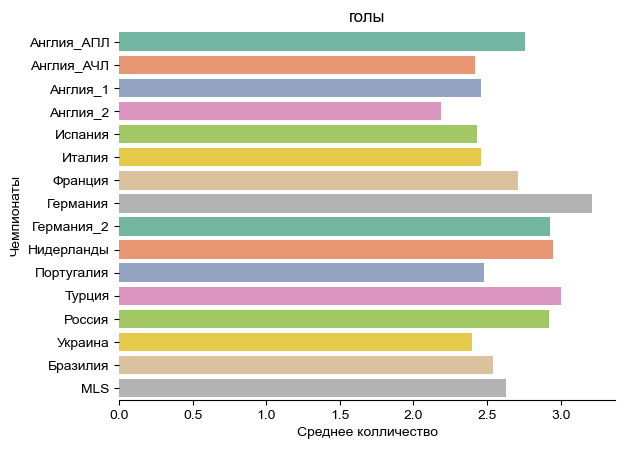

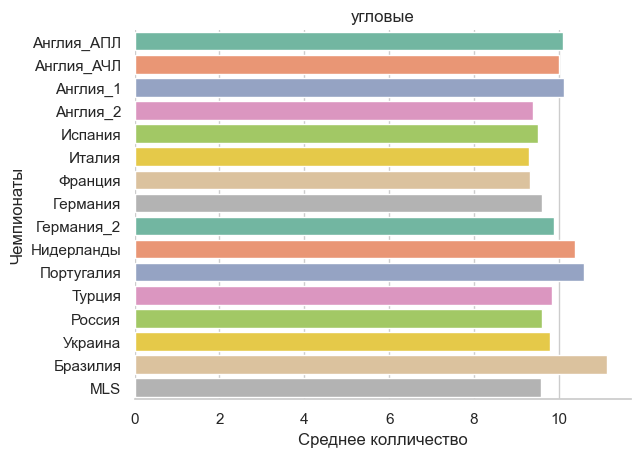

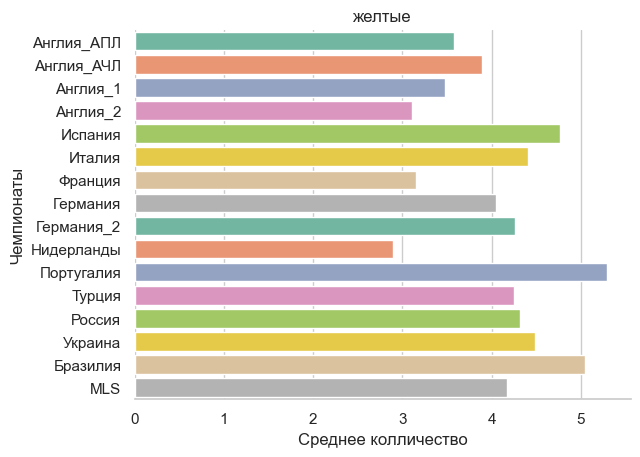

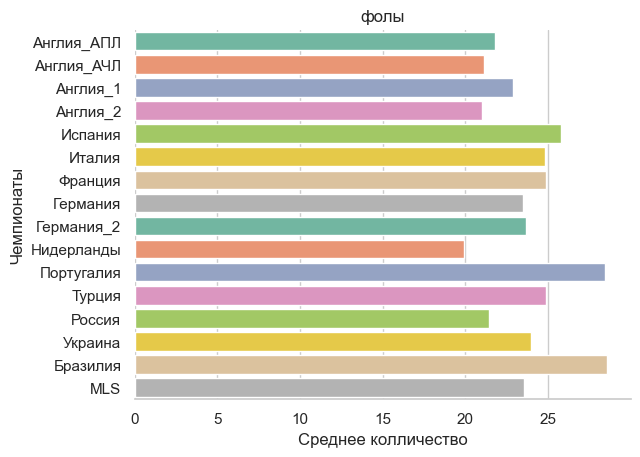

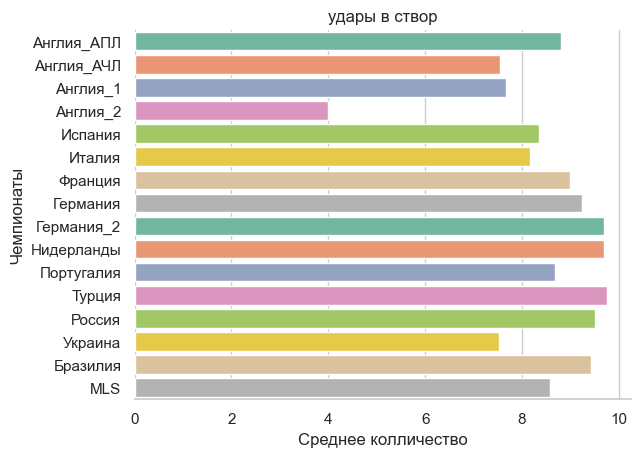

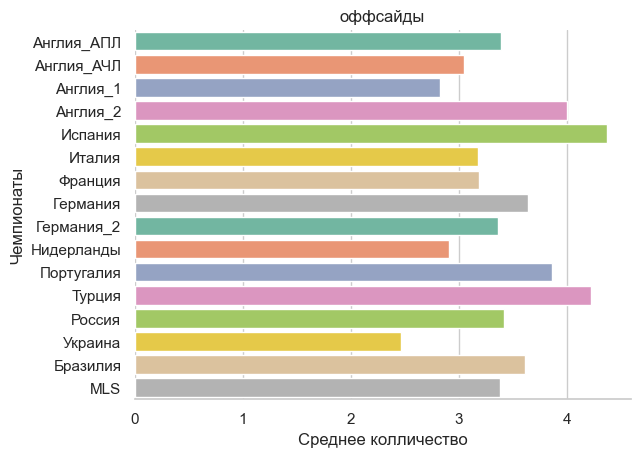

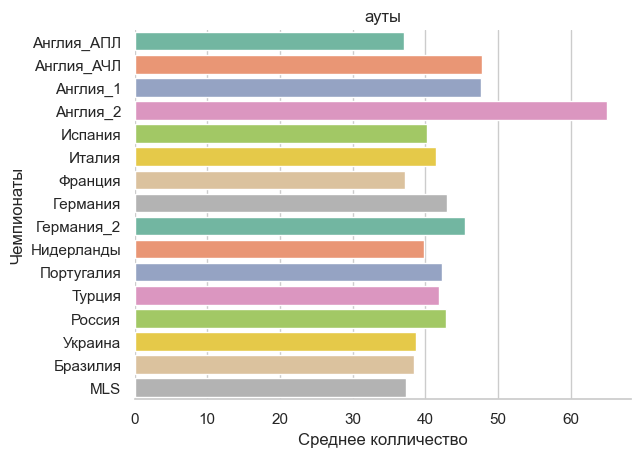

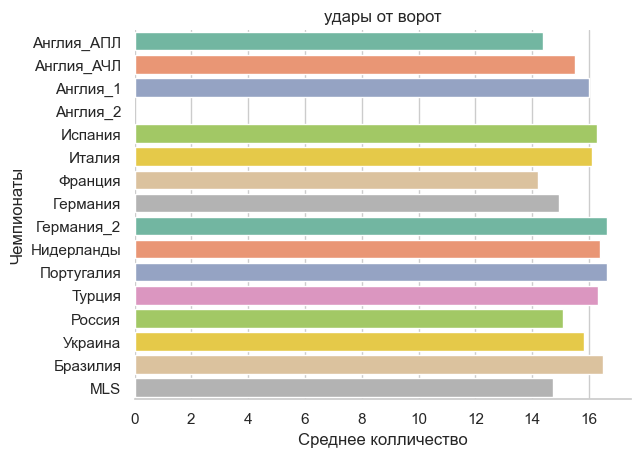

In [19]:
# пройдемся циклом по показателям для топ 1
for i in list_pokazatelei:
    # Создание графика методом bar_plot с настройками
    sns.barplot(data=top_1_o_p_s, x=i, y=top_1_o_p_s.index, palette='Set2')
    sns.set(style='whitegrid')
    sns.despine(left=True)
    #plt.xticks(rotation=90)
    plt.xlabel('Среднее колличество')
    plt.ylabel('Чемпионаты')
    plt.title(i)
    # Отображаем график
    plt.show()

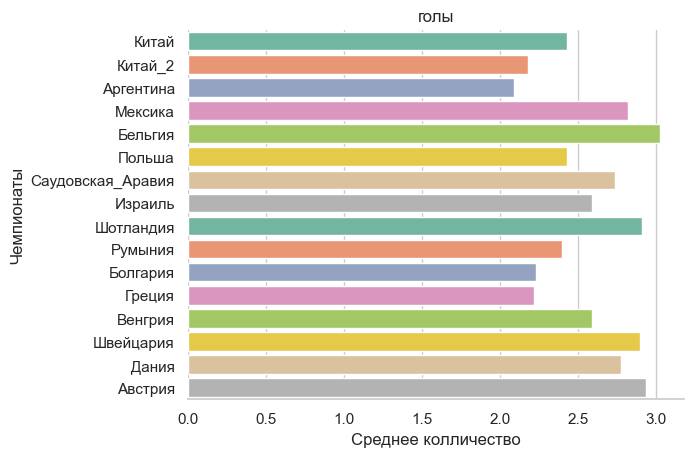

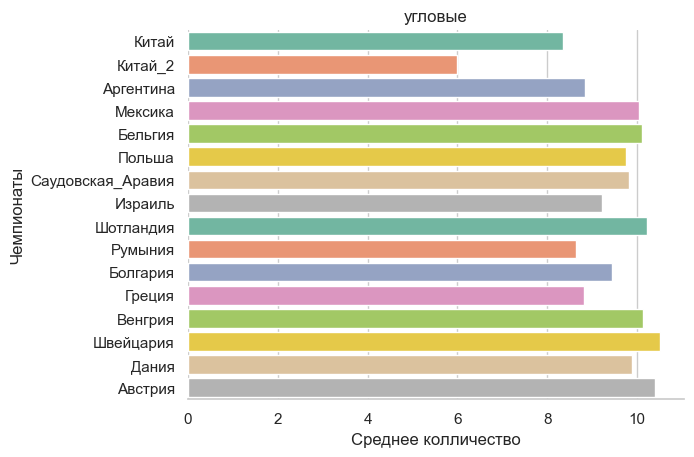

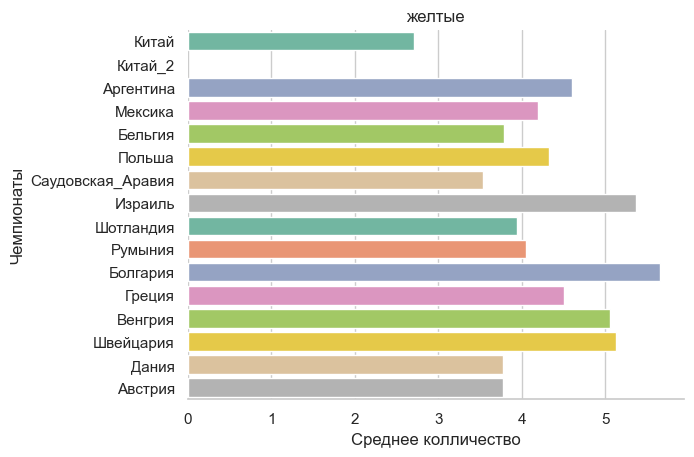

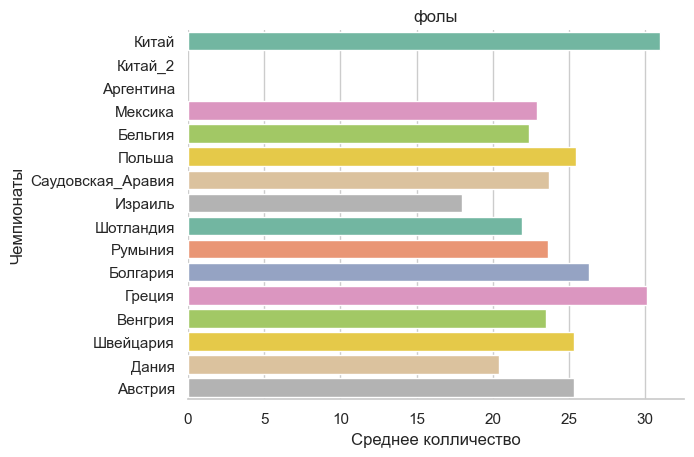

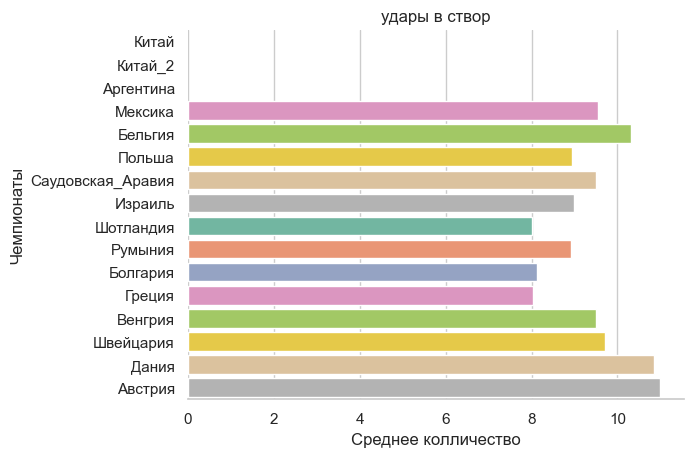

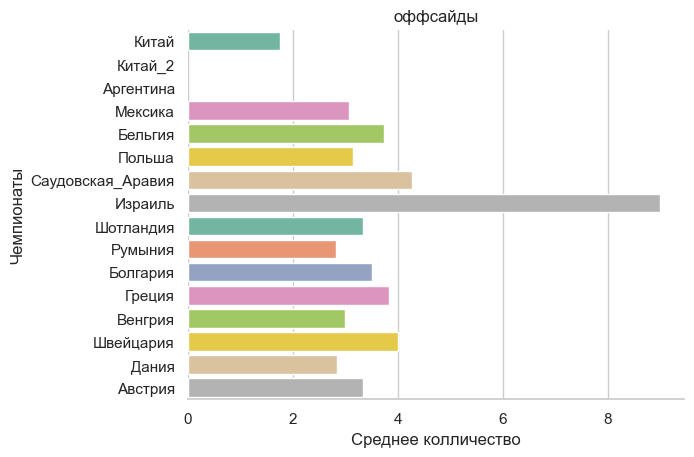

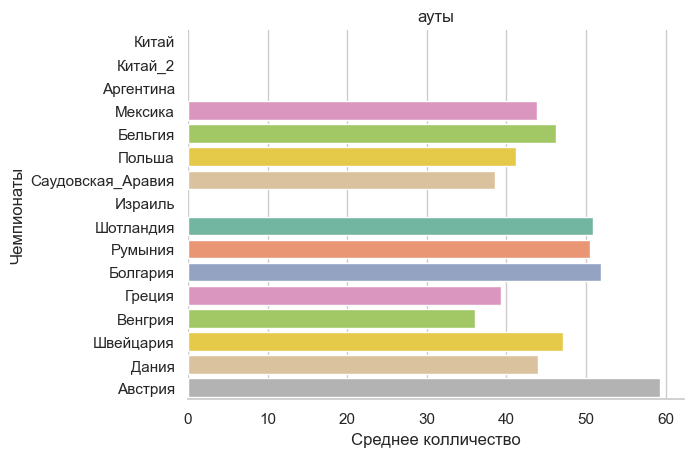

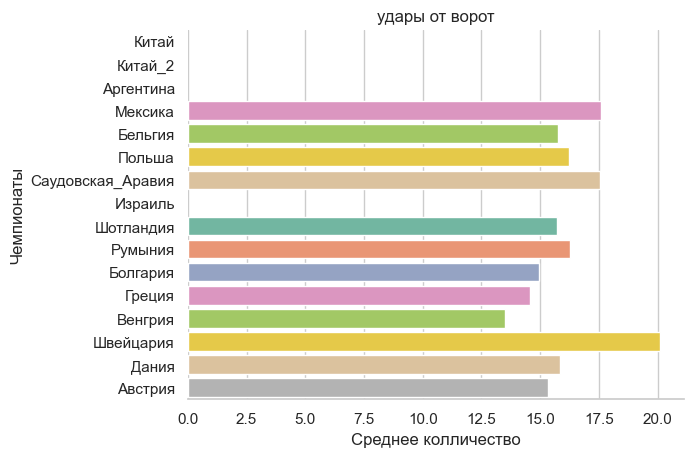

In [20]:
# пройдемся циклом по показателям для топ 2
for i in list_pokazatelei:
    # Создание графика методом bar_plot с настройками
    sns.barplot(data=top_2_o_p_s, x=i, y=top_2_o_p_s.index, palette='Set2')
    sns.set(style='whitegrid')
    sns.despine(left=True)
    #plt.xticks(rotation=90)
    plt.xlabel('Среднее колличество')
    plt.ylabel('Чемпионаты')
    plt.title(i)
    # Отображаем график
    plt.show()

**Вывод** Получил общие показатели по топ чемпионатом. Код получился довольно компактным! Графики наглядно демонстрируют 
распределение показателей. 

Какие то фичи выделять не буду, на данном этапе просто знакомство с данными. 

Думаю нужно более подробно взглянуть на данные. Используя не общий показатели а распределение посмотреть с помощью ящиков

# boxplot статистических данных  <a id='3_2'></a>

[сформируем отдельные датасеты(топ1 и топ2) и напишем функцию](#boxplot_1)

[топ 1 голы в первом тайме](#boxplot_2)

[топ 1 голы во втором тайме](#boxplot_3)

[топ 1 голы за матч](#boxplot_4)

[топ 1 угловые](#boxplot_5)


[топ 1 желтые карточки](#boxplot_6)

[топ 1 фолы](#boxplot_7)

[топ 1 удары в створ](#boxplot_8)

[офсайд](#boxplot_9)

[ауты](#boxplot_10)

[удары от ворот](#boxplot_11)




Построим boxplot для топ 1 чемпионатов. Для каждой категории по 3 графика. Хозяева, гости и общее колличество. Потом также рассмотрим топ 2 чемпионаты.

**сформируем отдельные датасеты(топ1 и топ2) и напишем функцию**  <a id='boxplot_1'></a>

In [21]:
display(data_2022_2023.shape)
data_2022_2023.head(2)

(8073, 38)

ДТ ЛИГА          КО_1          КО_2  ГО_1  ГО_2  ГО_11  \
0 2022-09-14 02:30:00  MLS   ФК Монреаль   Чикаго Файр     3     2    3.0   
1 2022-09-14 03:00:00  MLS  Интер Майами  Коламбус Кру     2     1    1.0   

   ГО_21  ГО_12  ГО_22  ...  счет_1т  счет_2т  счет  угловые  желтые  фолы  \
0    1.0    0.0    1.0  ...      4.0      1.0     5      6.0     7.0   NaN   
1    1.0    1.0    0.0  ...      2.0      1.0     3     13.0     2.0   NaN   

   удары_створ  офсайд  ауты  удары_от_ворот  
0          NaN     NaN   NaN             NaN  
1          NaN     NaN   NaN             NaN  

[2 rows x 38 columns]

In [22]:
# выберем том чемпионаты  list_top_1
data_top_1 = data_2022_2023.query('ЛИГА in @list_top_1')
display(data_top_1.shape)
data_top_1.head(2)

(5001, 38)

ДТ ЛИГА          КО_1          КО_2  ГО_1  ГО_2  ГО_11  \
0 2022-09-14 02:30:00  MLS   ФК Монреаль   Чикаго Файр     3     2    3.0   
1 2022-09-14 03:00:00  MLS  Интер Майами  Коламбус Кру     2     1    1.0   

   ГО_21  ГО_12  ГО_22  ...  счет_1т  счет_2т  счет  угловые  желтые  фолы  \
0    1.0    0.0    1.0  ...      4.0      1.0     5      6.0     7.0   NaN   
1    1.0    1.0    0.0  ...      2.0      1.0     3     13.0     2.0   NaN   

   удары_створ  офсайд  ауты  удары_от_ворот  
0          NaN     NaN   NaN             NaN  
1          NaN     NaN   NaN             NaN  

[2 rows x 38 columns]

In [23]:
# выберем том чемпионаты  list_top_2
data_top_2 = data_2022_2023.query('ЛИГА in @list_top_2')
display(data_top_2.shape)
data_top_2.head(2)

(3072, 38)

ДТ               ЛИГА               КО_1              КО_2  \
5 2022-09-14 05:05:00            Мексика  Чивас Гвадалахара  Тигрес Монтеррей   
6 2022-09-14 18:55:00  Саудовская_Аравия            Аль-Тай         Аль-Фатех   

   ГО_1  ГО_2  ГО_11  ГО_21  ГО_12  ГО_22  ...  счет_1т  счет_2т  счет  \
5     1     4    0.0    2.0    1.0    2.0  ...      2.0      3.0     5   
6     1     0    0.0    0.0    1.0    0.0  ...      0.0      1.0     1   

   угловые  желтые  фолы  удары_створ  офсайд  ауты  удары_от_ворот  
5     18.0     NaN   NaN          NaN     NaN   NaN             NaN  
6      NaN     NaN   NaN          NaN     NaN   NaN             NaN  

[2 rows x 38 columns]

In [24]:
# напишем функцию для графика boxplot
def grafik_boxplot(data, i):
    sns.set_theme(style="ticks", palette="pastel")
    plt.figure(figsize=(55, 30))
    sns.set(font_scale=3)  # Размер шрифта: 1.2 пункта
    sns.boxplot(x="ЛИГА", y=i,
                hue="ЛИГА", palette=["m", "g"],
                data=data)
    sns.despine(offset=10, trim=True)

In [25]:
# создадим список с категориями для функции
list_kategorii = ['счет_1т', 'счет_2т', 'счет', 'угловые', 'желтые', 'фолы', 'удары_створ', 
                  'офсайд', 'ауты', 'удары_от_ворот']

**топ 1 голы в первом тайме**  <a id='boxplot_2'></a>

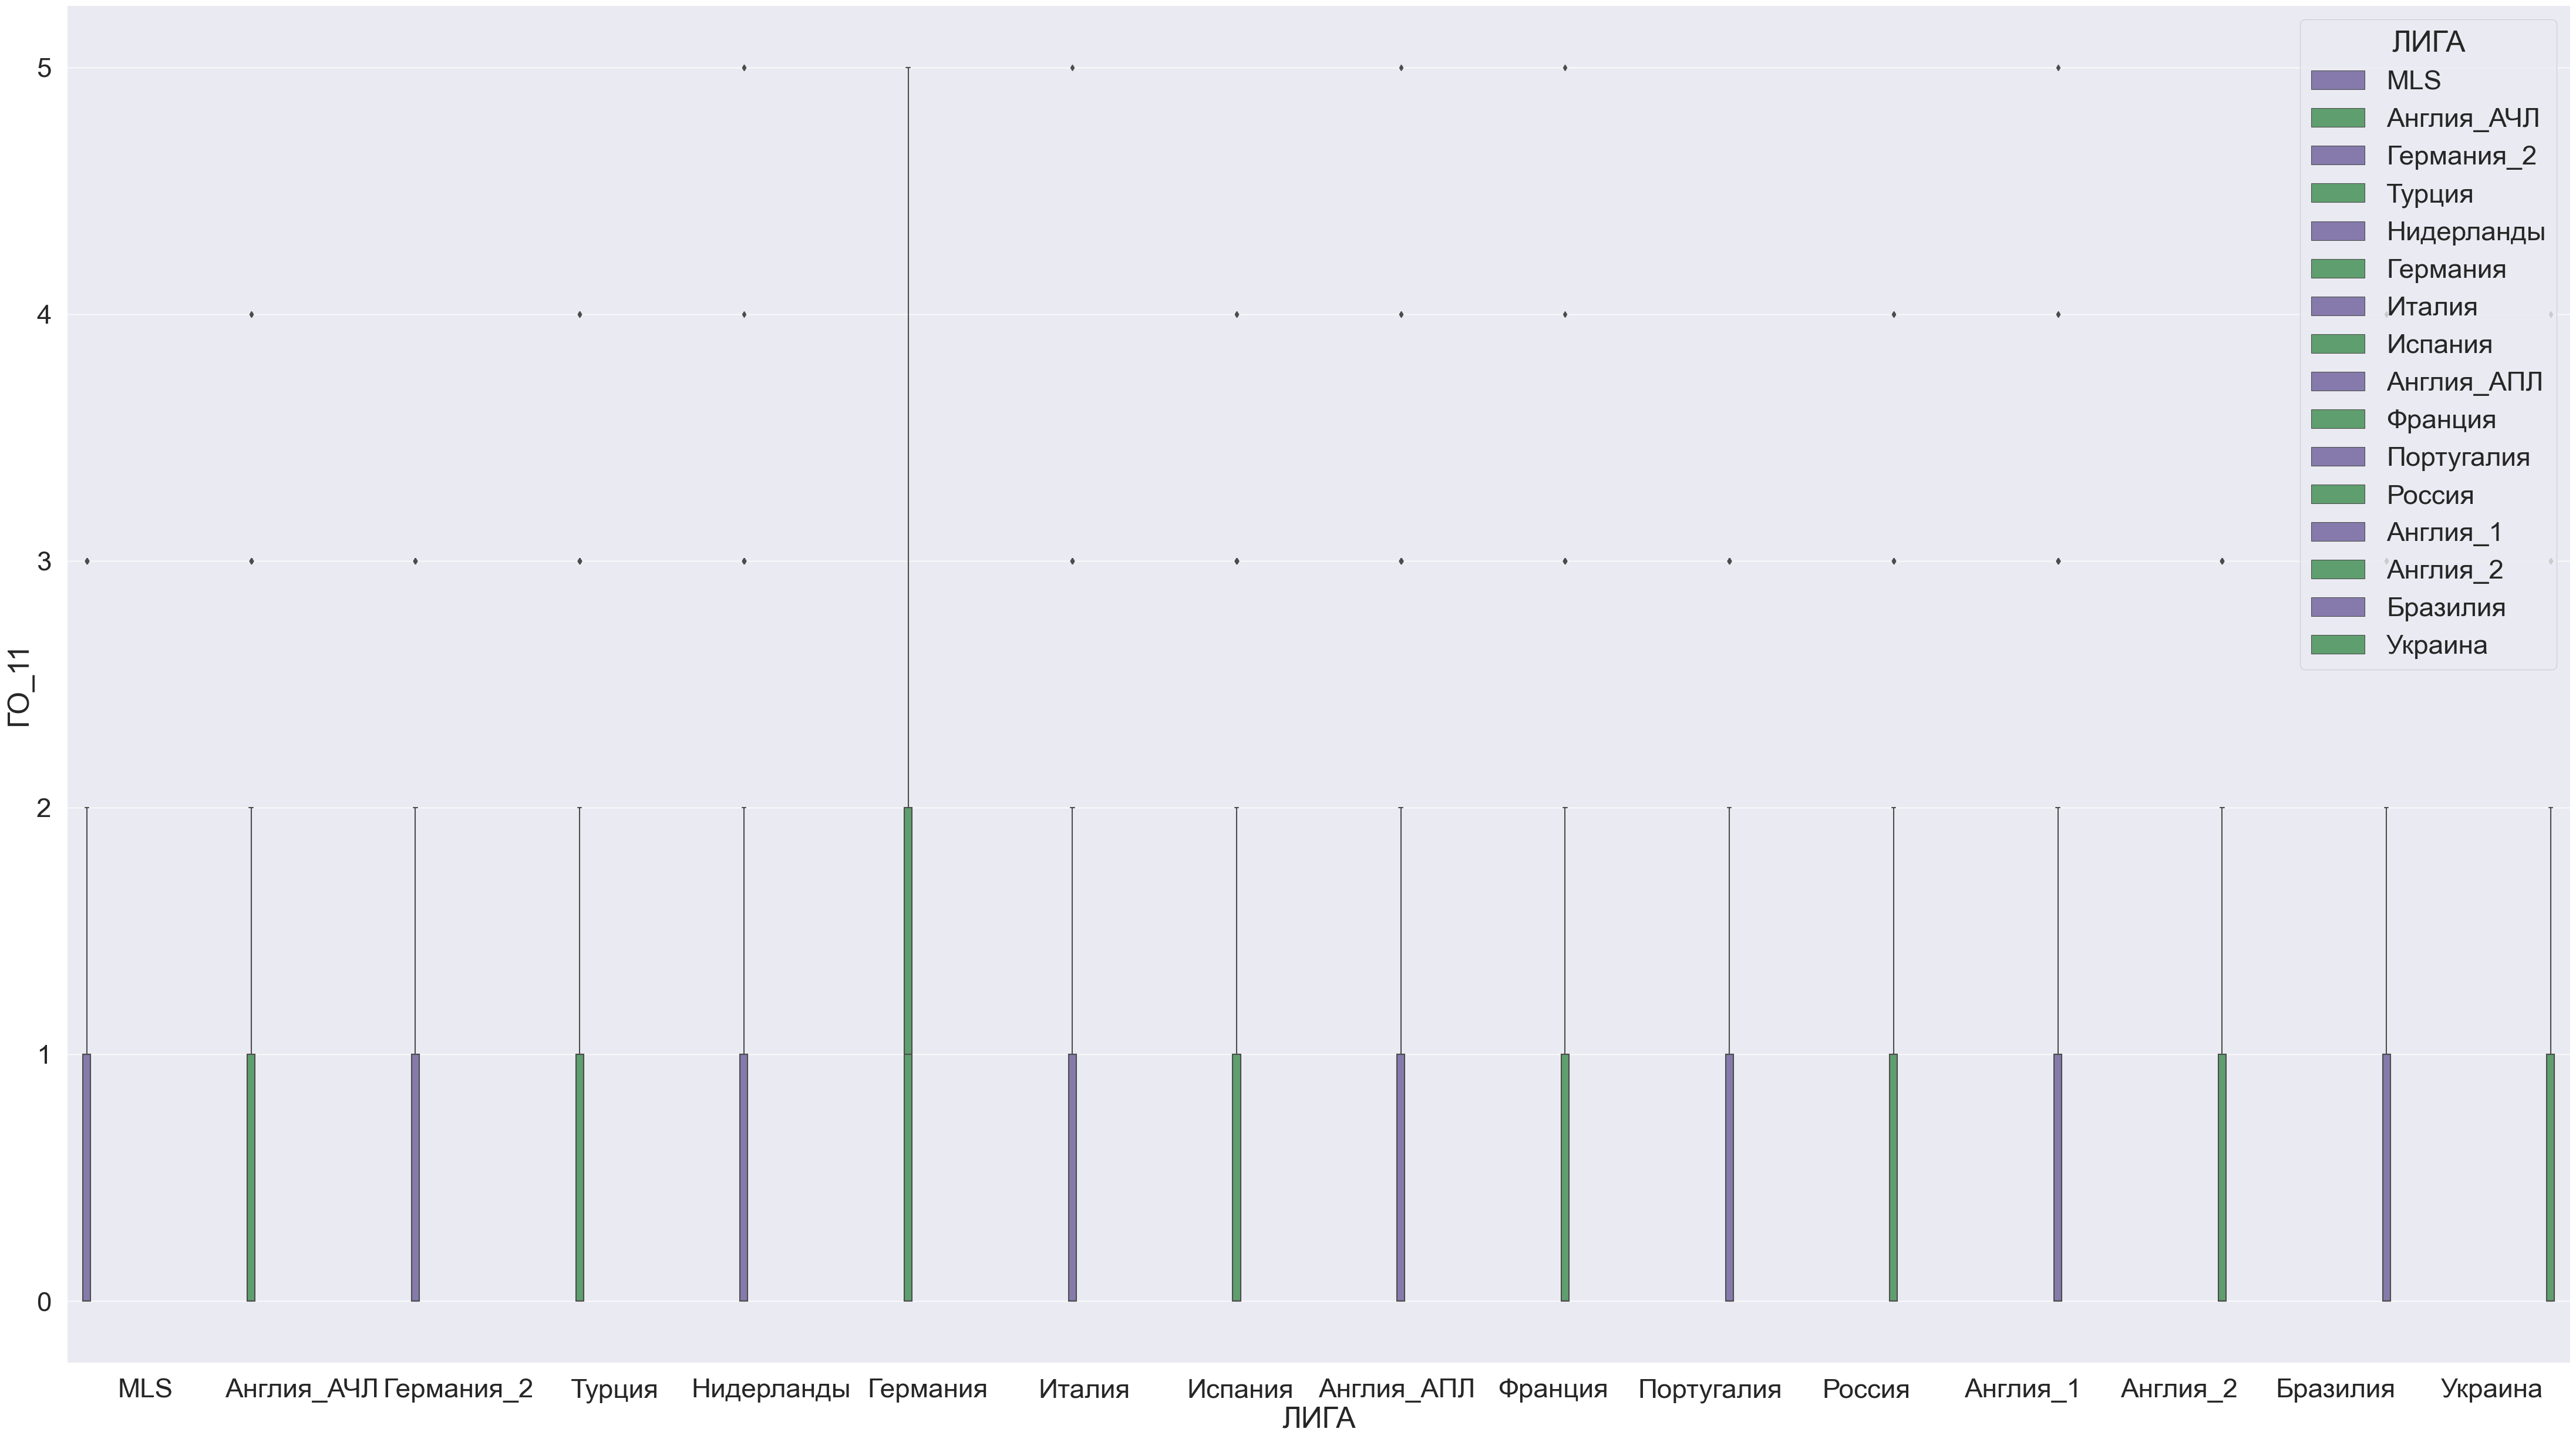

In [26]:
# boxplot голы хозяев в первом тайме
grafik_boxplot(data_top_1,'ГО_11')

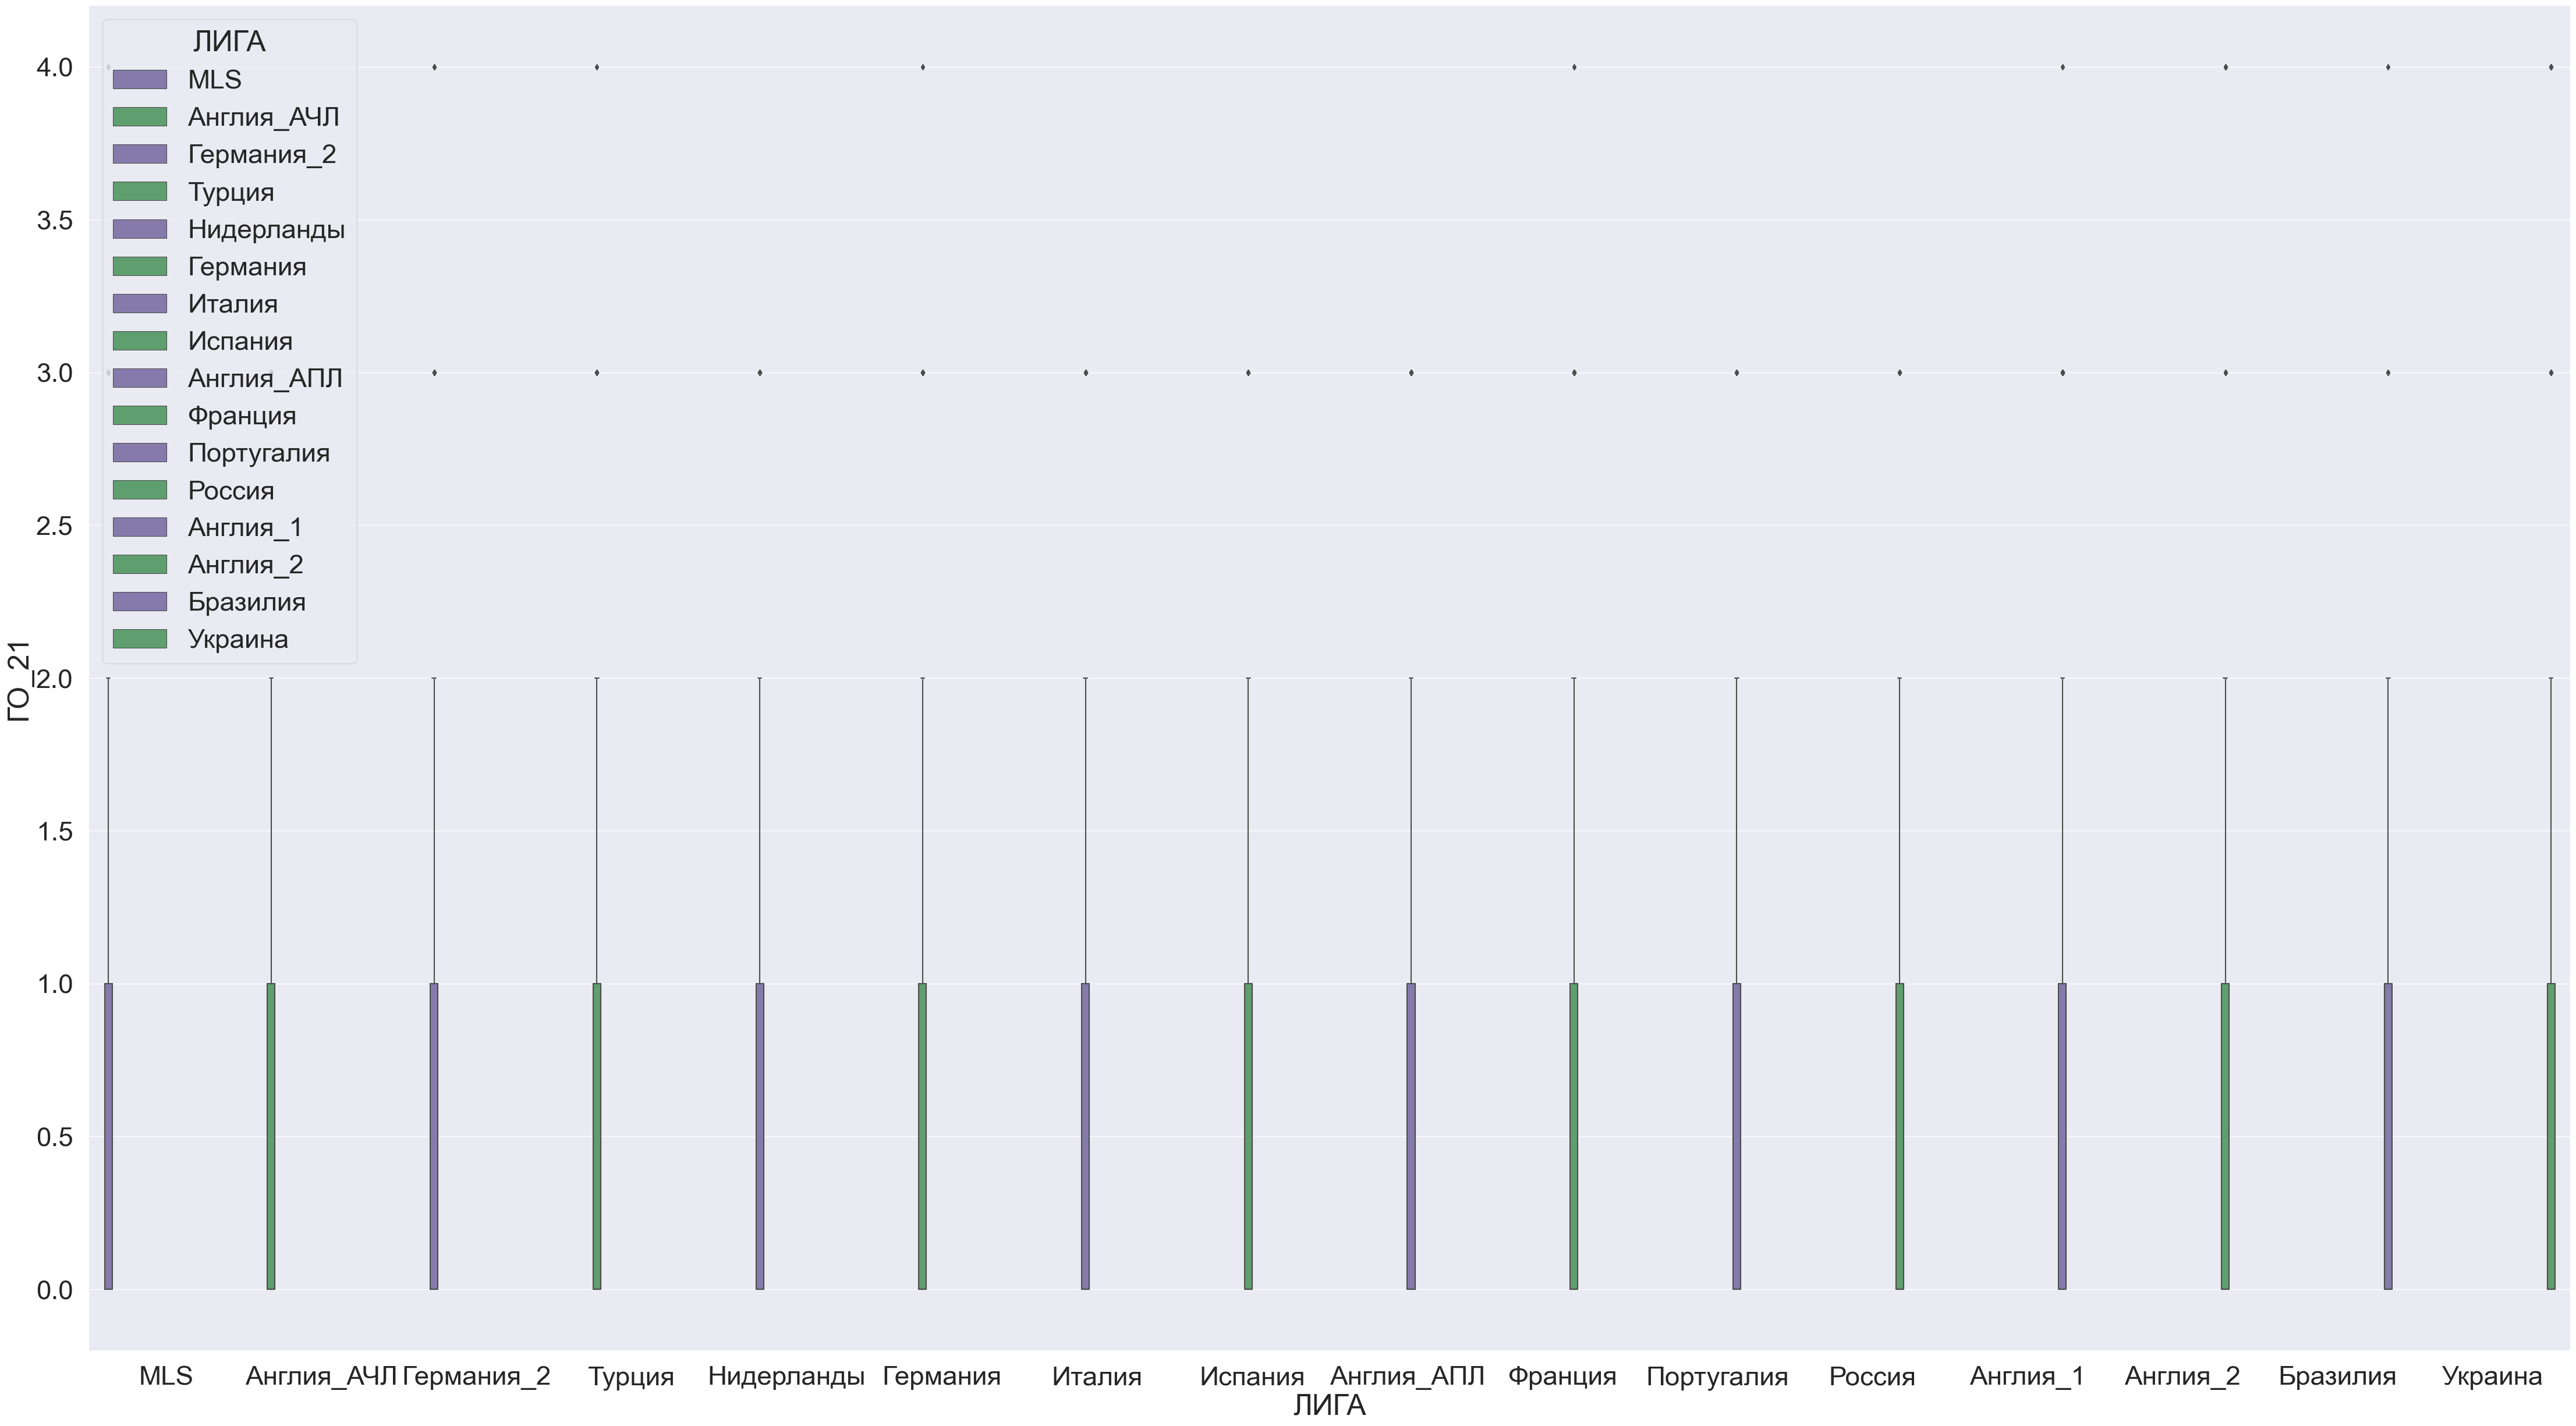

In [27]:
# boxplot голы гостей в первом тайме
grafik_boxplot(data_top_1,'ГО_21')

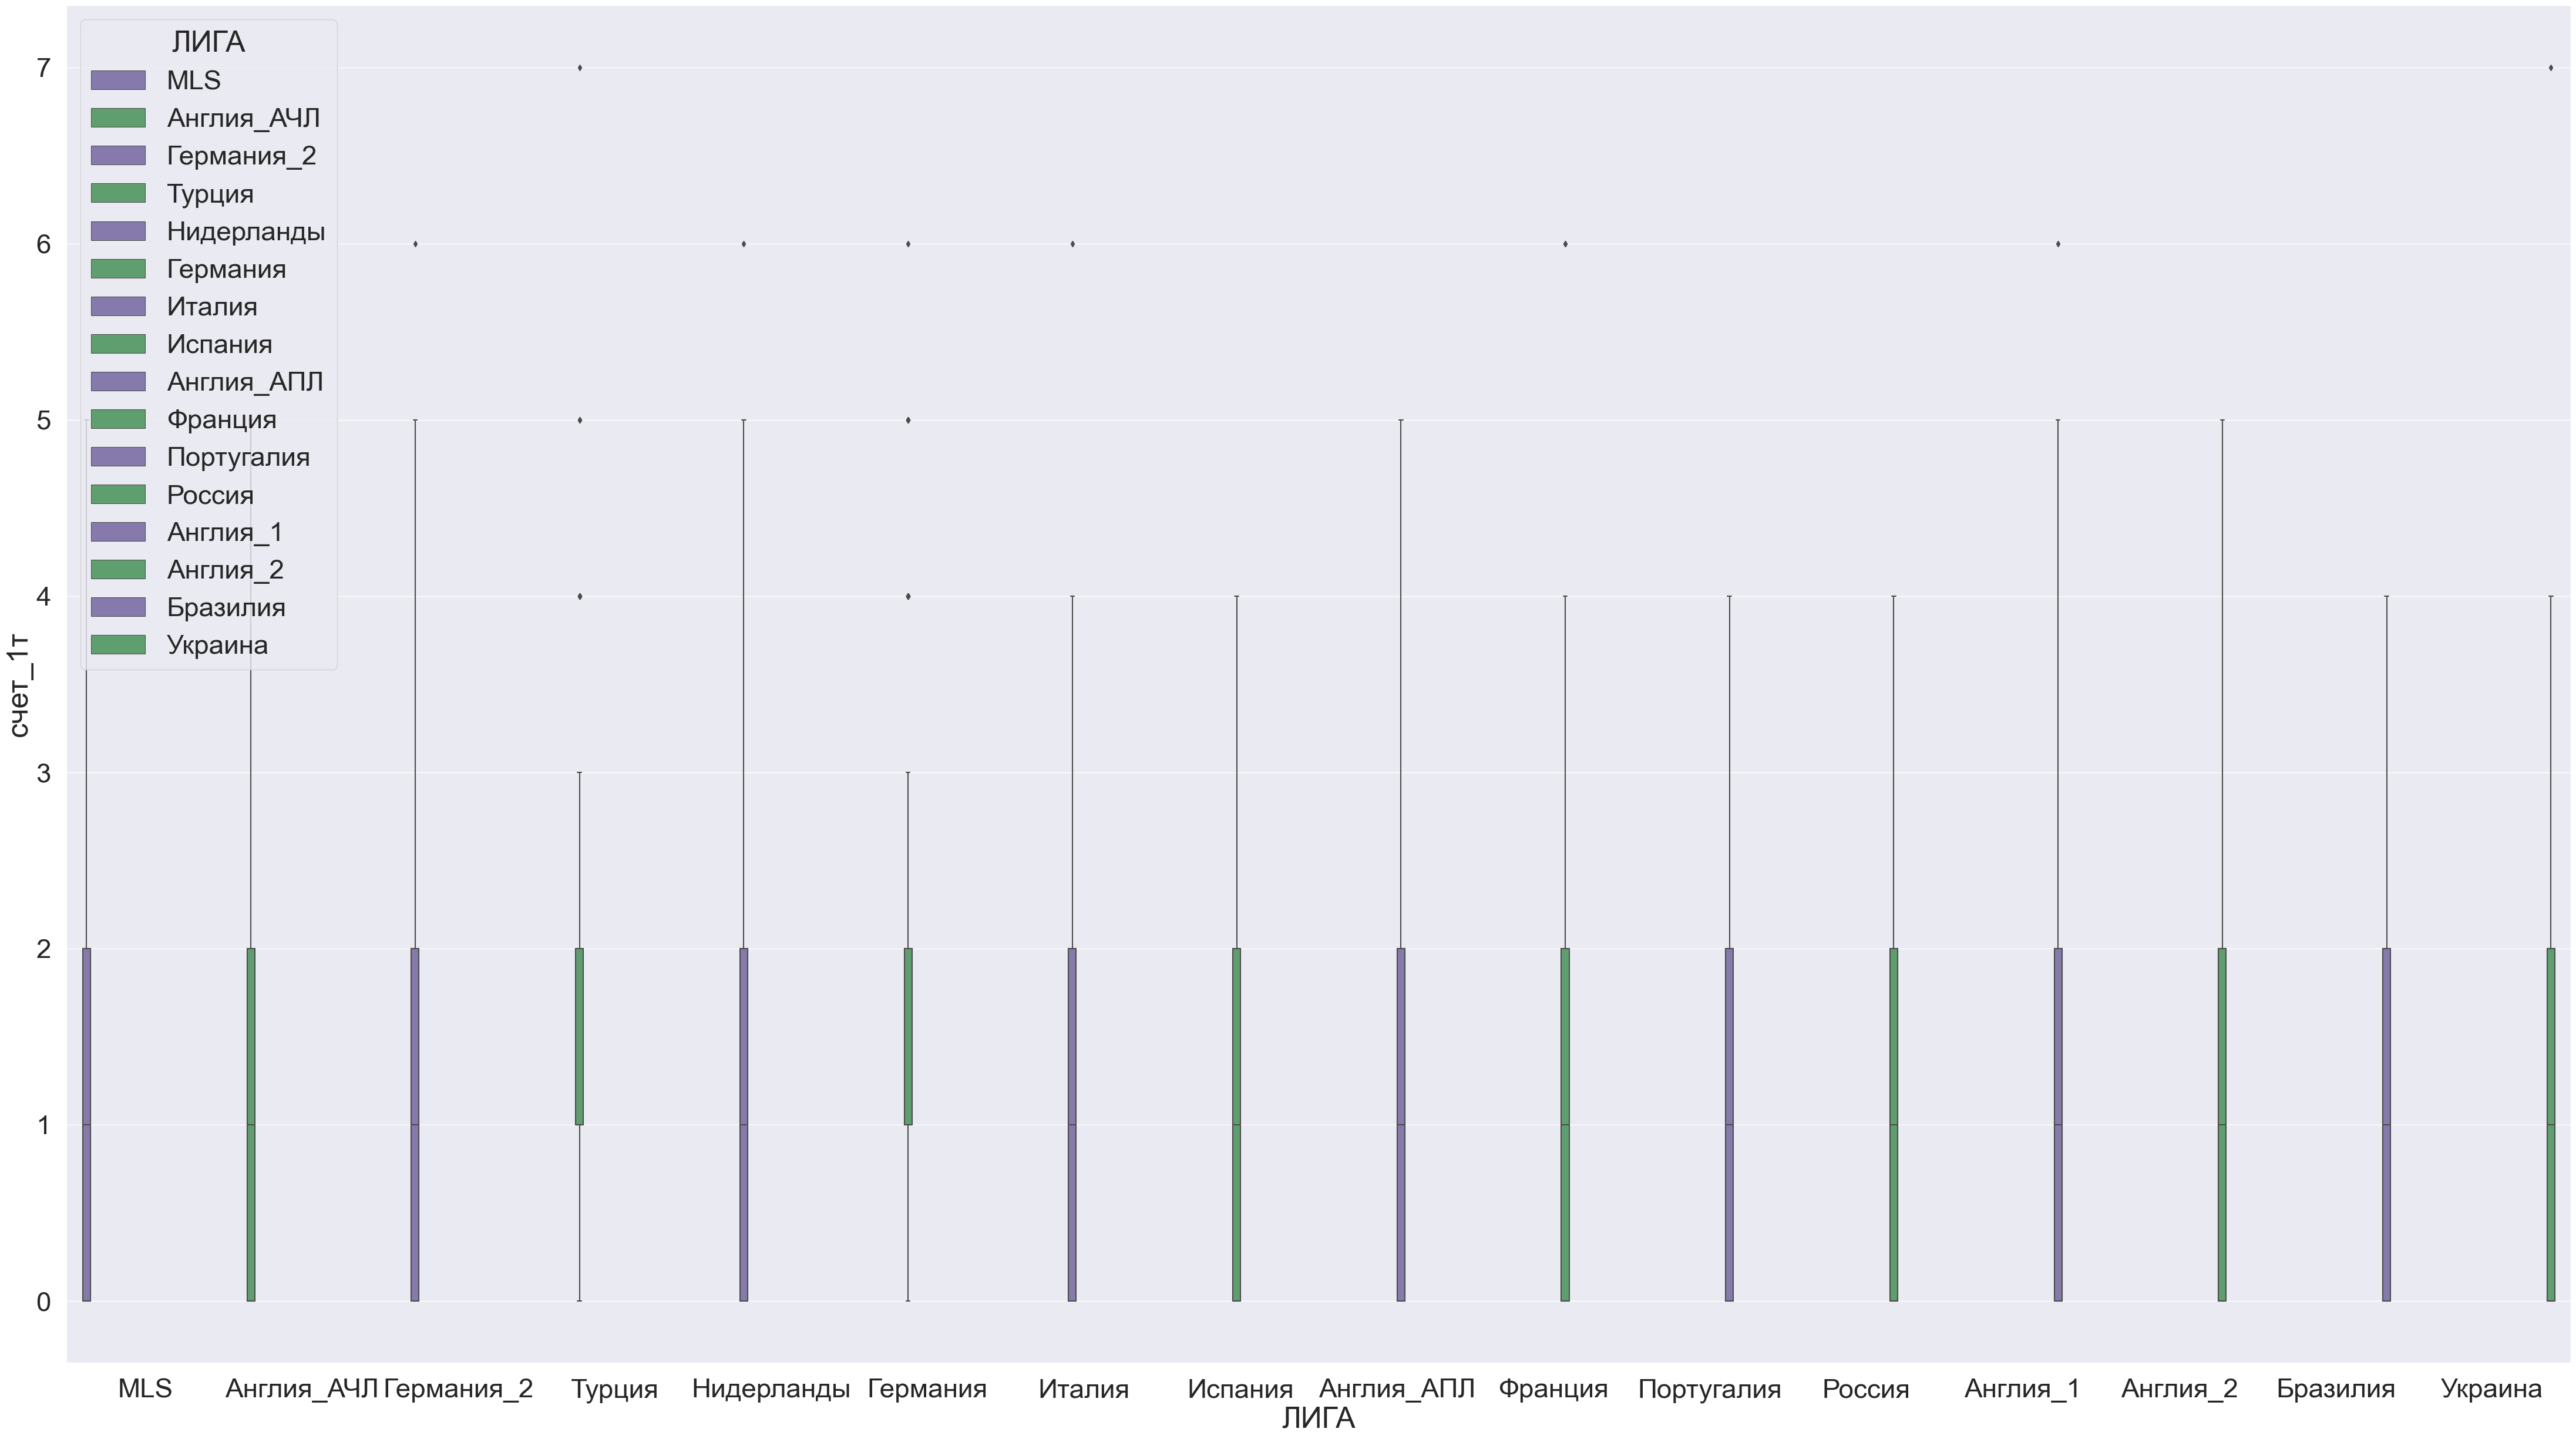

In [28]:
# boxplot голы в первом тайме
grafik_boxplot(data_top_1,'счет_1т')

Наблюдения голы в первом тайме: 

графики малоинформативны почти все ящики как один, просто потому что маленький диапозон значений. Голов в первом тайме один или 2.

**топ 1 голы во втором тайме**  <a id='boxplot_3'></a>

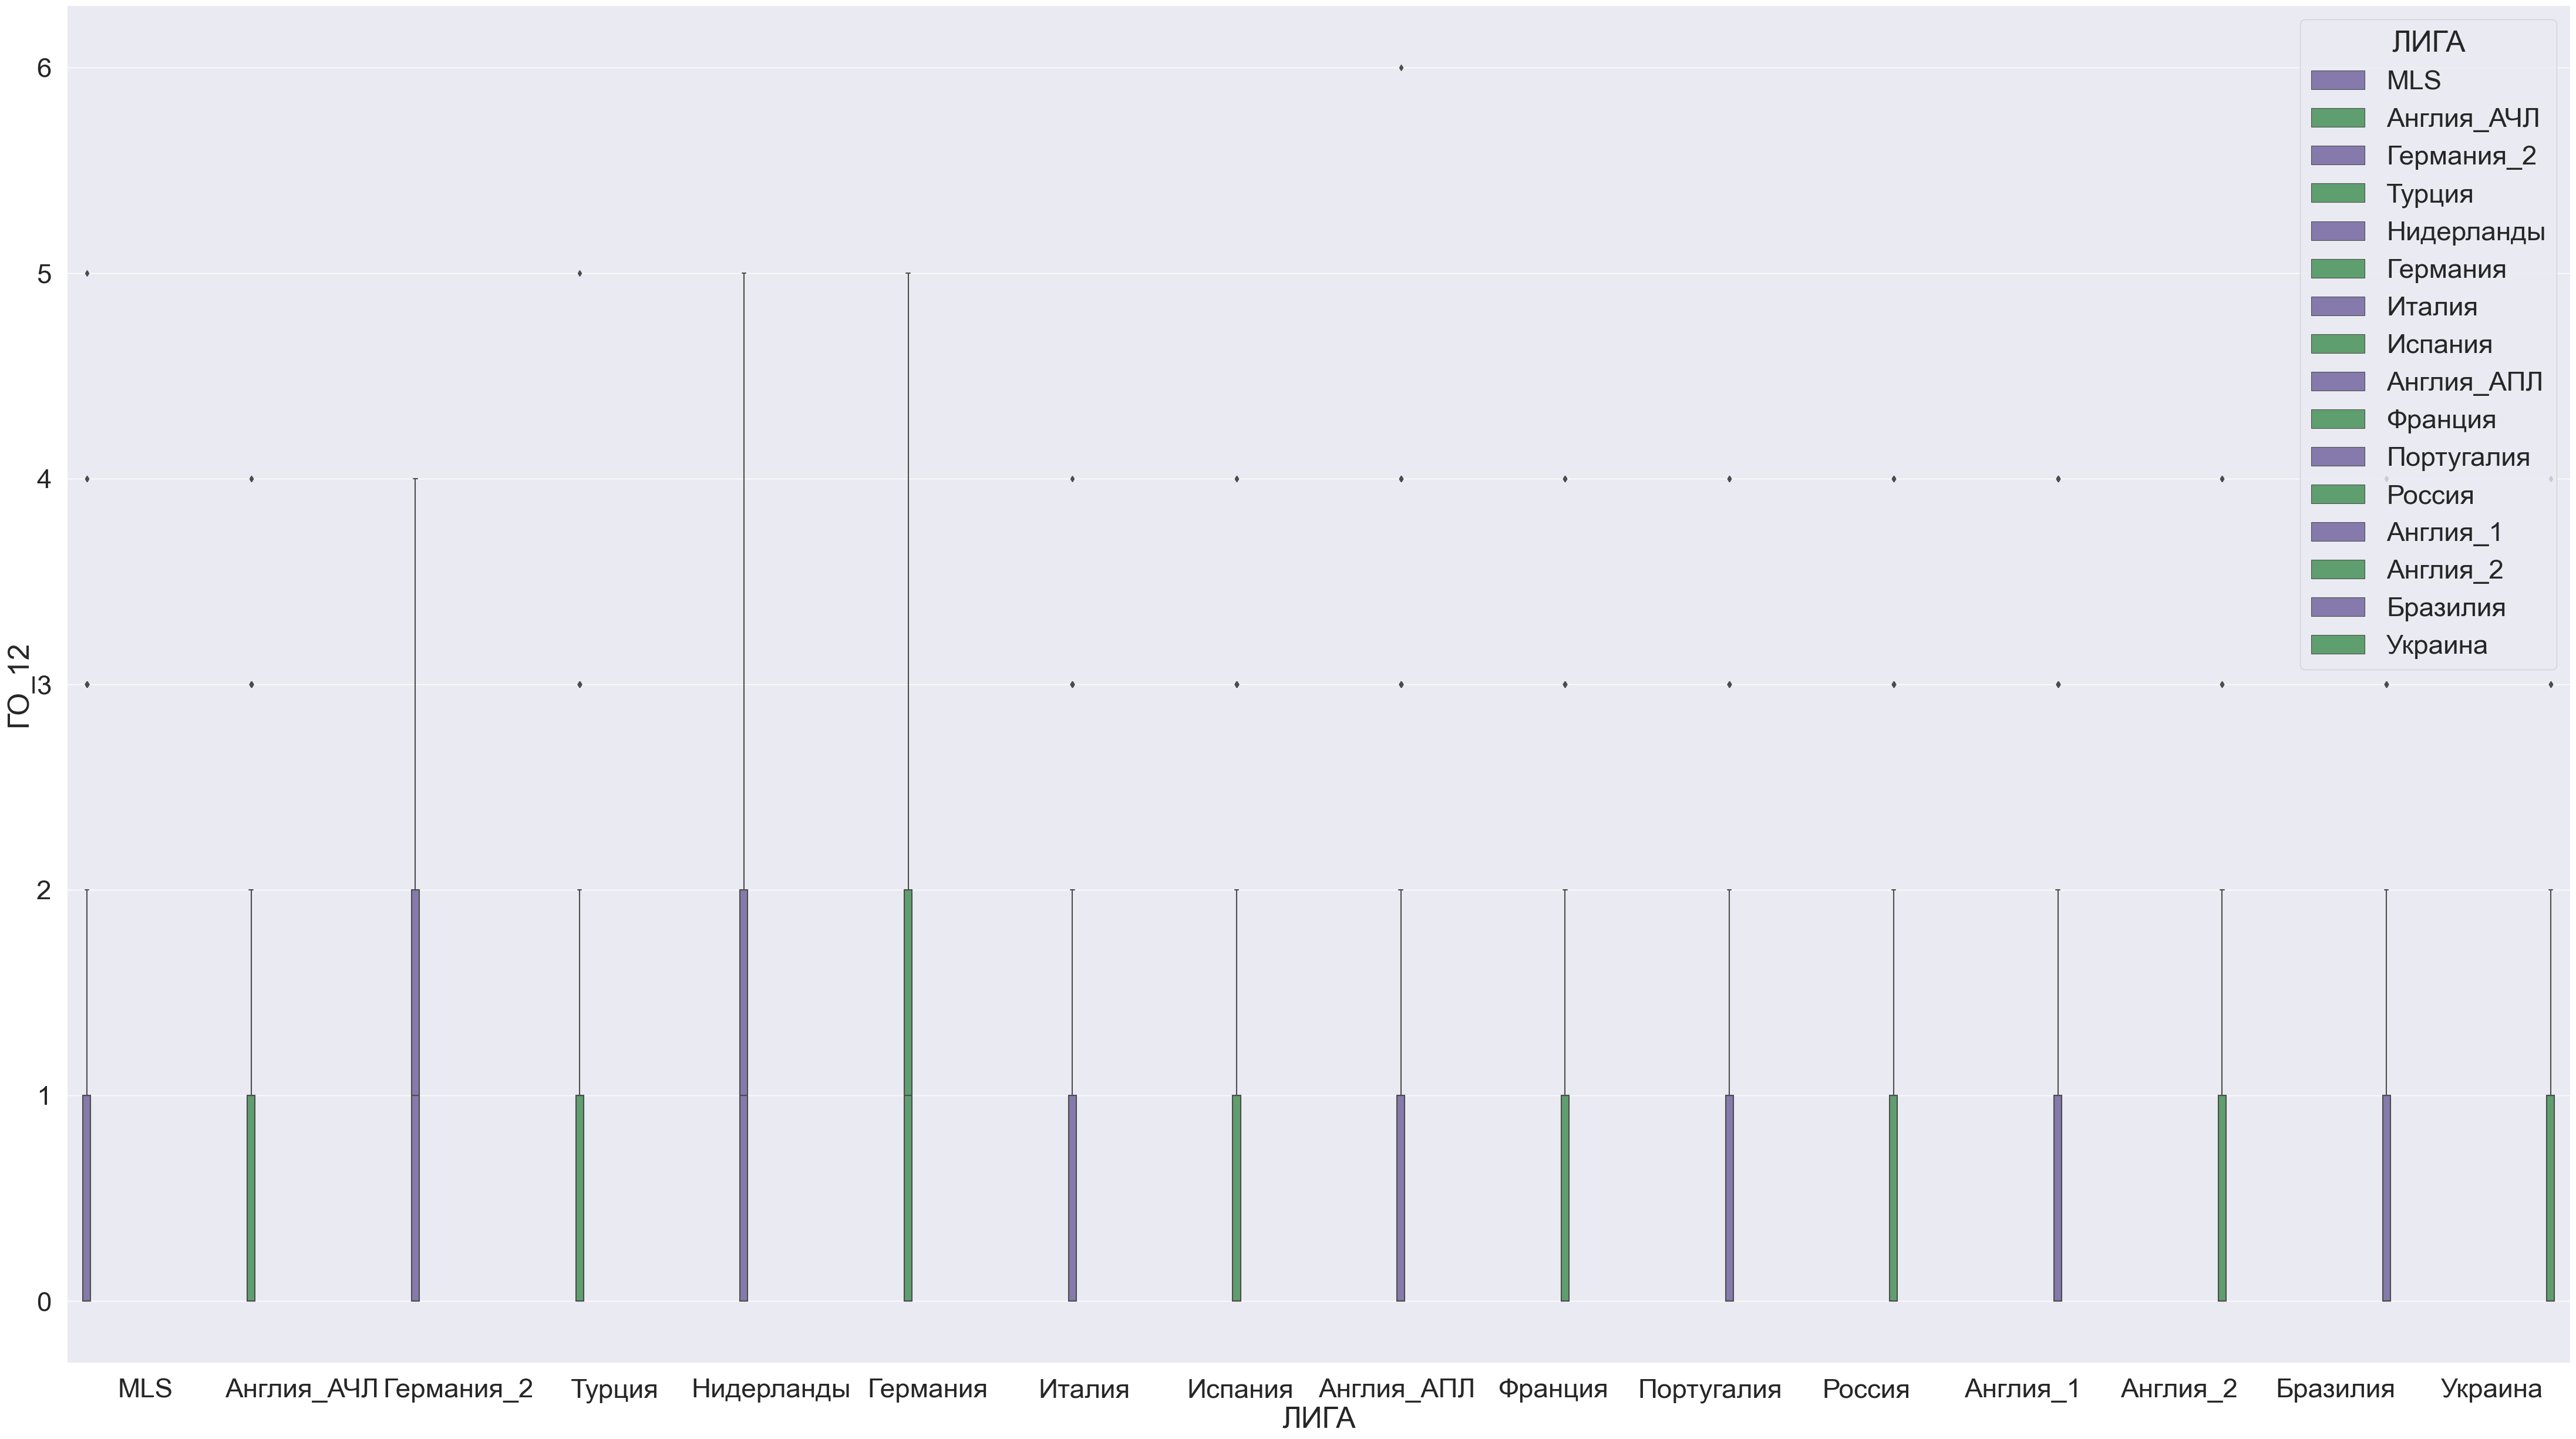

In [29]:
# boxplot голы хозяев во втором тайме
grafik_boxplot(data_top_1,'ГО_12')

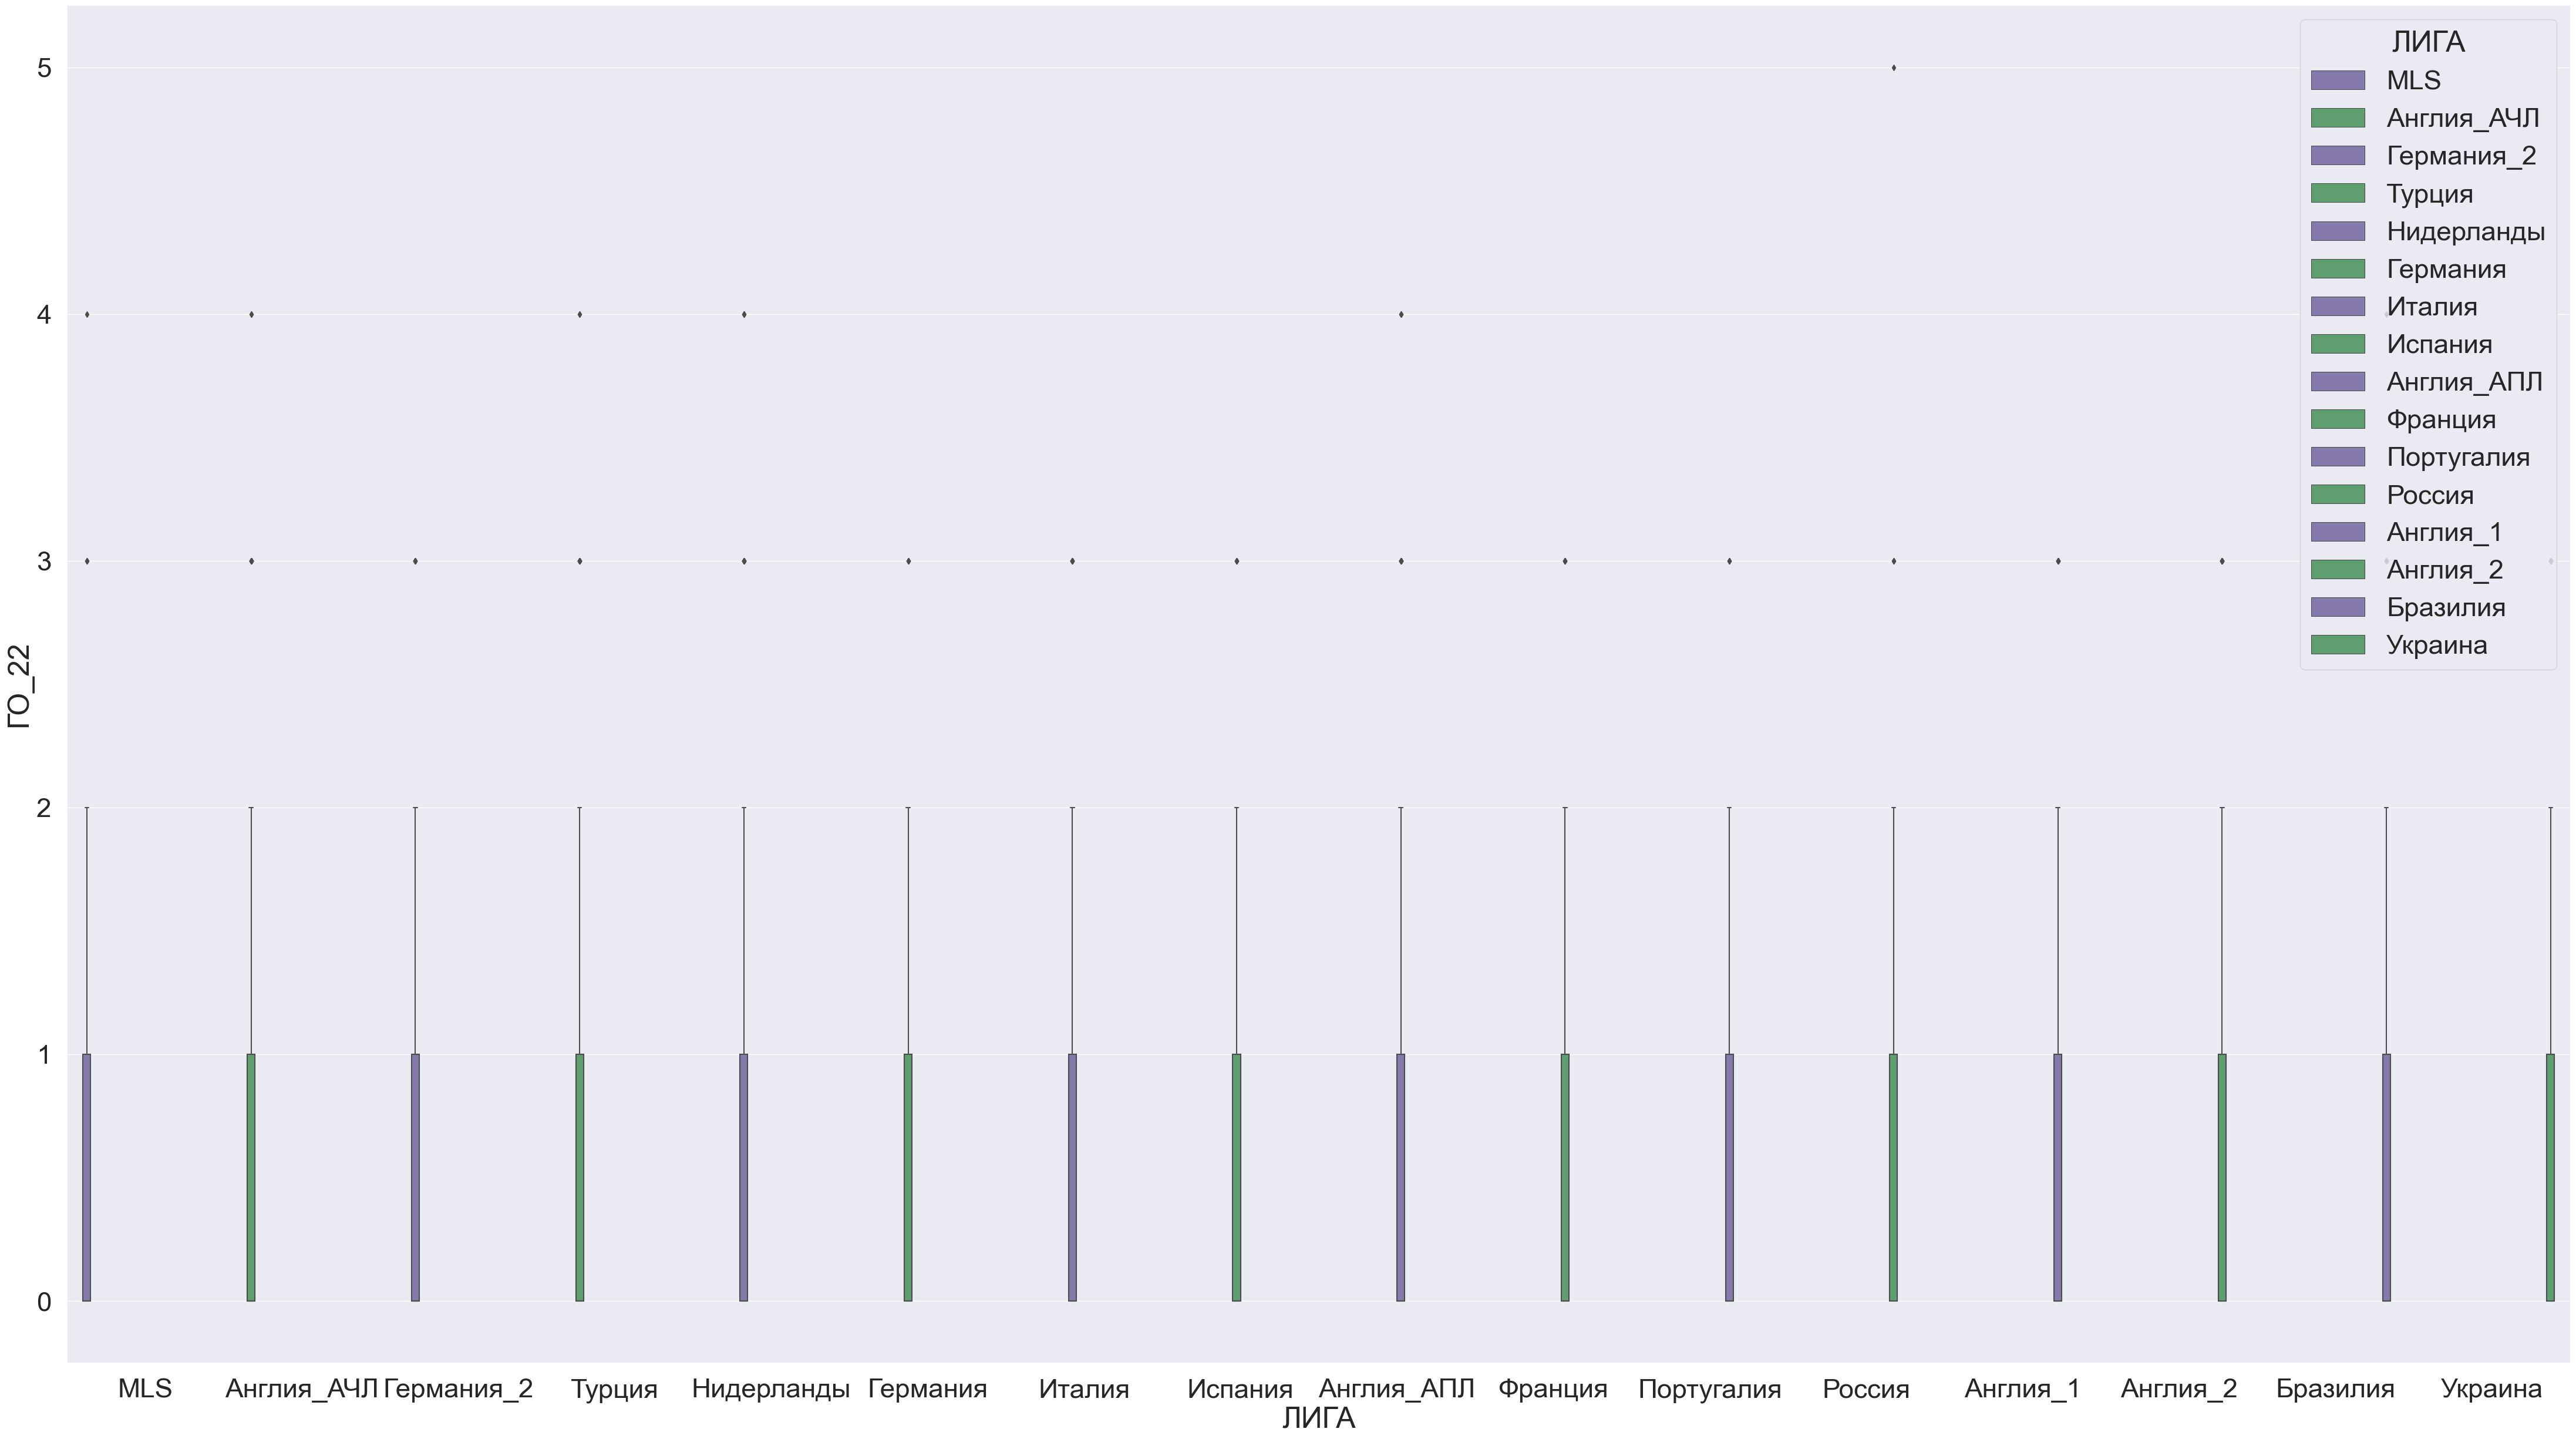

In [30]:
# boxplot голы гостей во втором тайме
grafik_boxplot(data_top_1,'ГО_22')

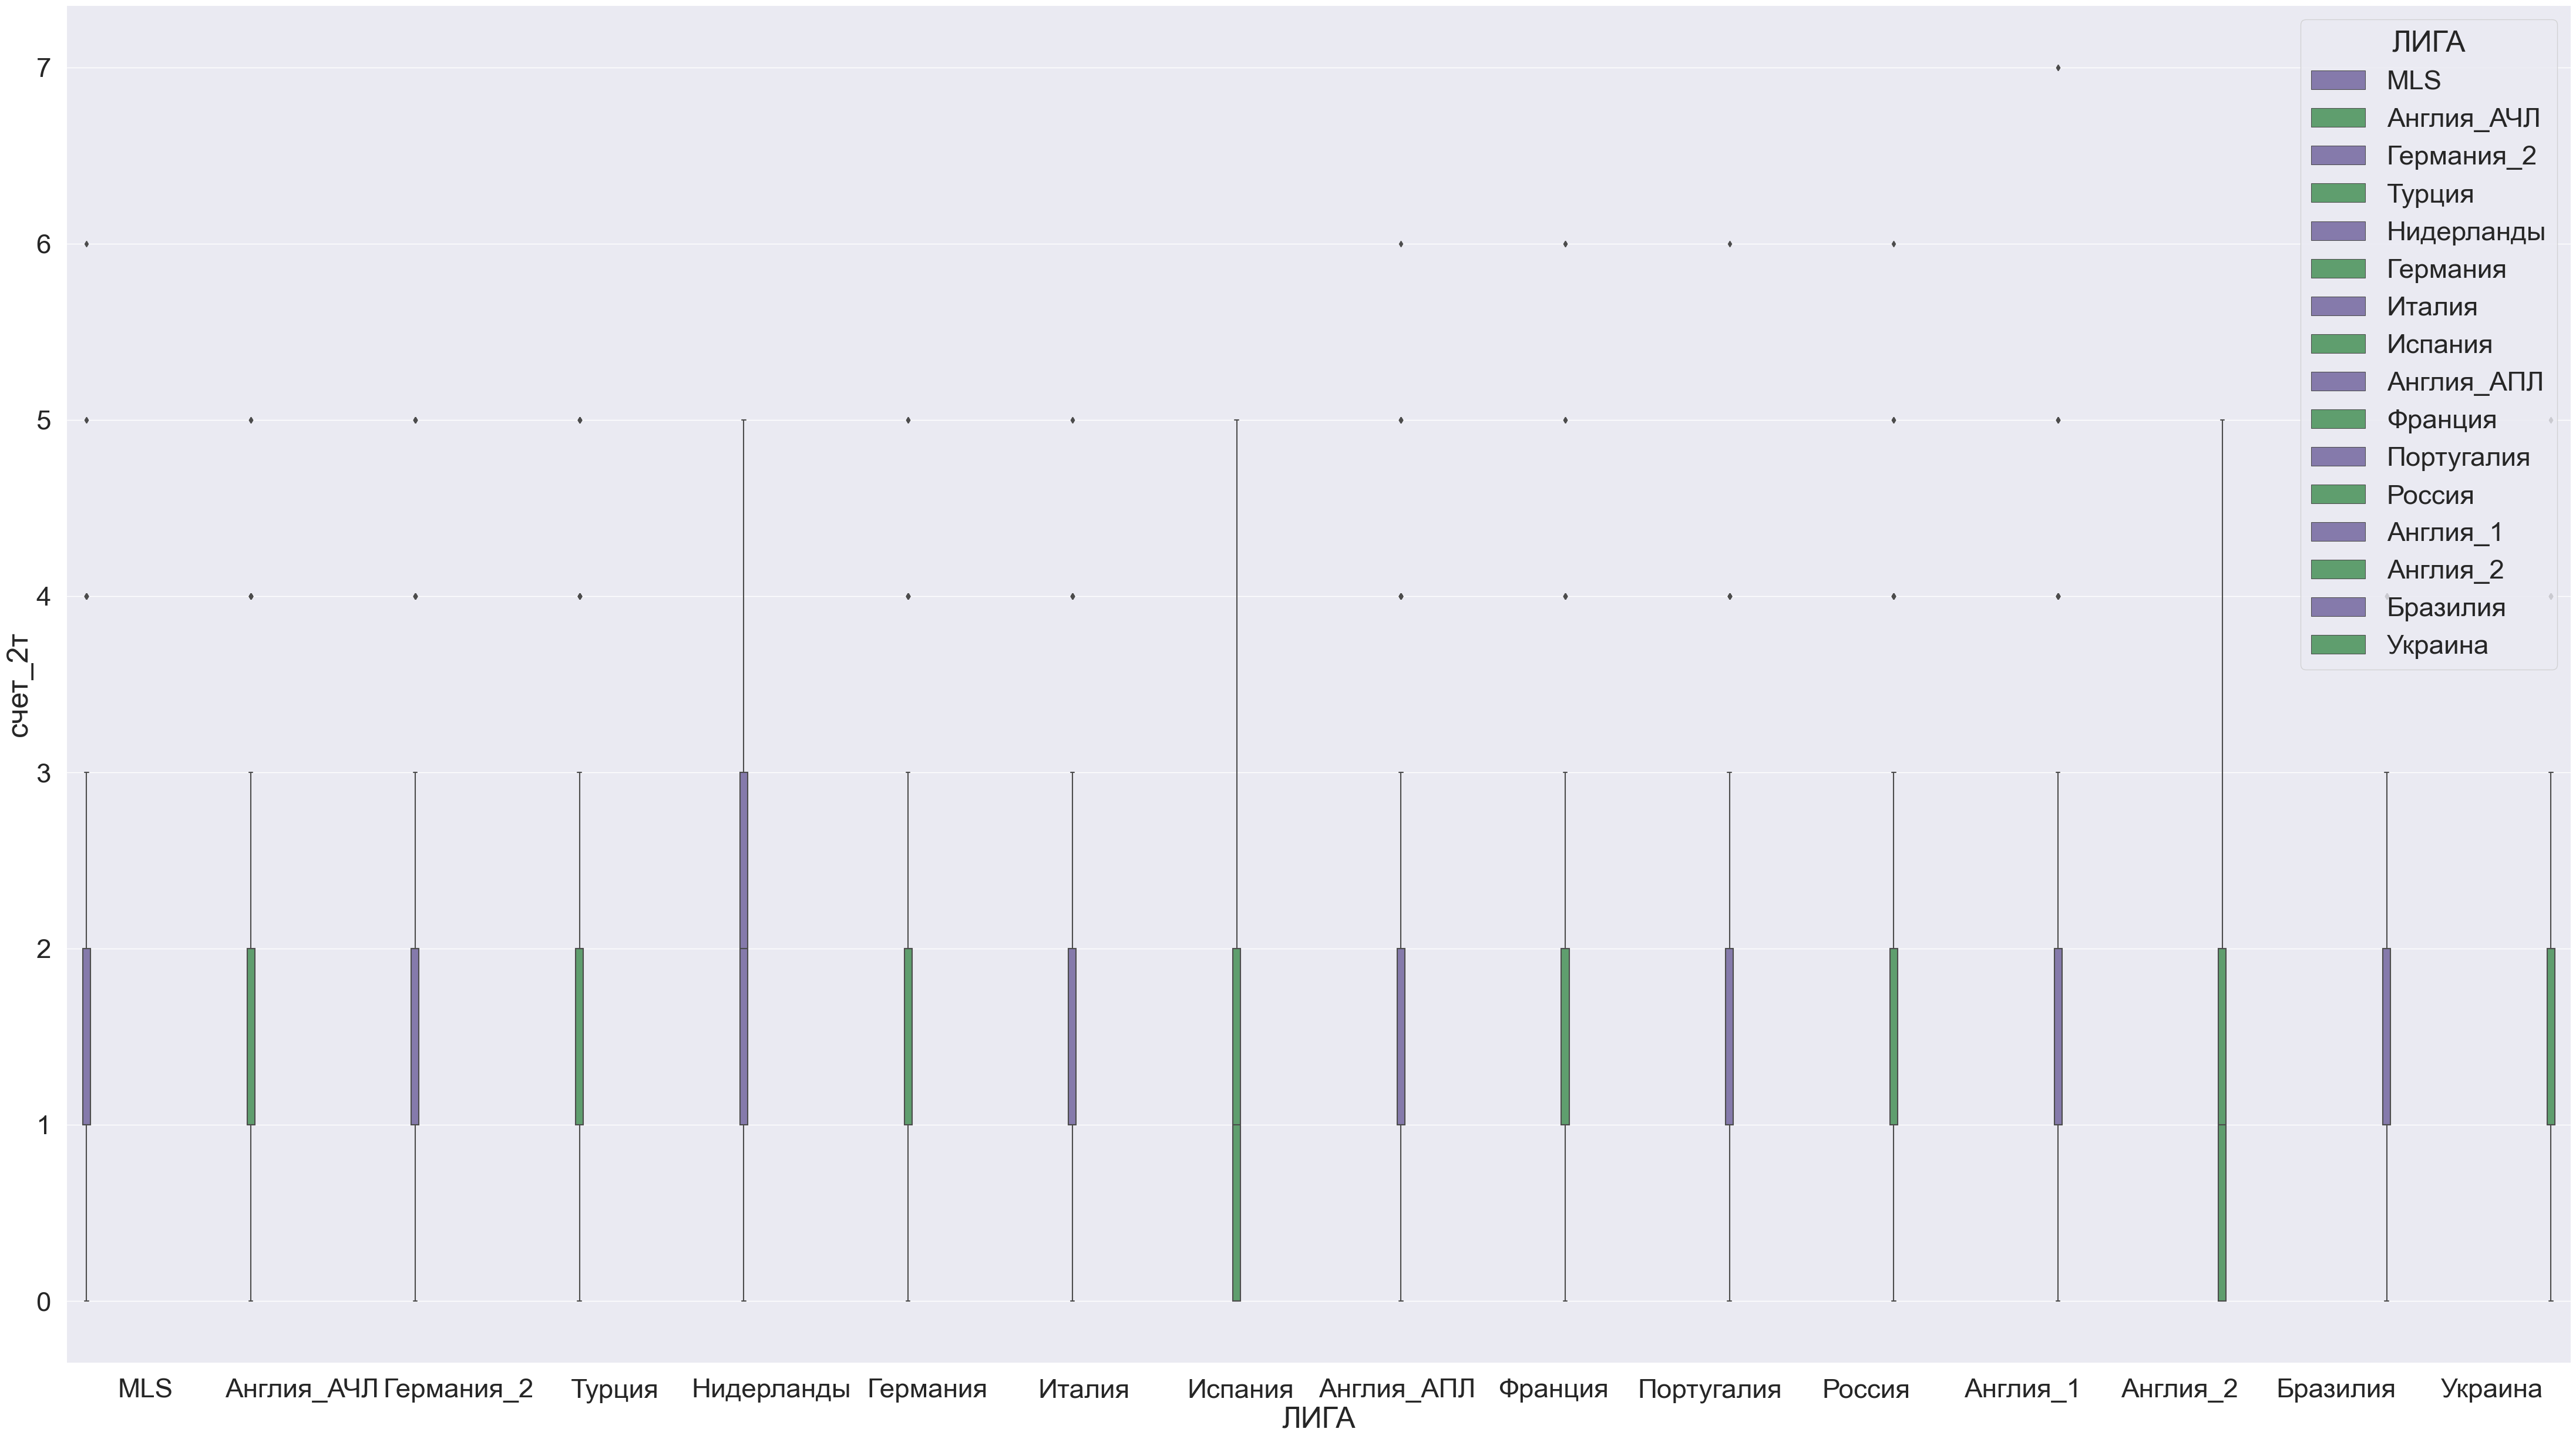

In [31]:
# boxplot голы во втором тайме
grafik_boxplot(data_top_1,'счет_2т')

Наблюдения голы во втором тайме: 

boxplot почти также малоинформативны для голов во втором тайме, как и для голов в первом.
потому что маленький диапозон значений.

**топ 1 голы за матч**  <a id='boxplot_4'></a>

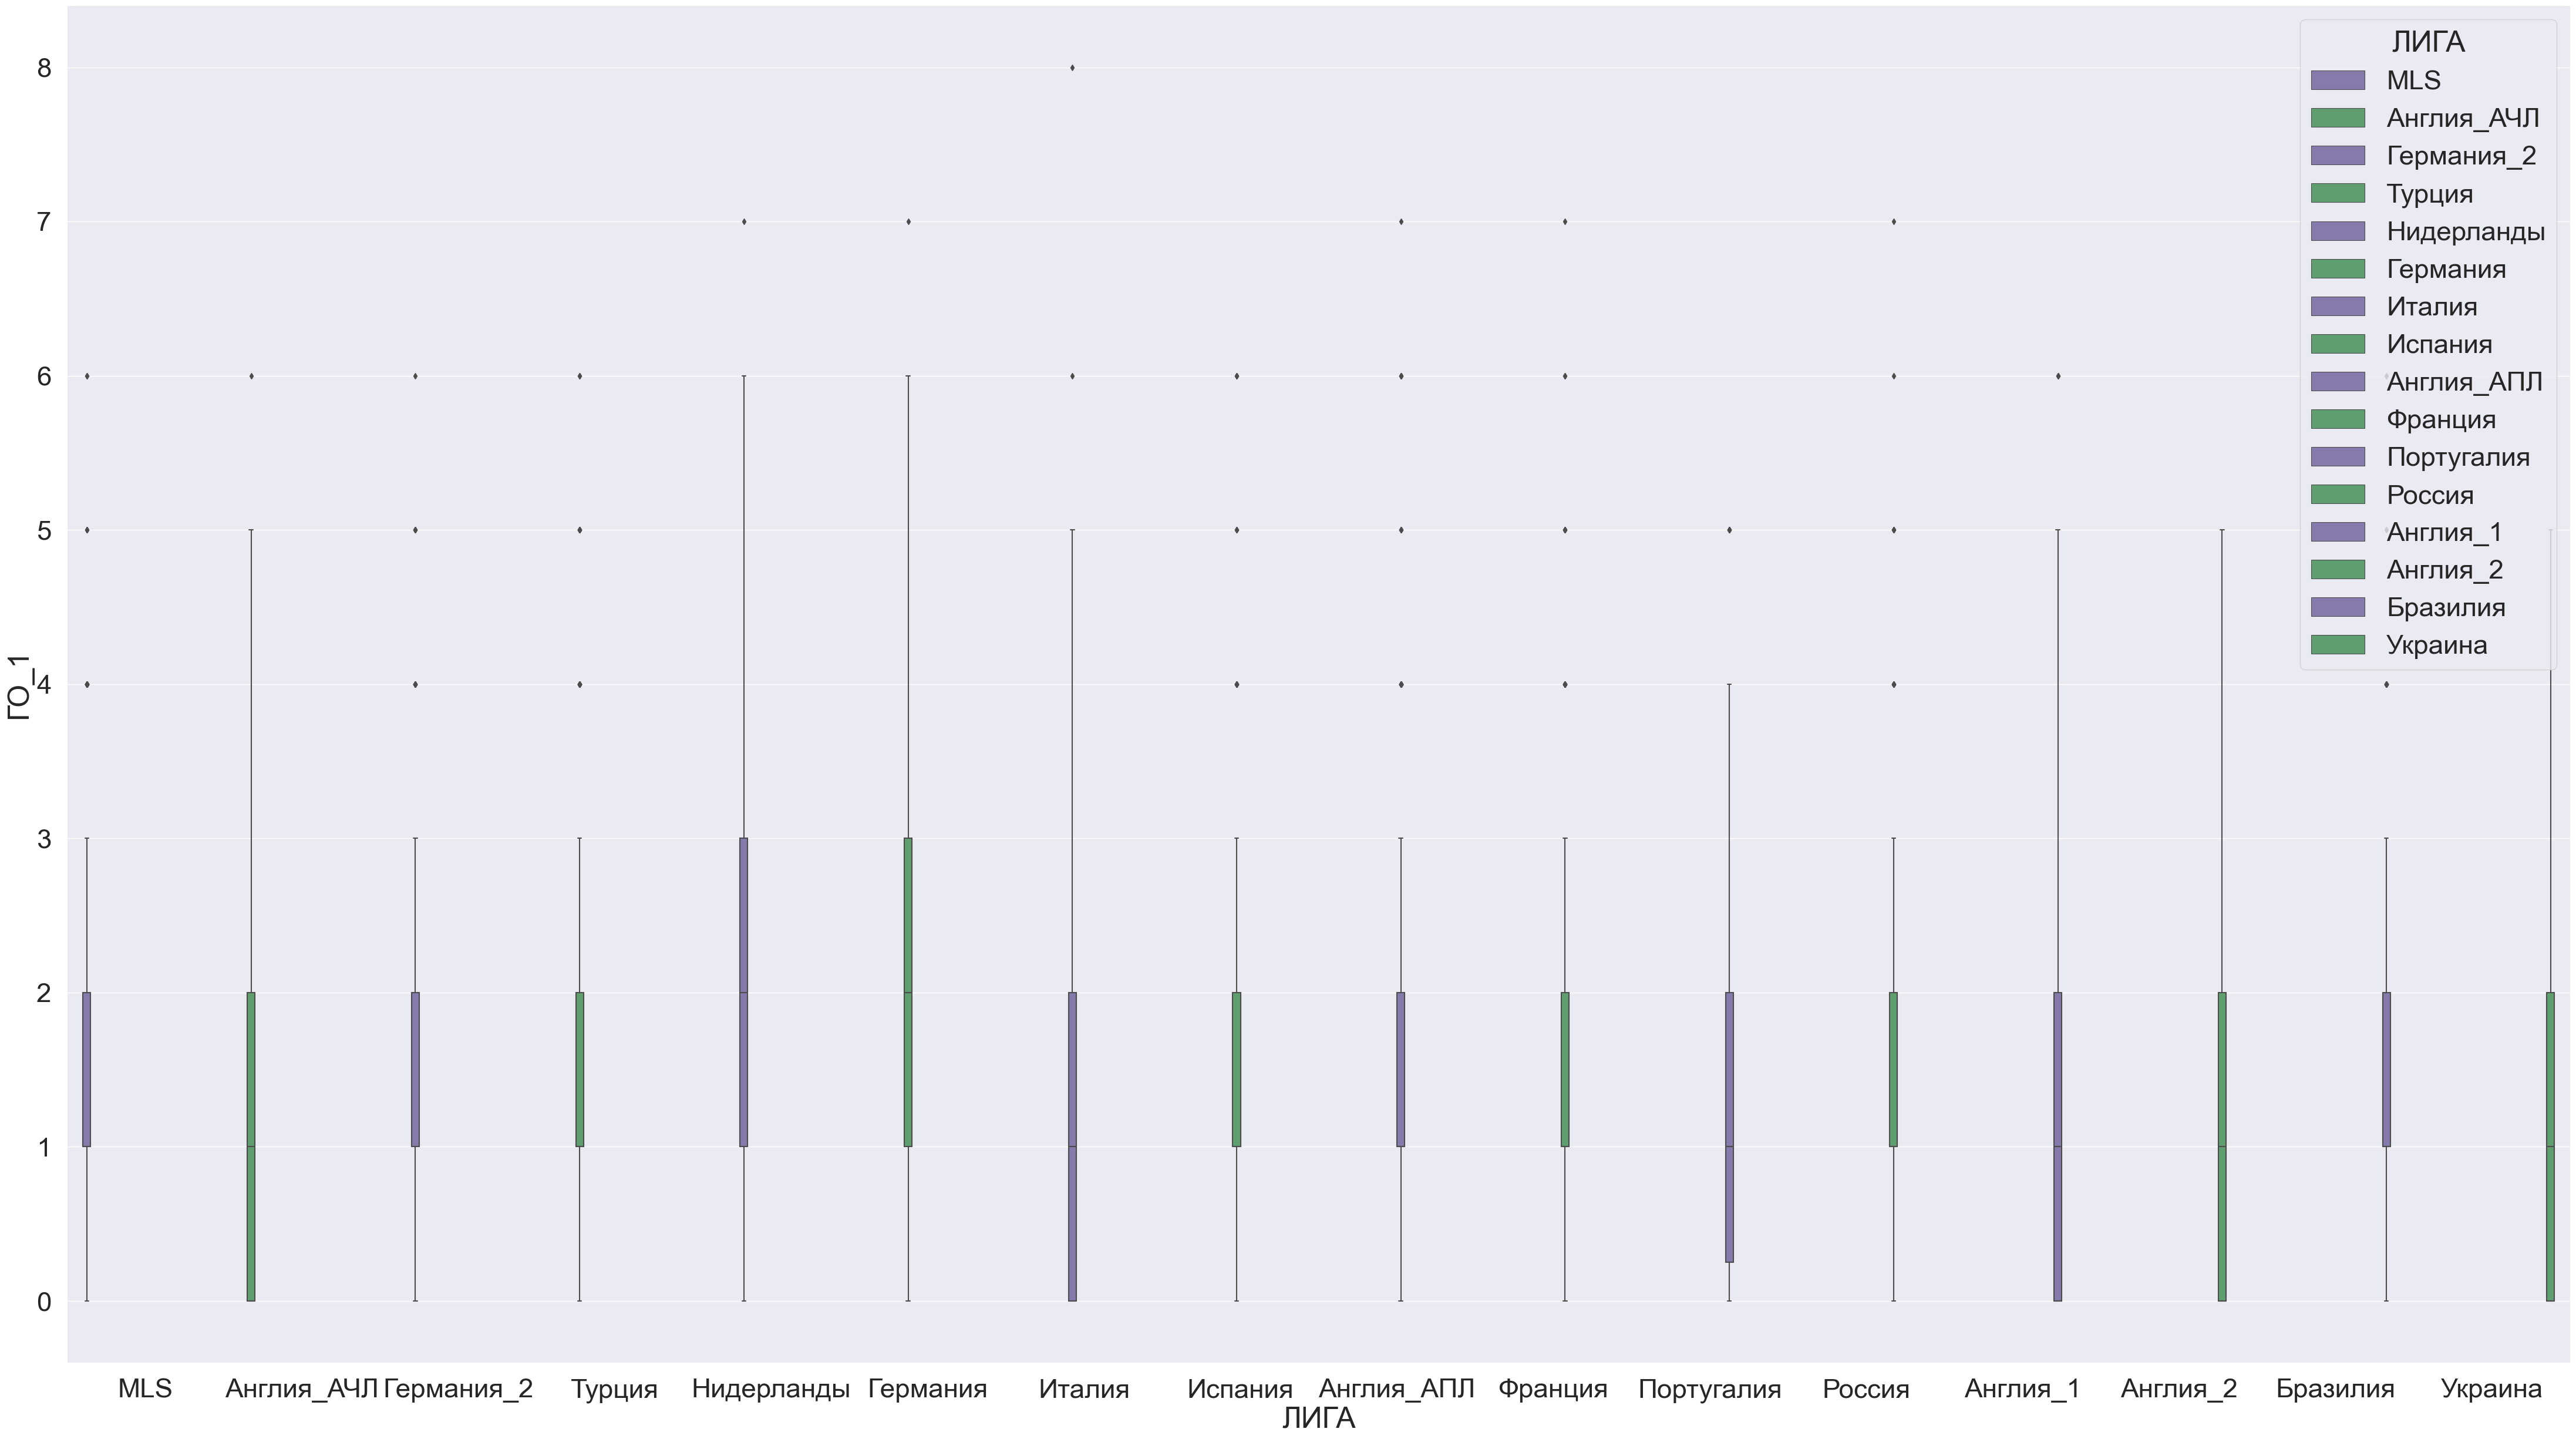

In [32]:
# boxplot голы хозяев за матч
grafik_boxplot(data_top_1,'ГО_1')

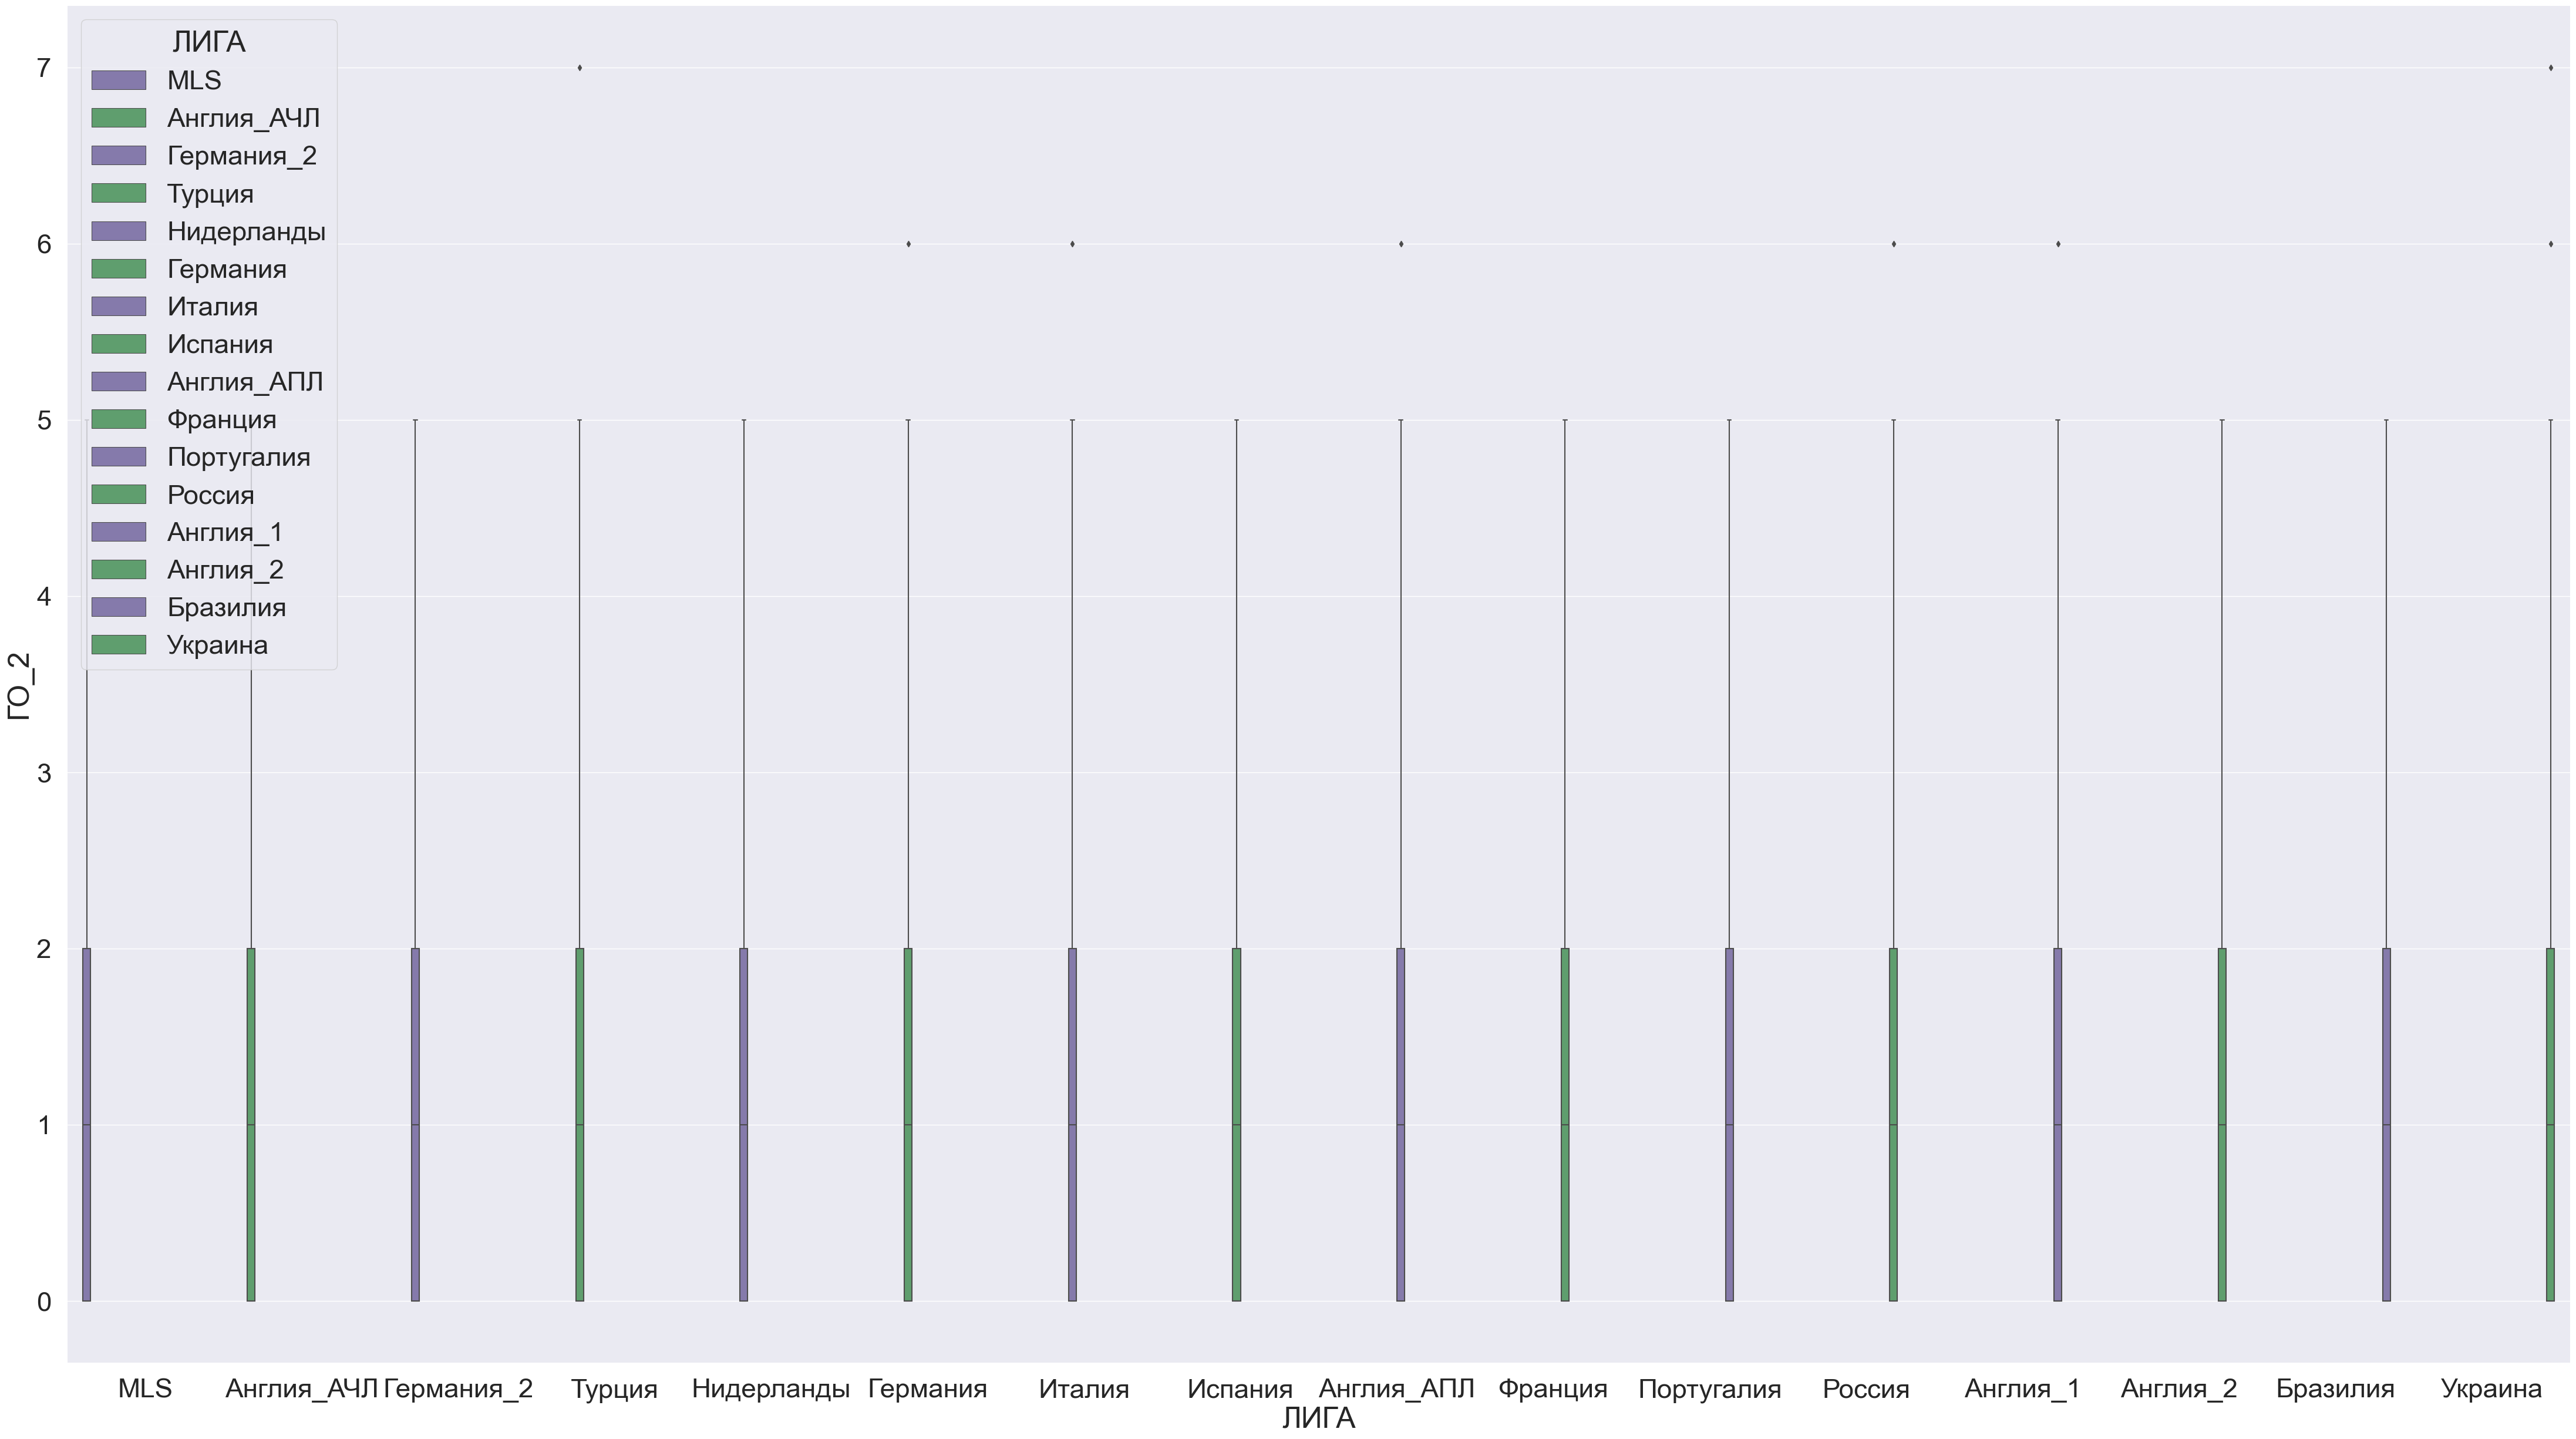

In [33]:
# boxplot голы гостей за матч
grafik_boxplot(data_top_1,'ГО_2')

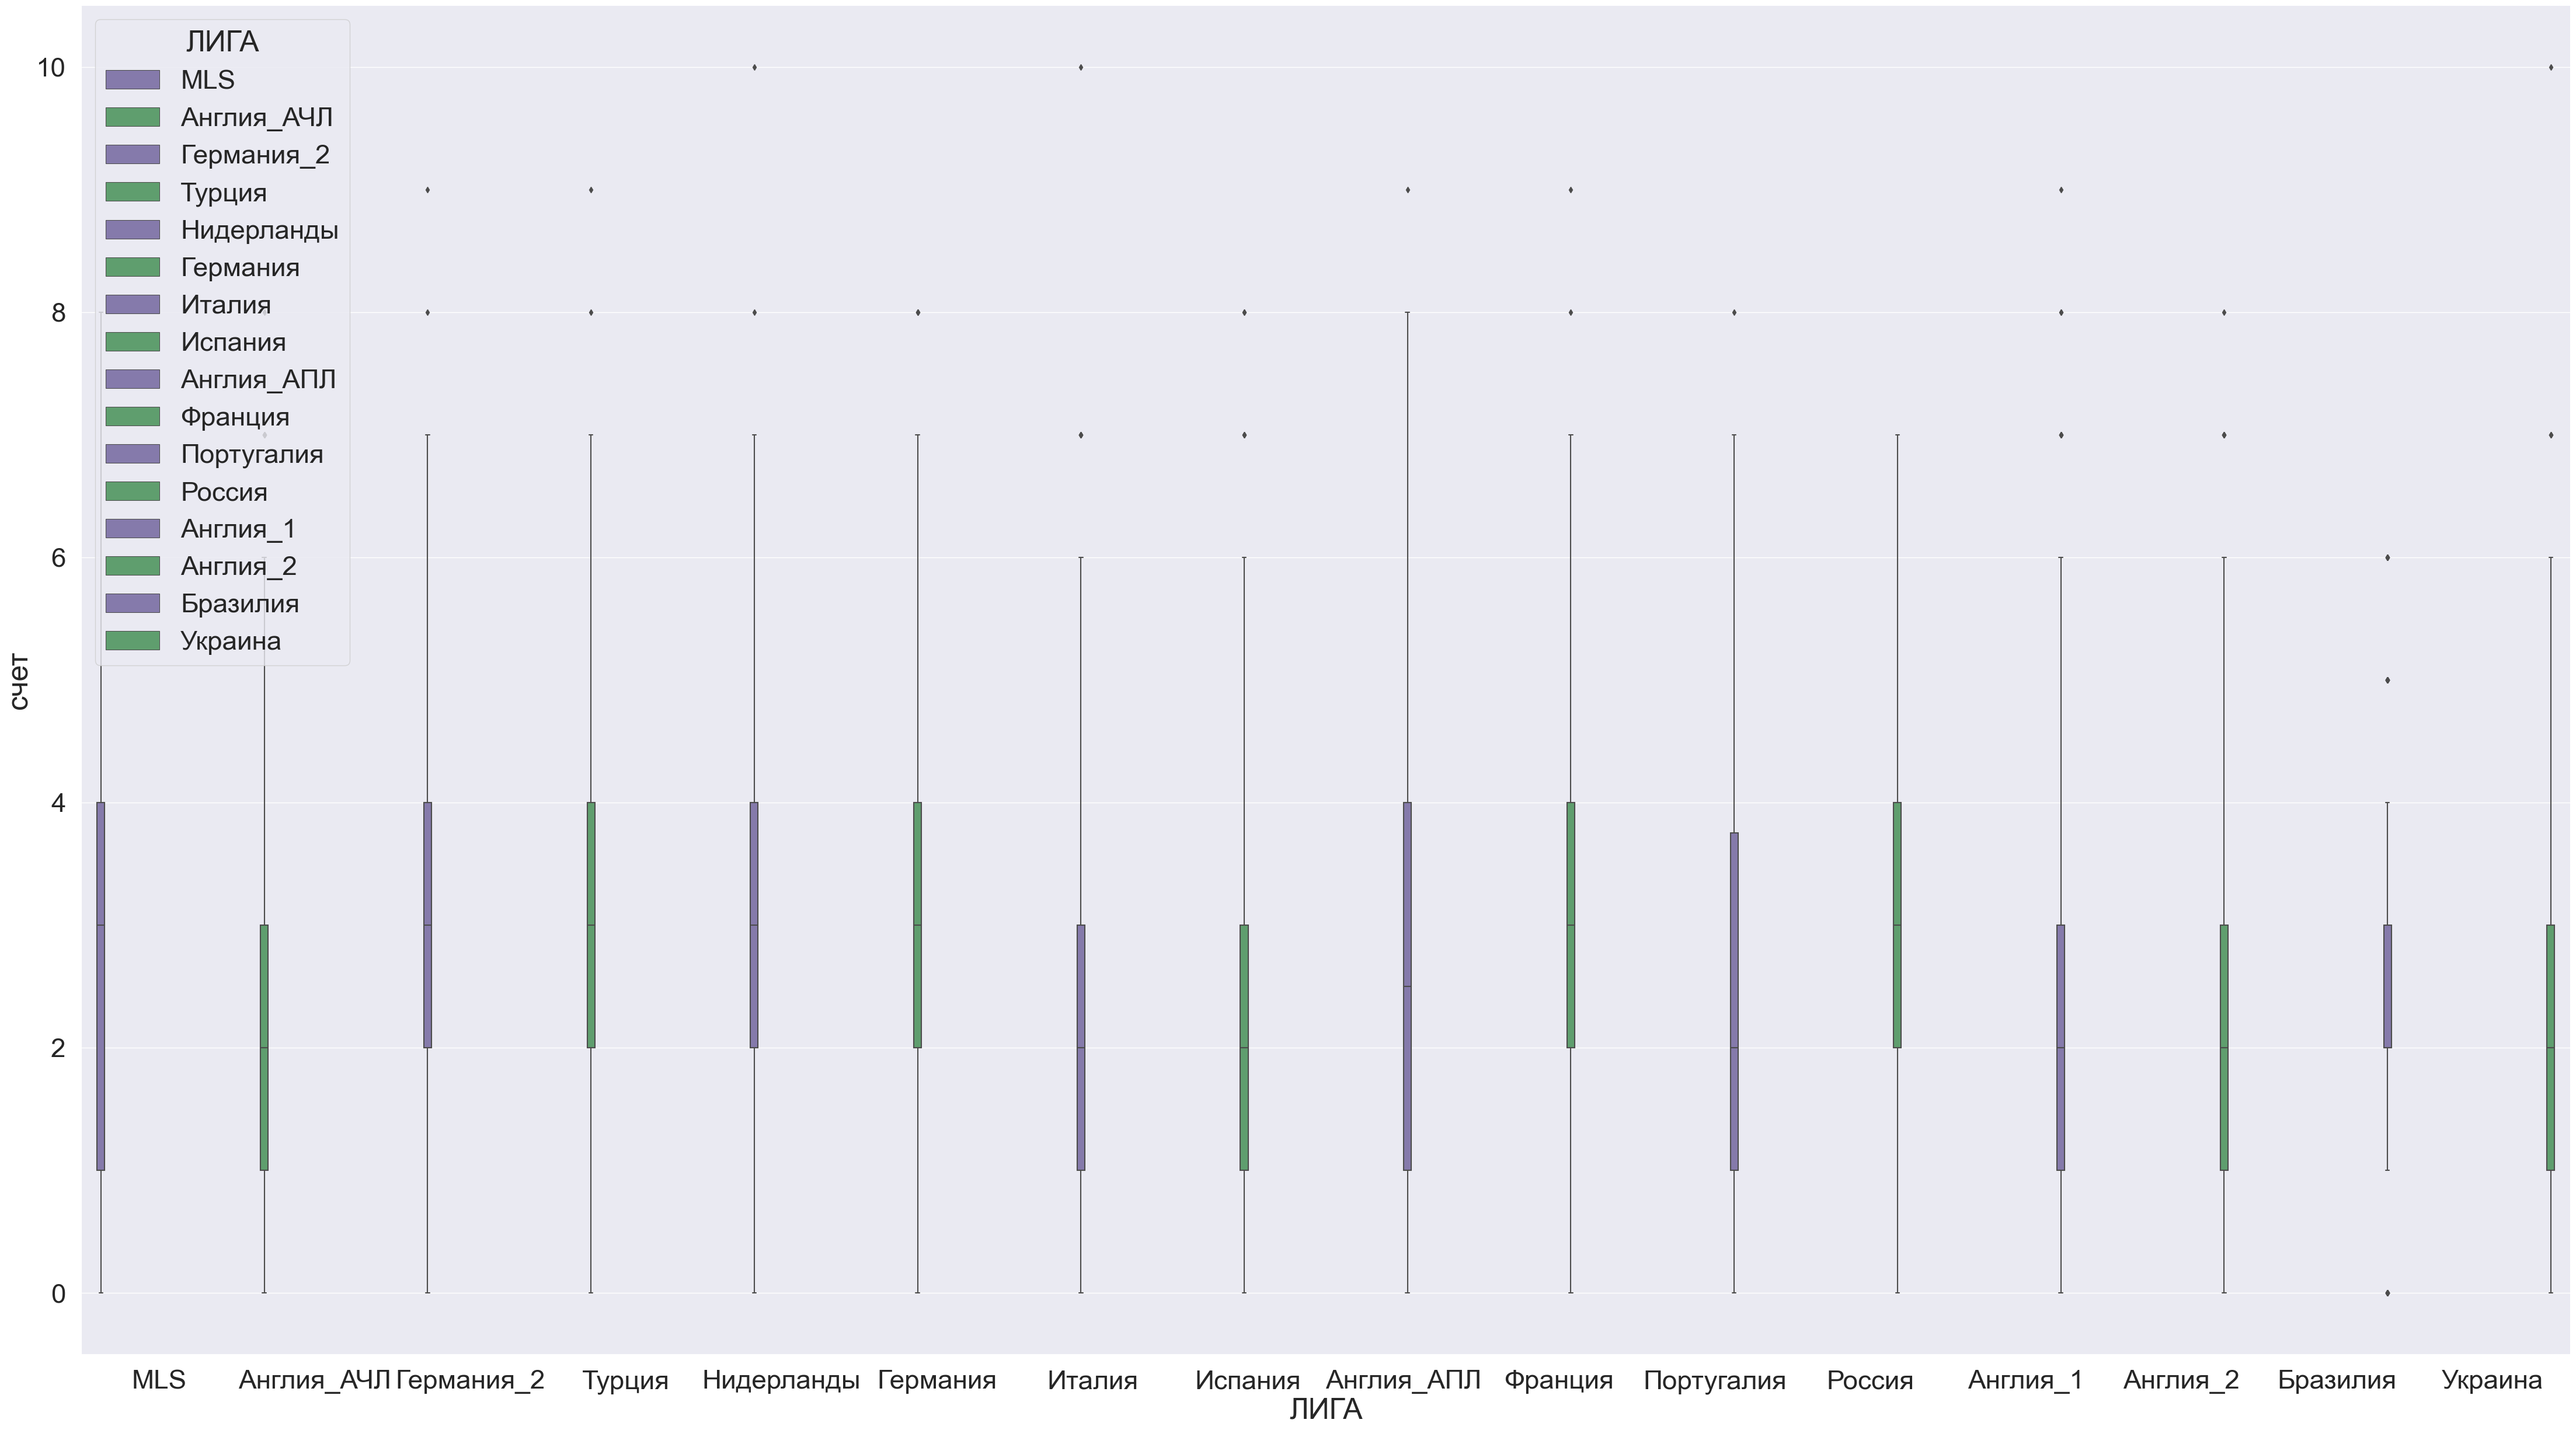

In [34]:
# boxplot голы за матч
grafik_boxplot(data_top_1,'счет')

Наблюдения голы за матч: 

* Отдельно голы хозяев и гостей по прежнему малоинформативны(как и графики выше). А вот голы вместе уже немного различны:
* Бразилия размах составляет всего 1 гол! и даже с усами всего 3 гола!

**топ 1 угловые**  <a id='boxplot_5'></a>

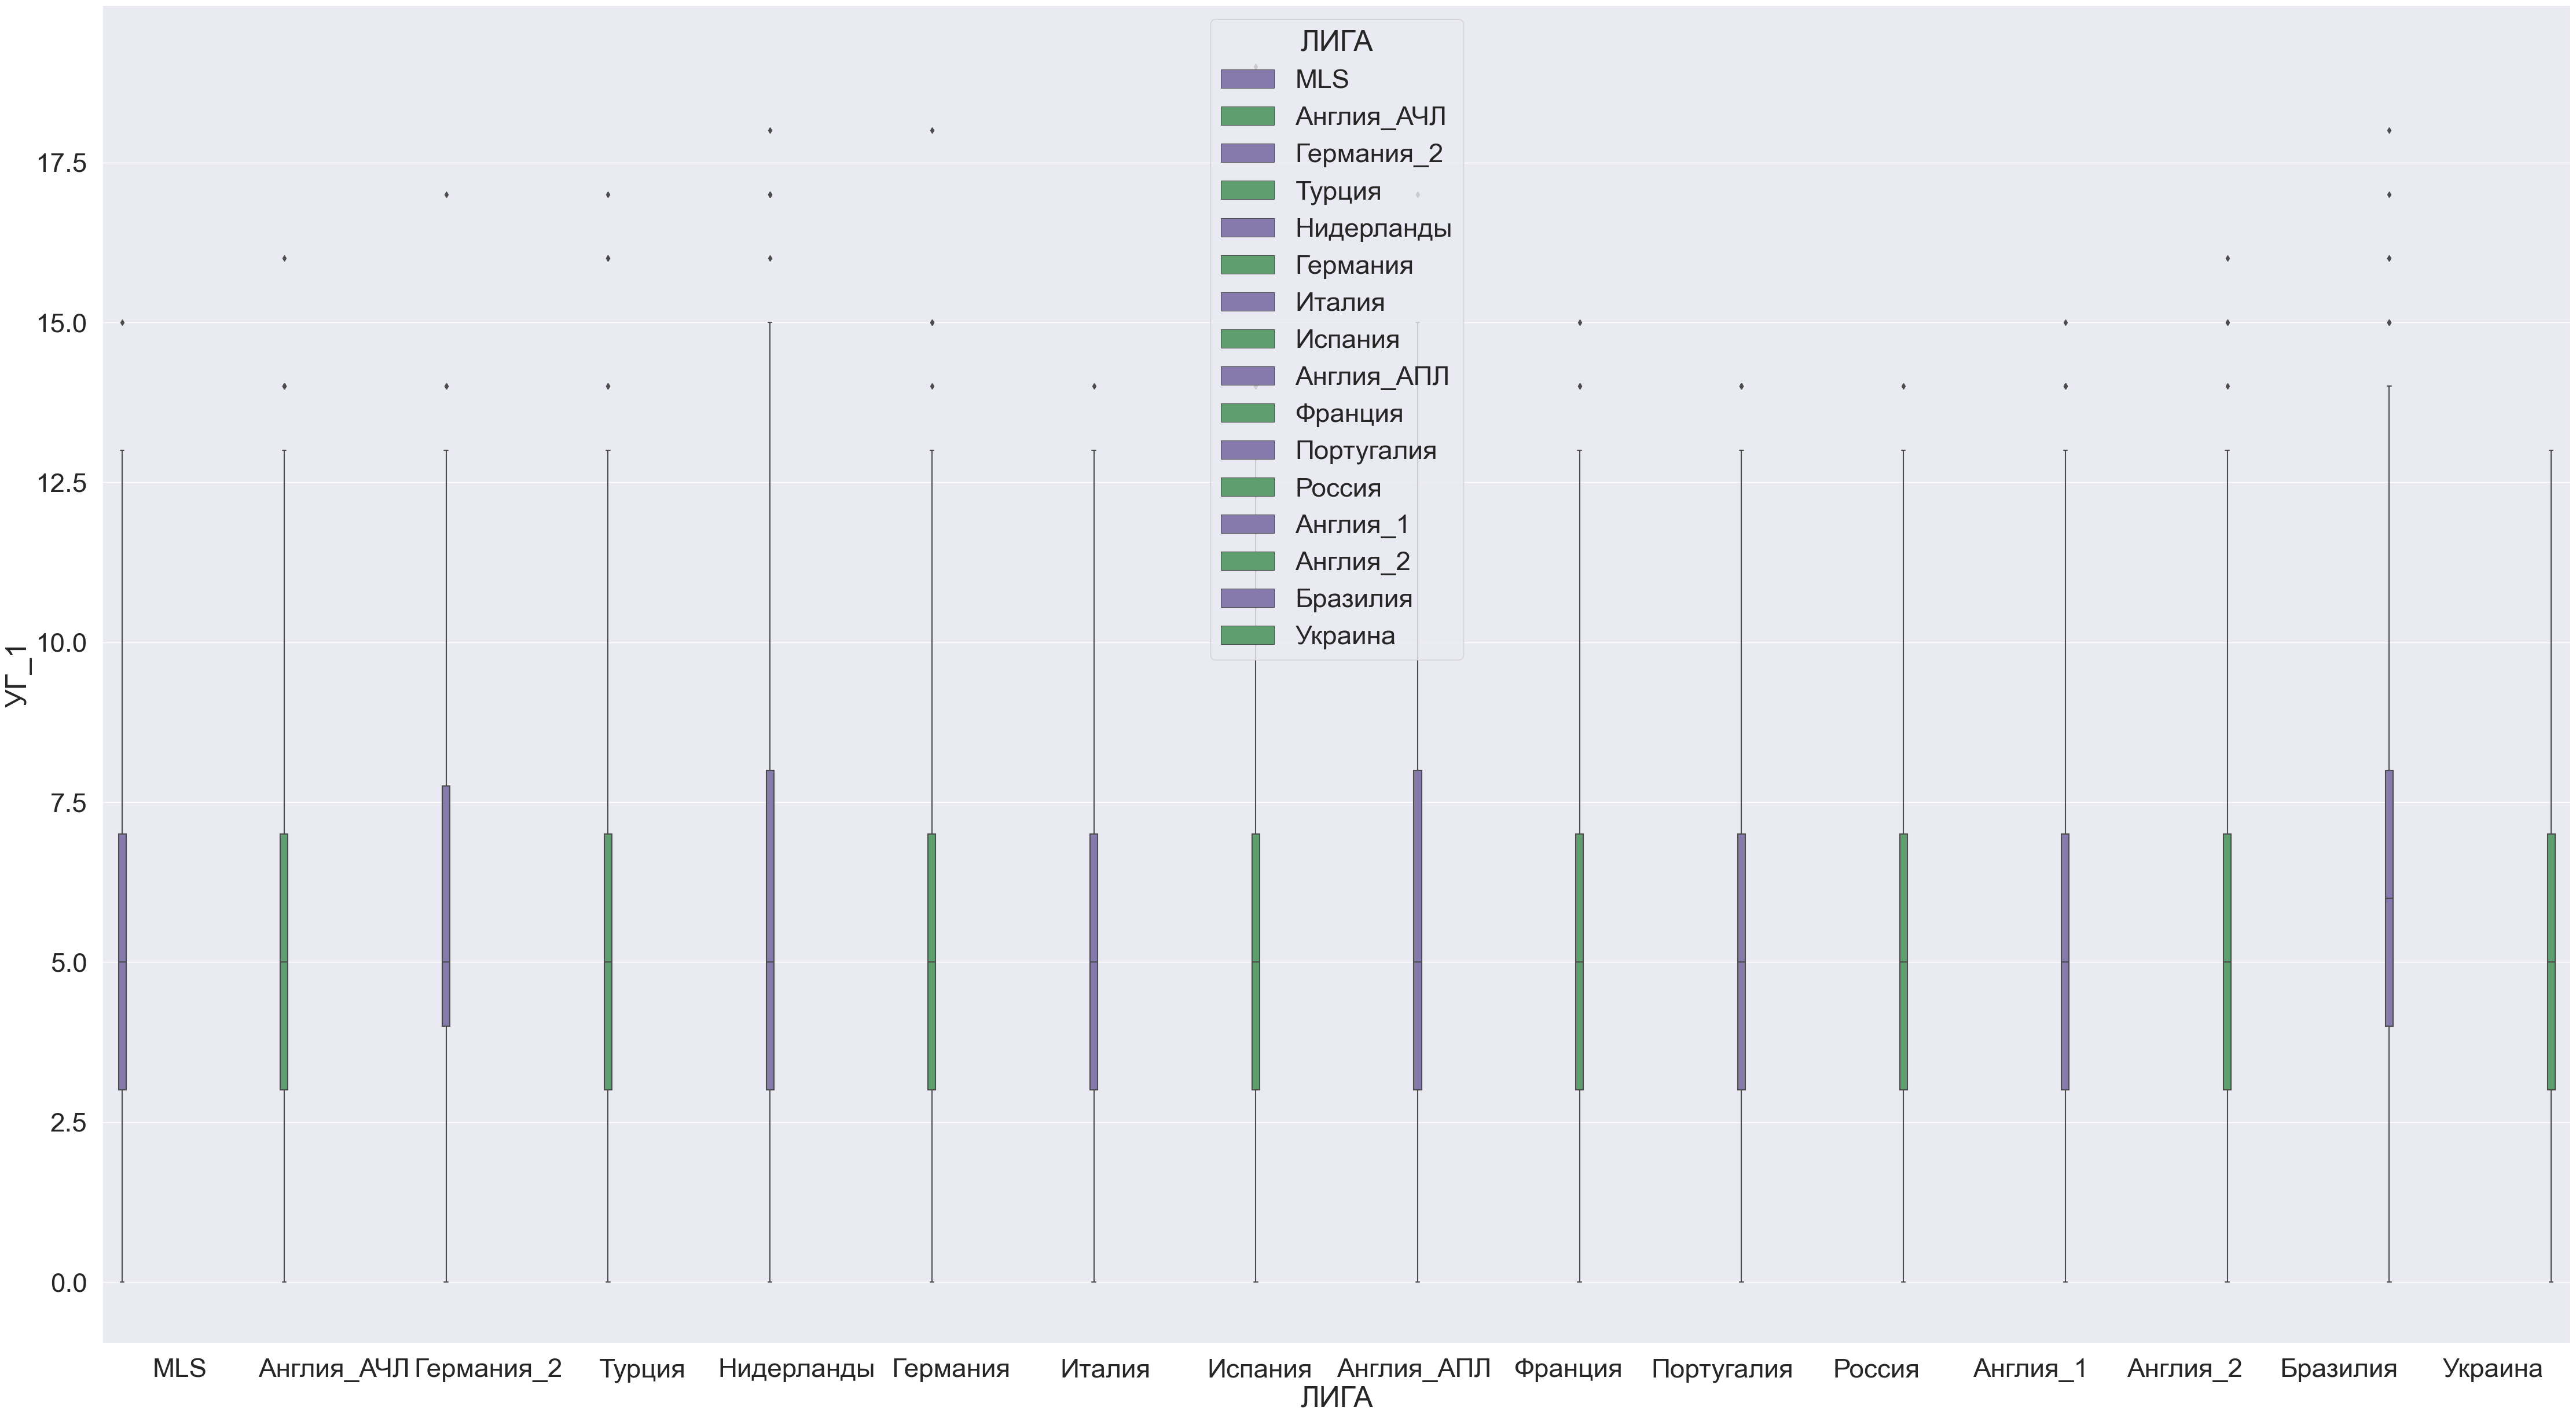

In [35]:
# boxplot угловые хозяева
grafik_boxplot(data_top_1,'УГ_1')

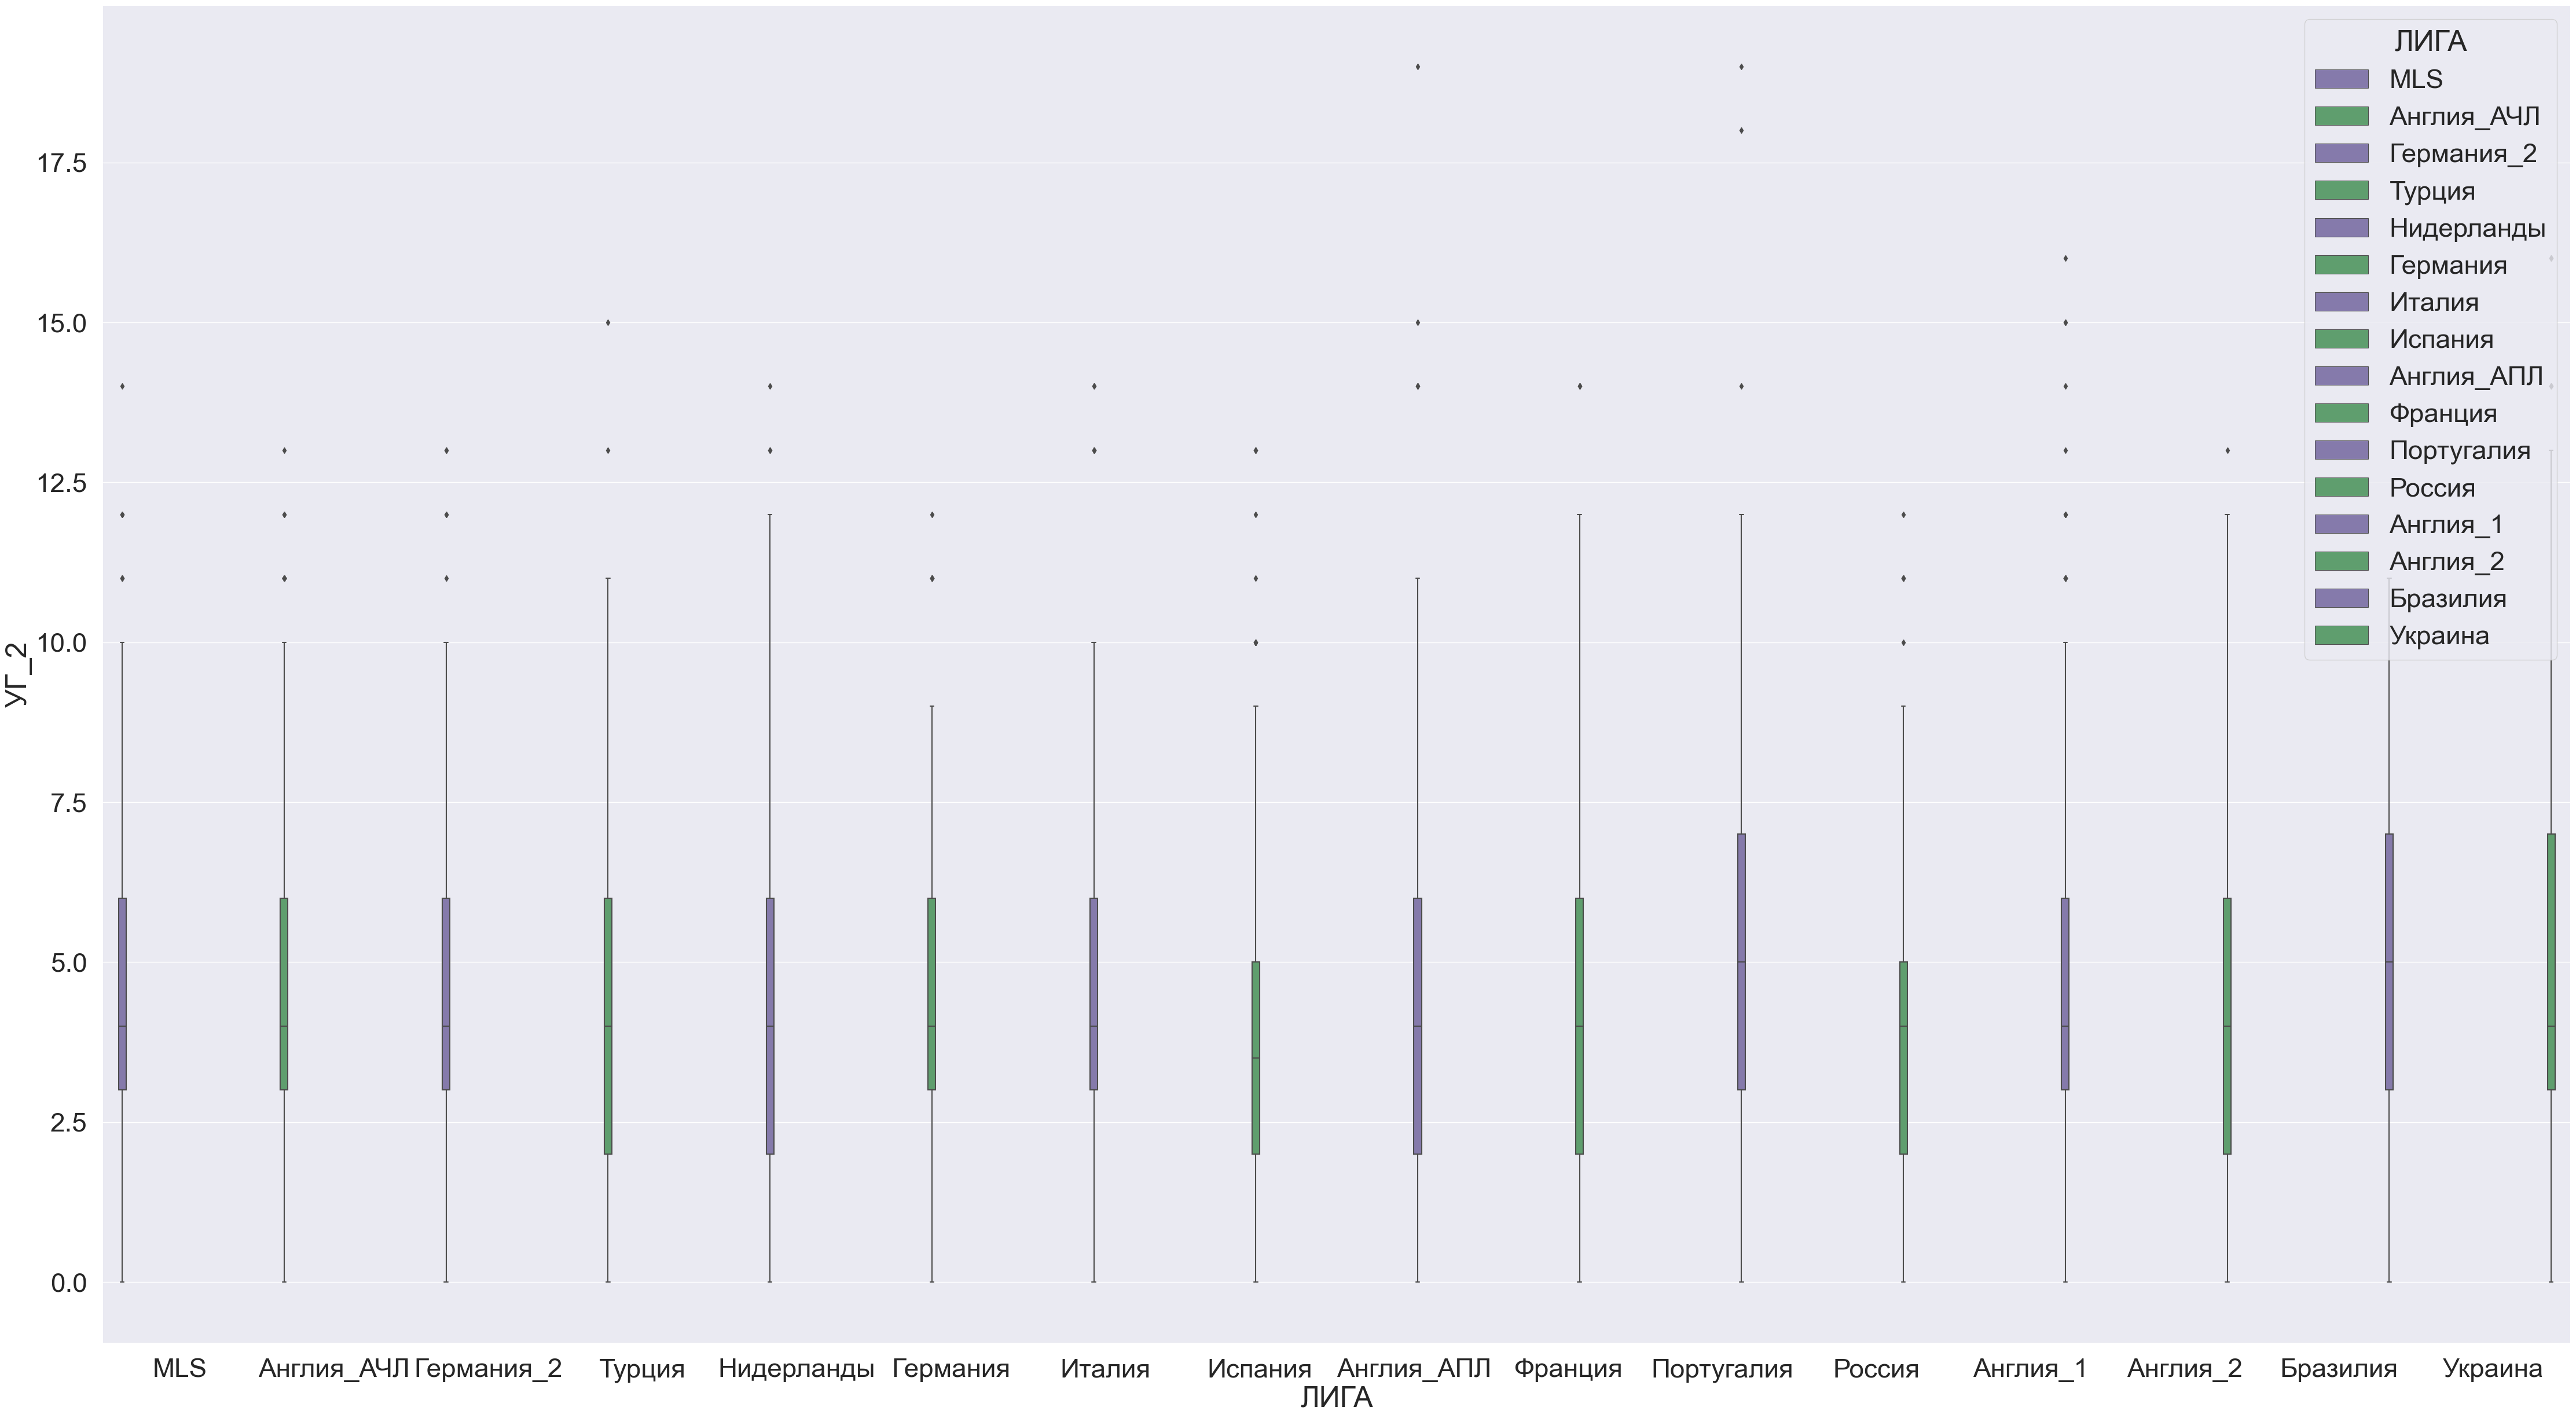

In [36]:
# boxplot угловые гостей
grafik_boxplot(data_top_1,'УГ_2')

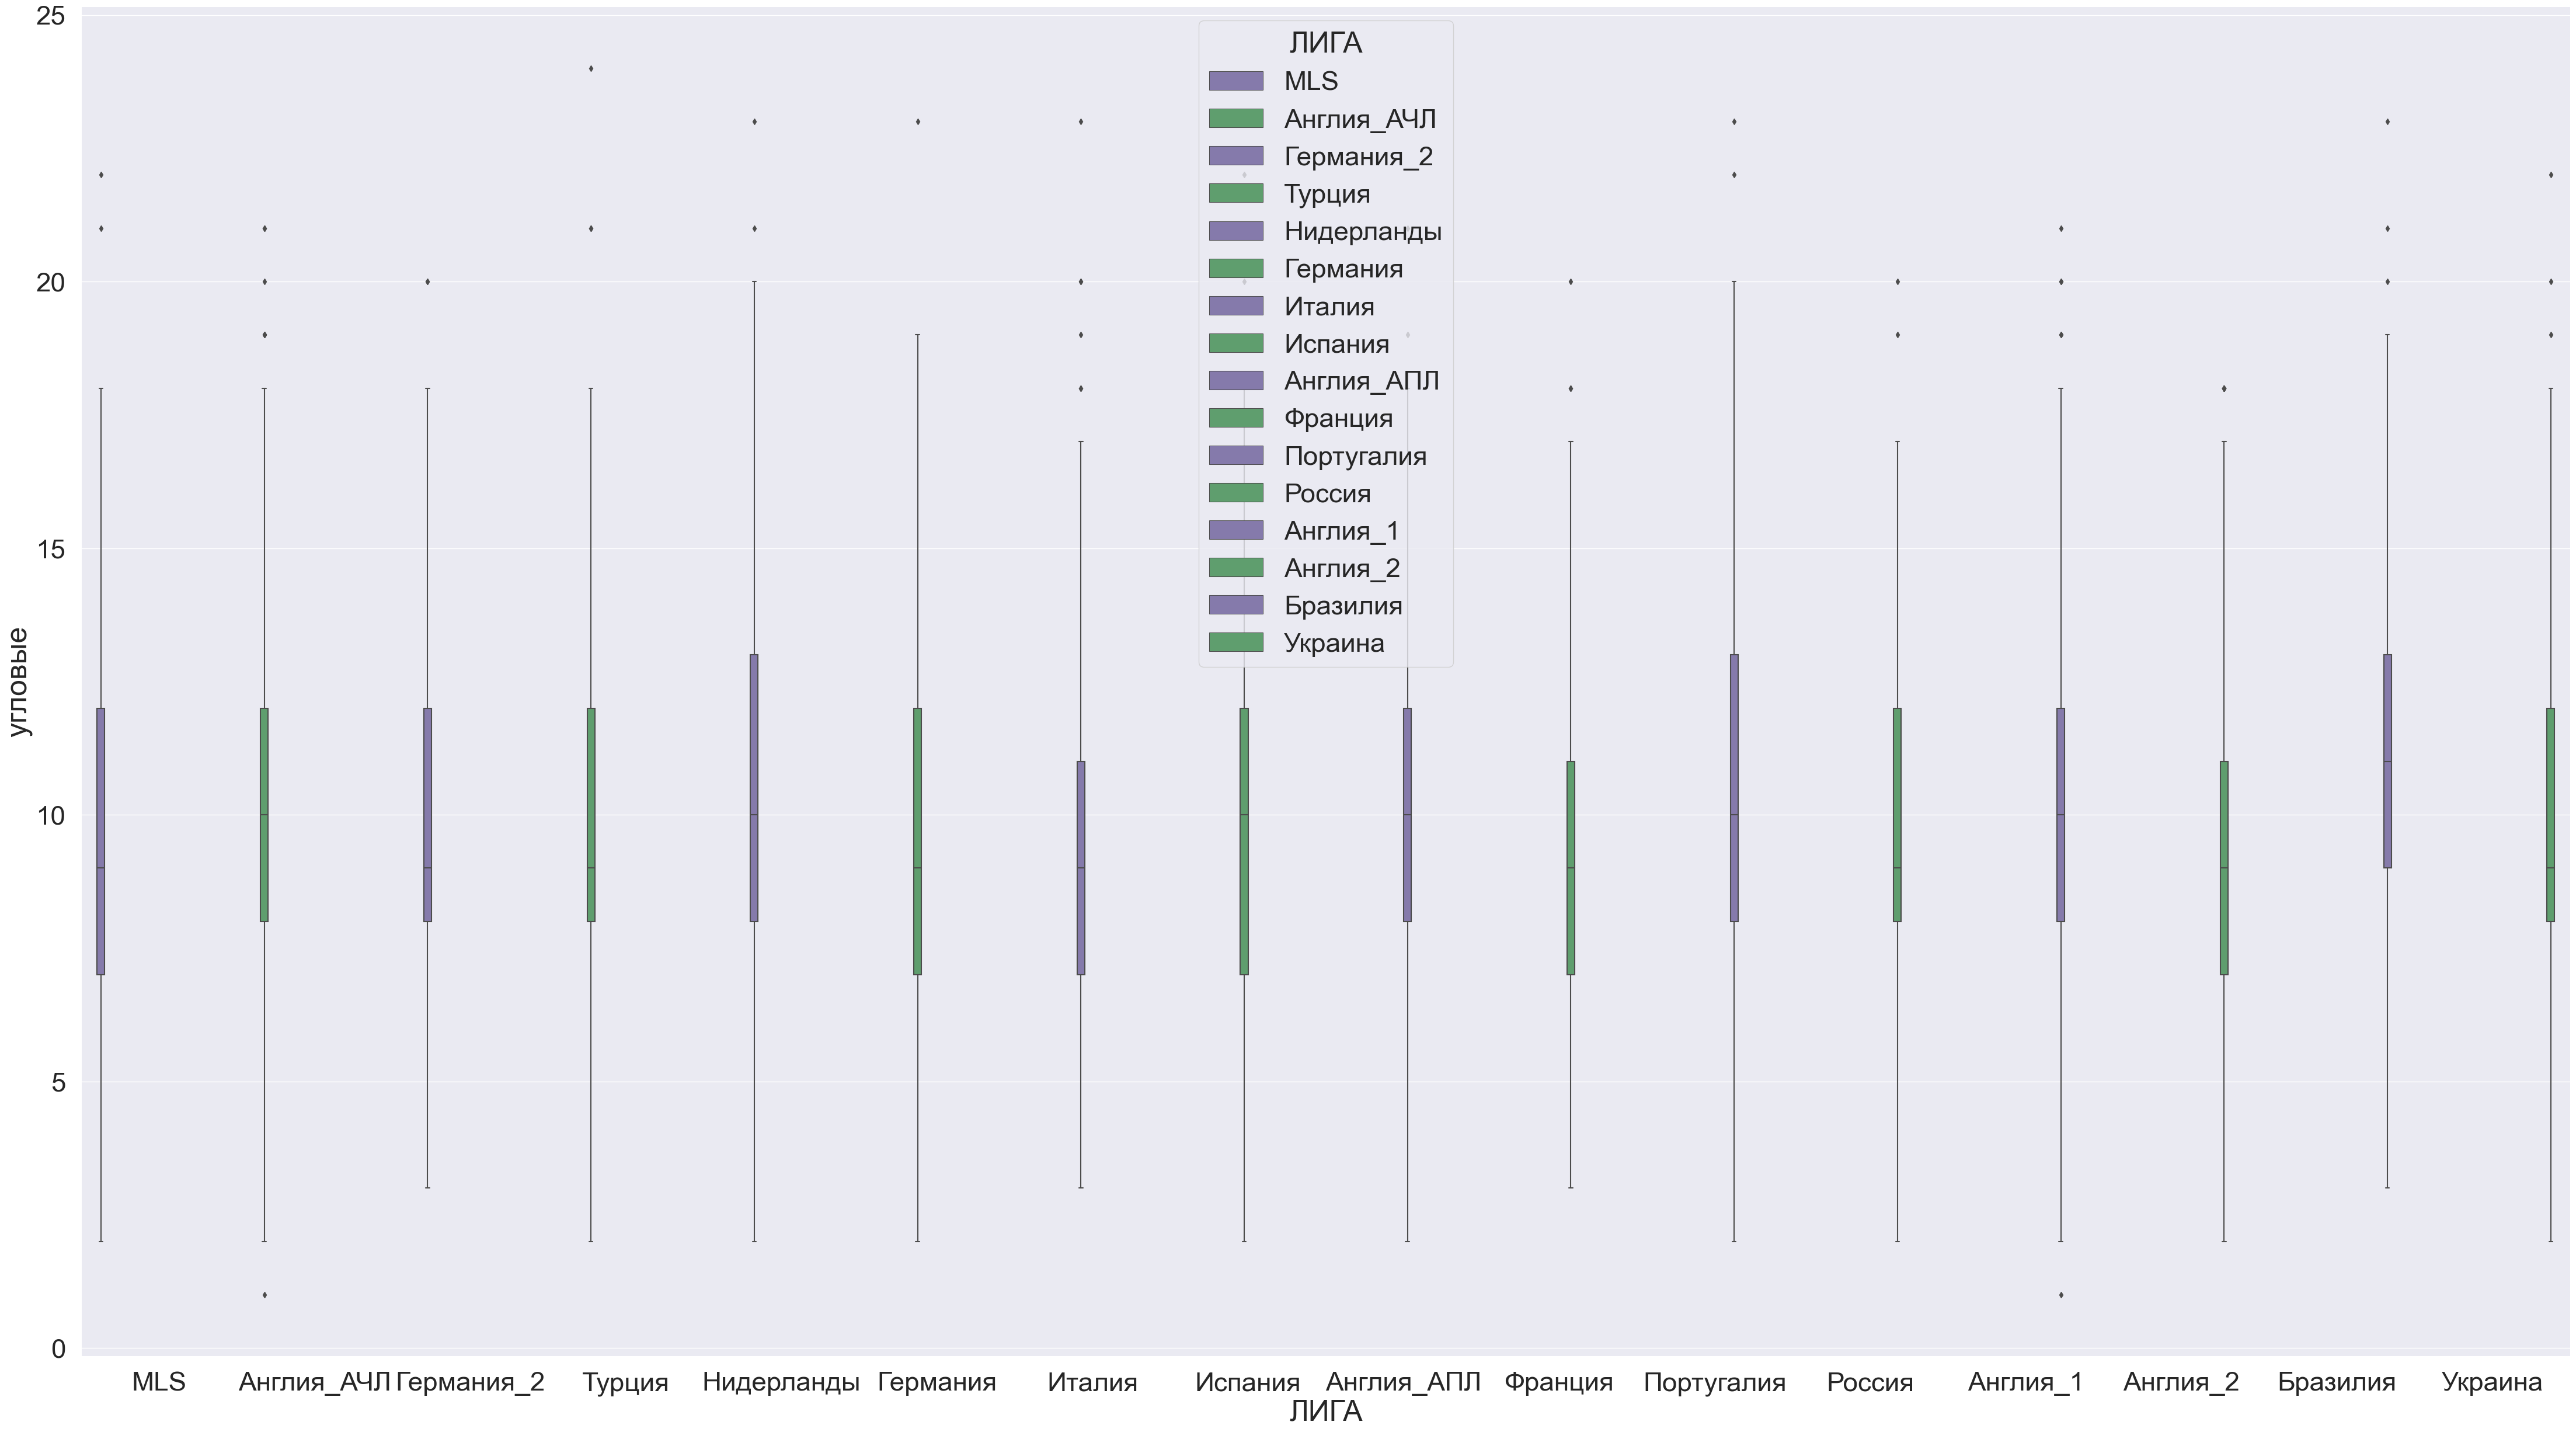

In [37]:
# boxplot угловые 
grafik_boxplot(data_top_1,'угловые')

Наблюдения угловые: 

* Очень удивили угловые хозяев своей сильной схожестью! 
* Интересное наблюдение ящиков угловых гостей, они более разнообразны чем общие угловые за матч! Немотря на то, что их числовой диапозон меньше процентов на 30!

**топ 1 желтые**  <a id='boxplot_6'></a>

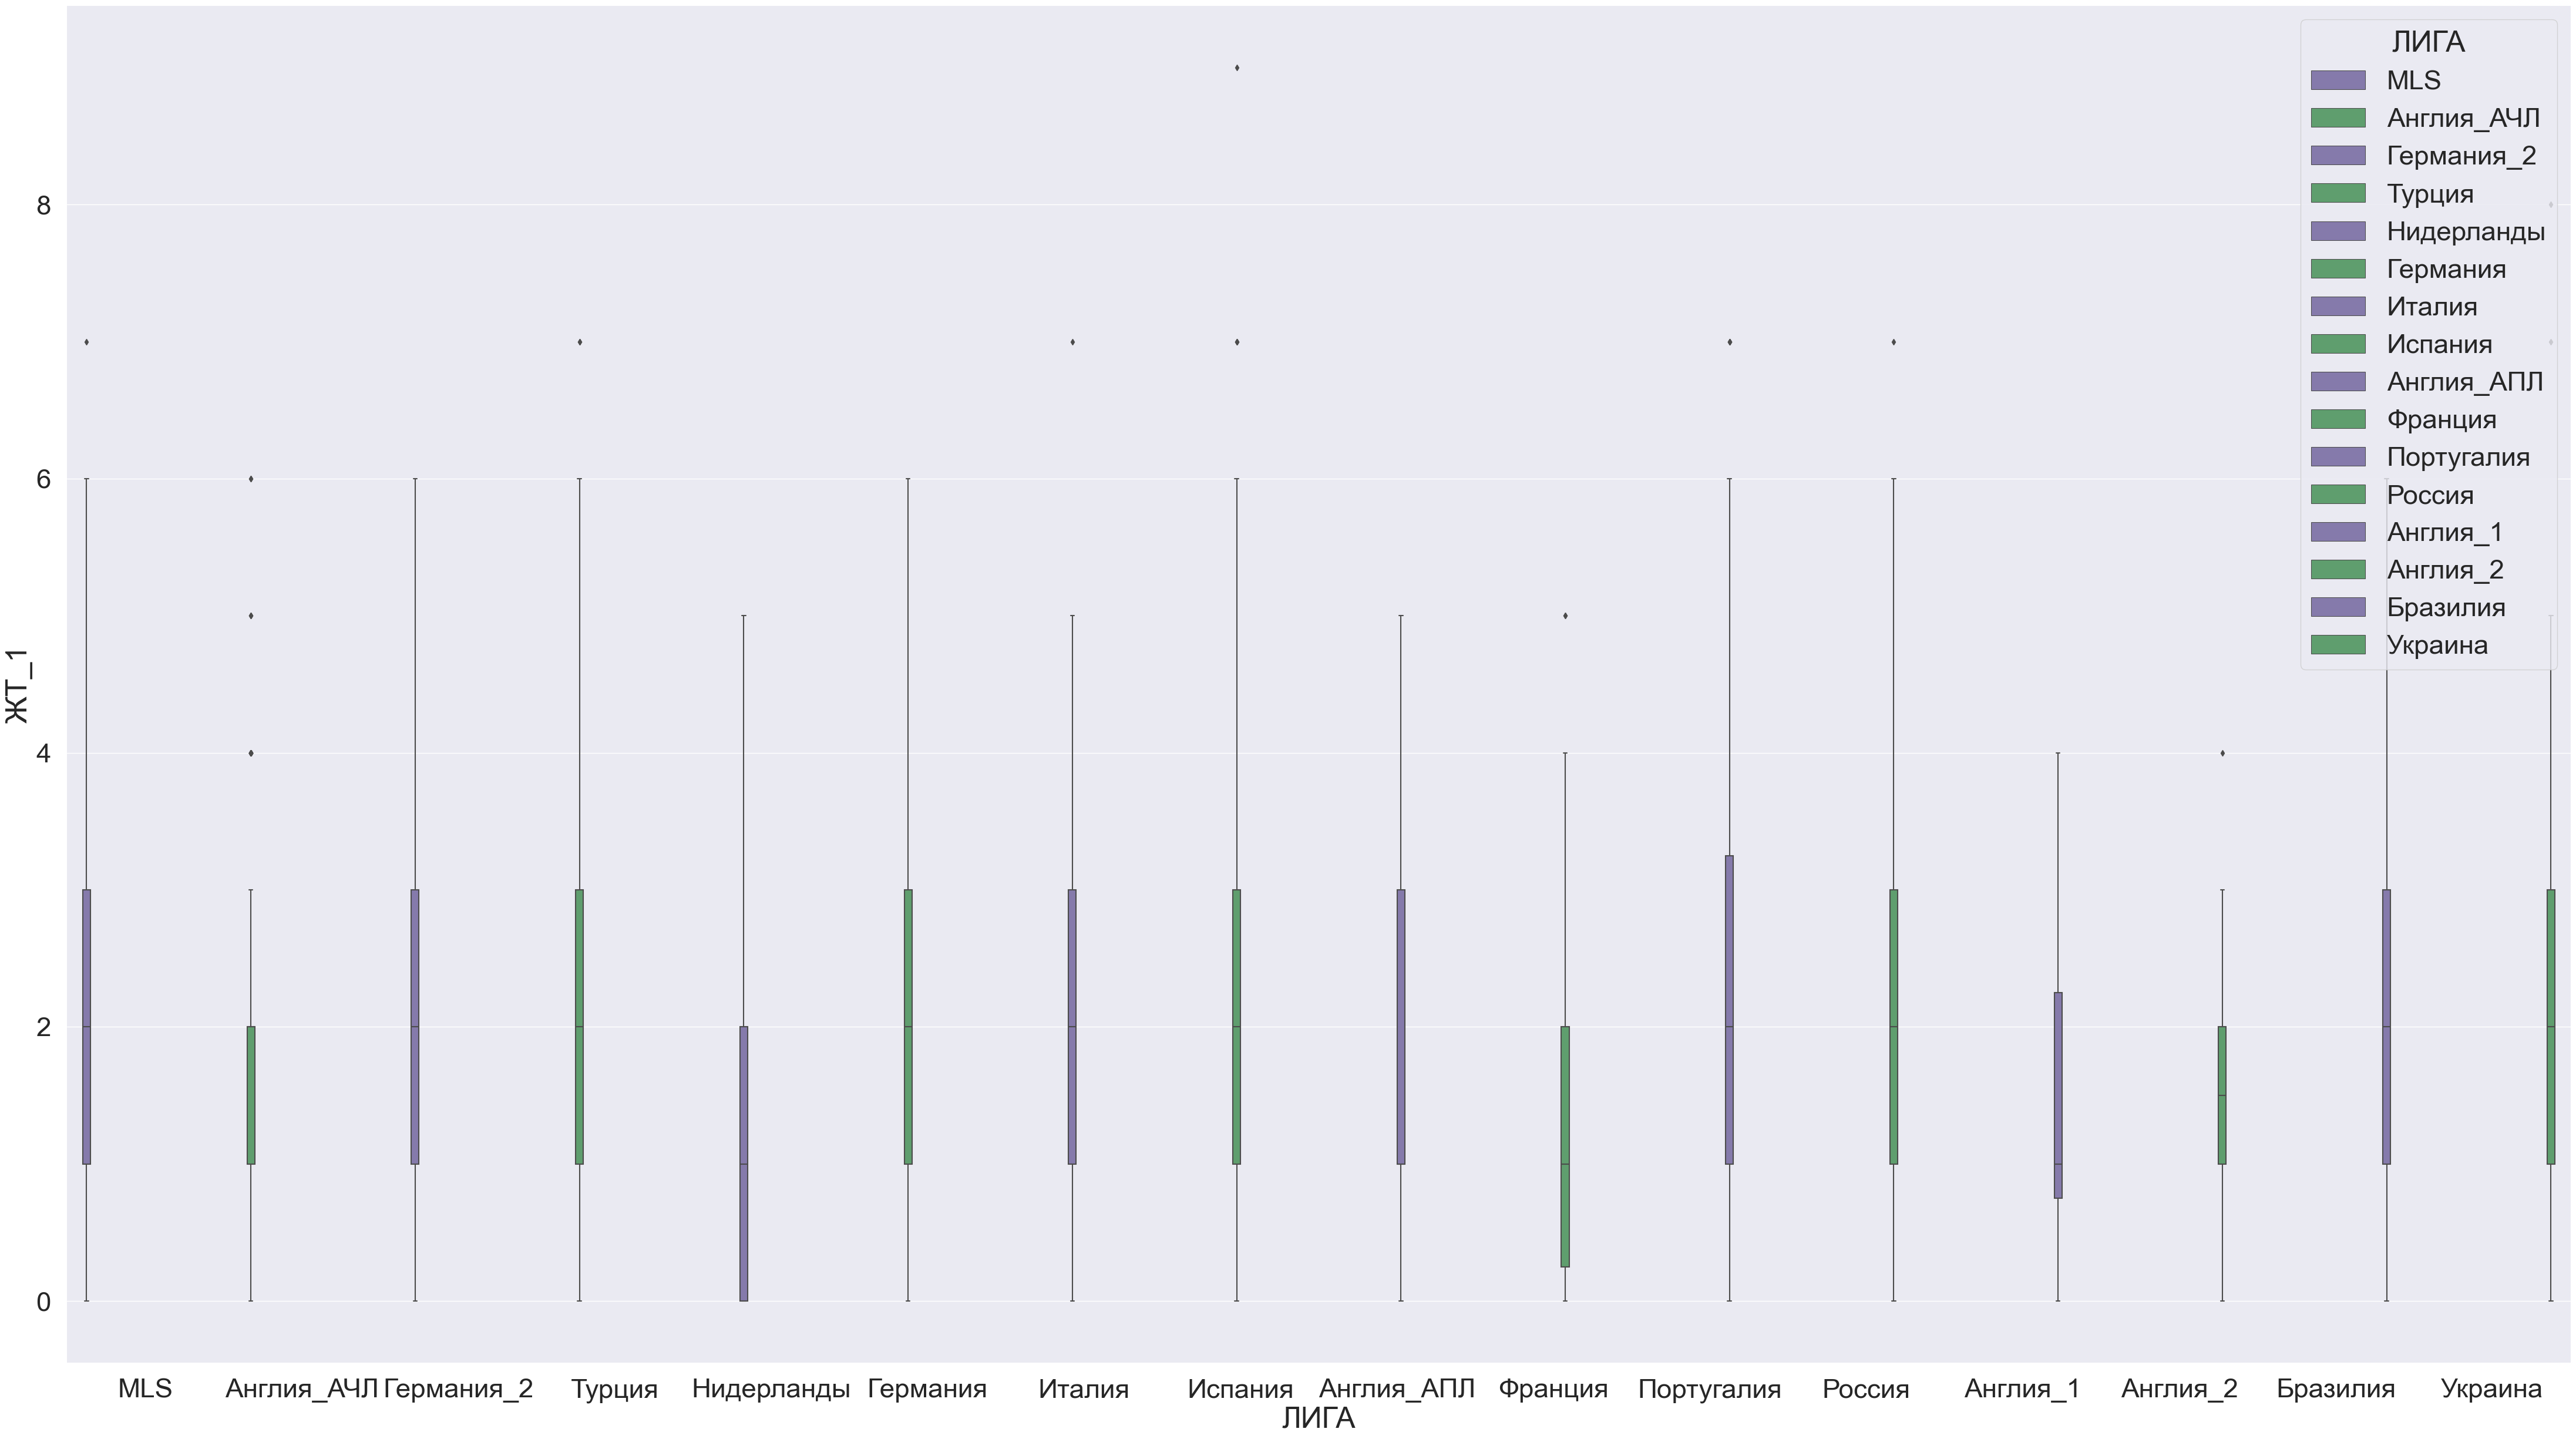

In [38]:
# boxplot желтые хозяева
grafik_boxplot(data_top_1,'ЖТ_1')

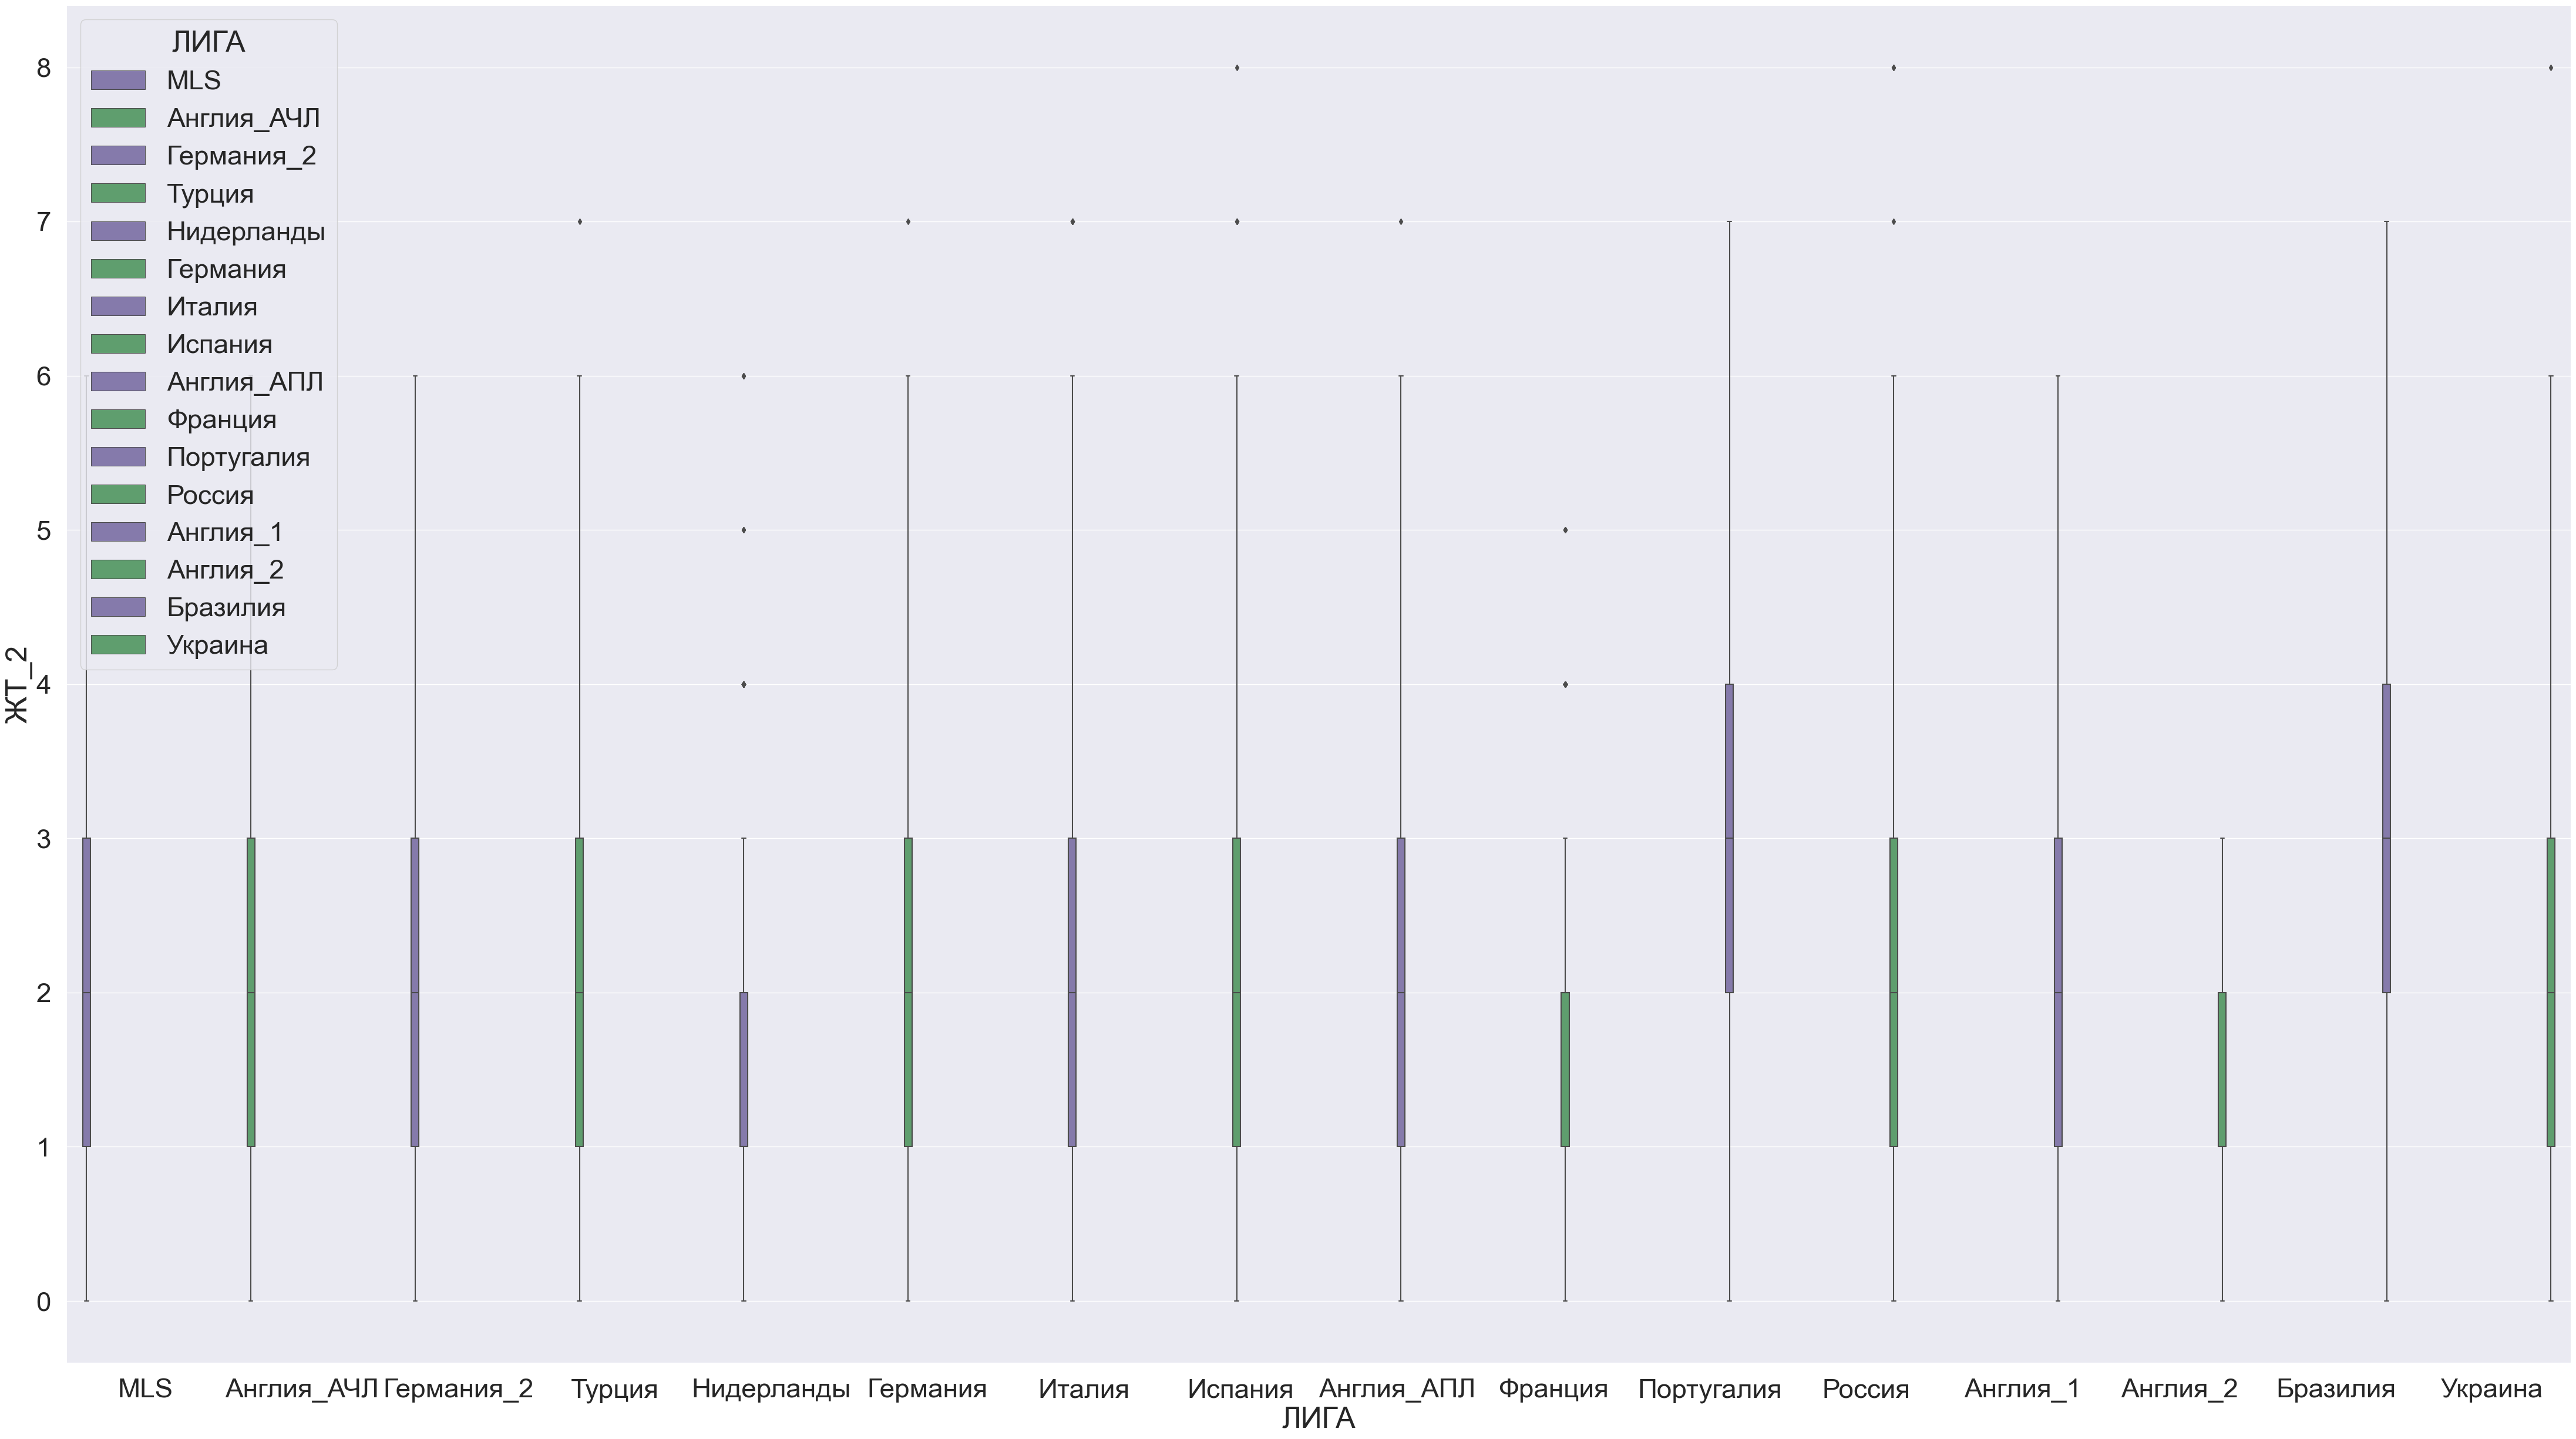

In [39]:
# boxplot желтые гости
grafik_boxplot(data_top_1,'ЖТ_2')

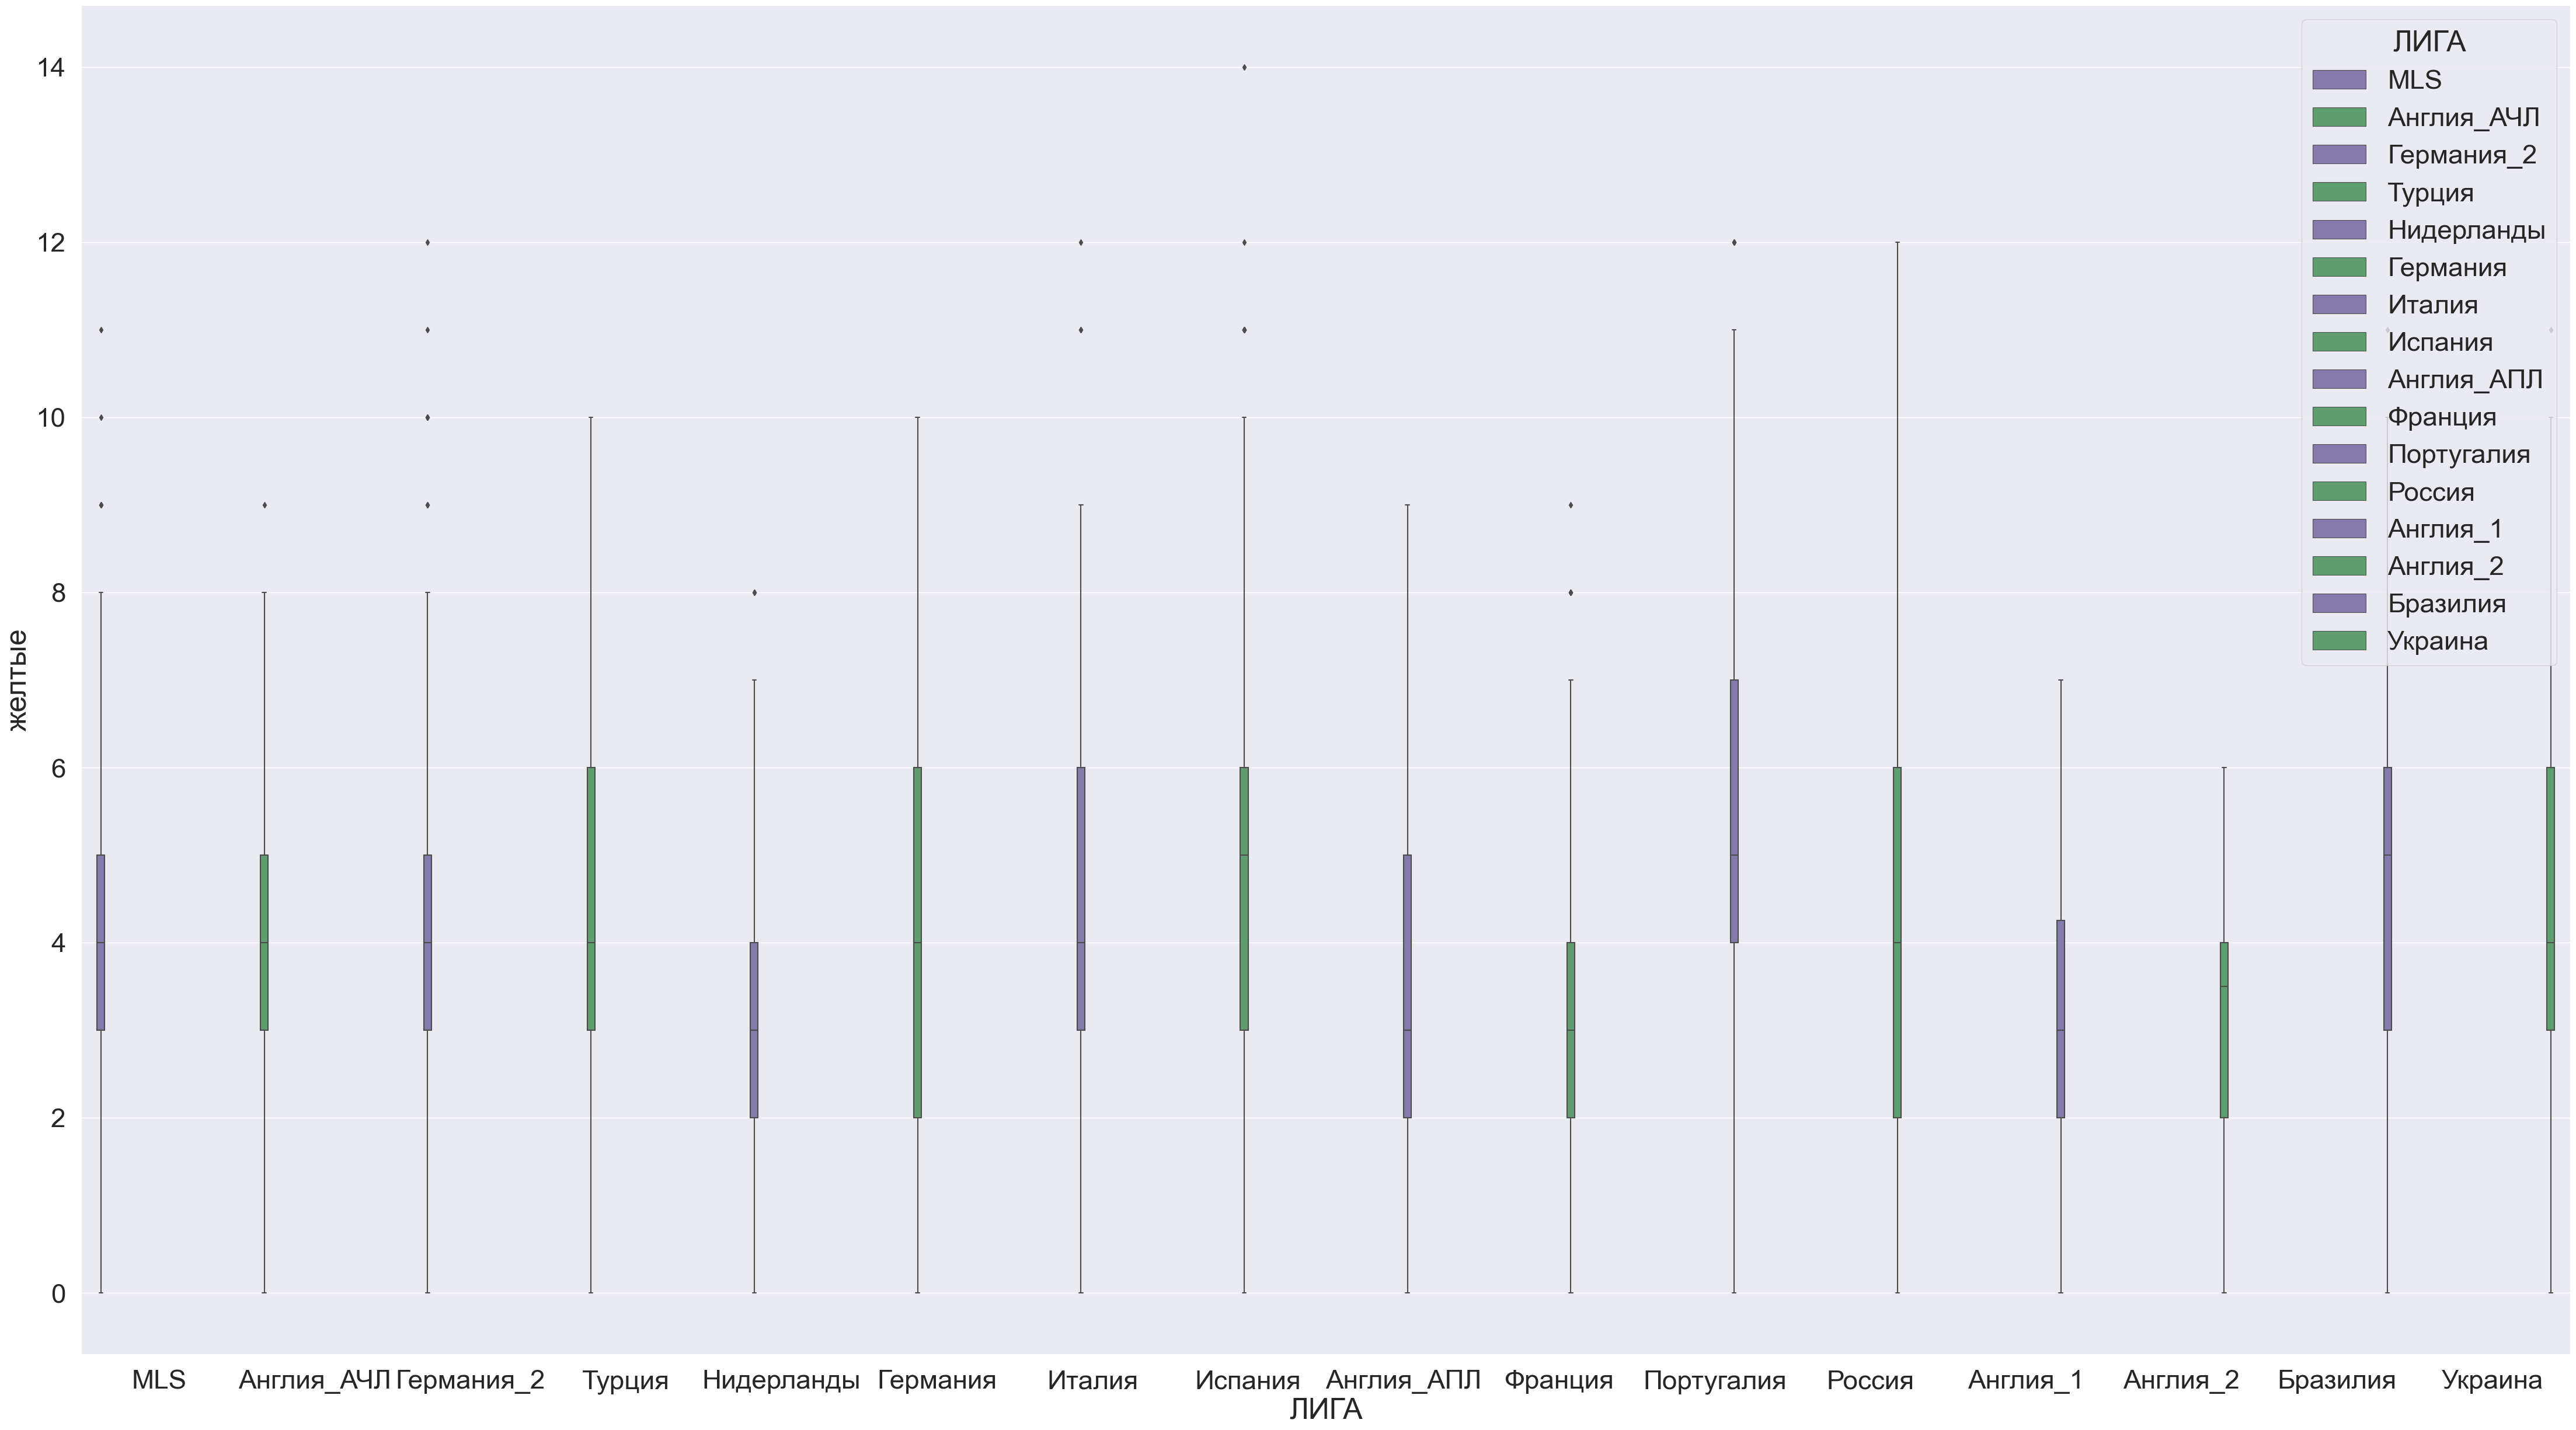

In [40]:
# boxplot желтые 
grafik_boxplot(data_top_1,'желтые')

Наблюдения желтые:

* Ящики по желтым явно более разбросаны чем голы и угловые. 
* Англия_2 хозяева имеет маленький размах 
* Нидерланды, Франция, Англия_2 гости имеет маленький размах 
* За полный матч Нидерланды, Франция, Англия_2  имеет маленький размах, что интересно к ним добавилась MLS. Тоесть MLS хозяева и гости уравновешивают друг друга.


**топ 1 фолы**  <a id='boxplot_7'></a>

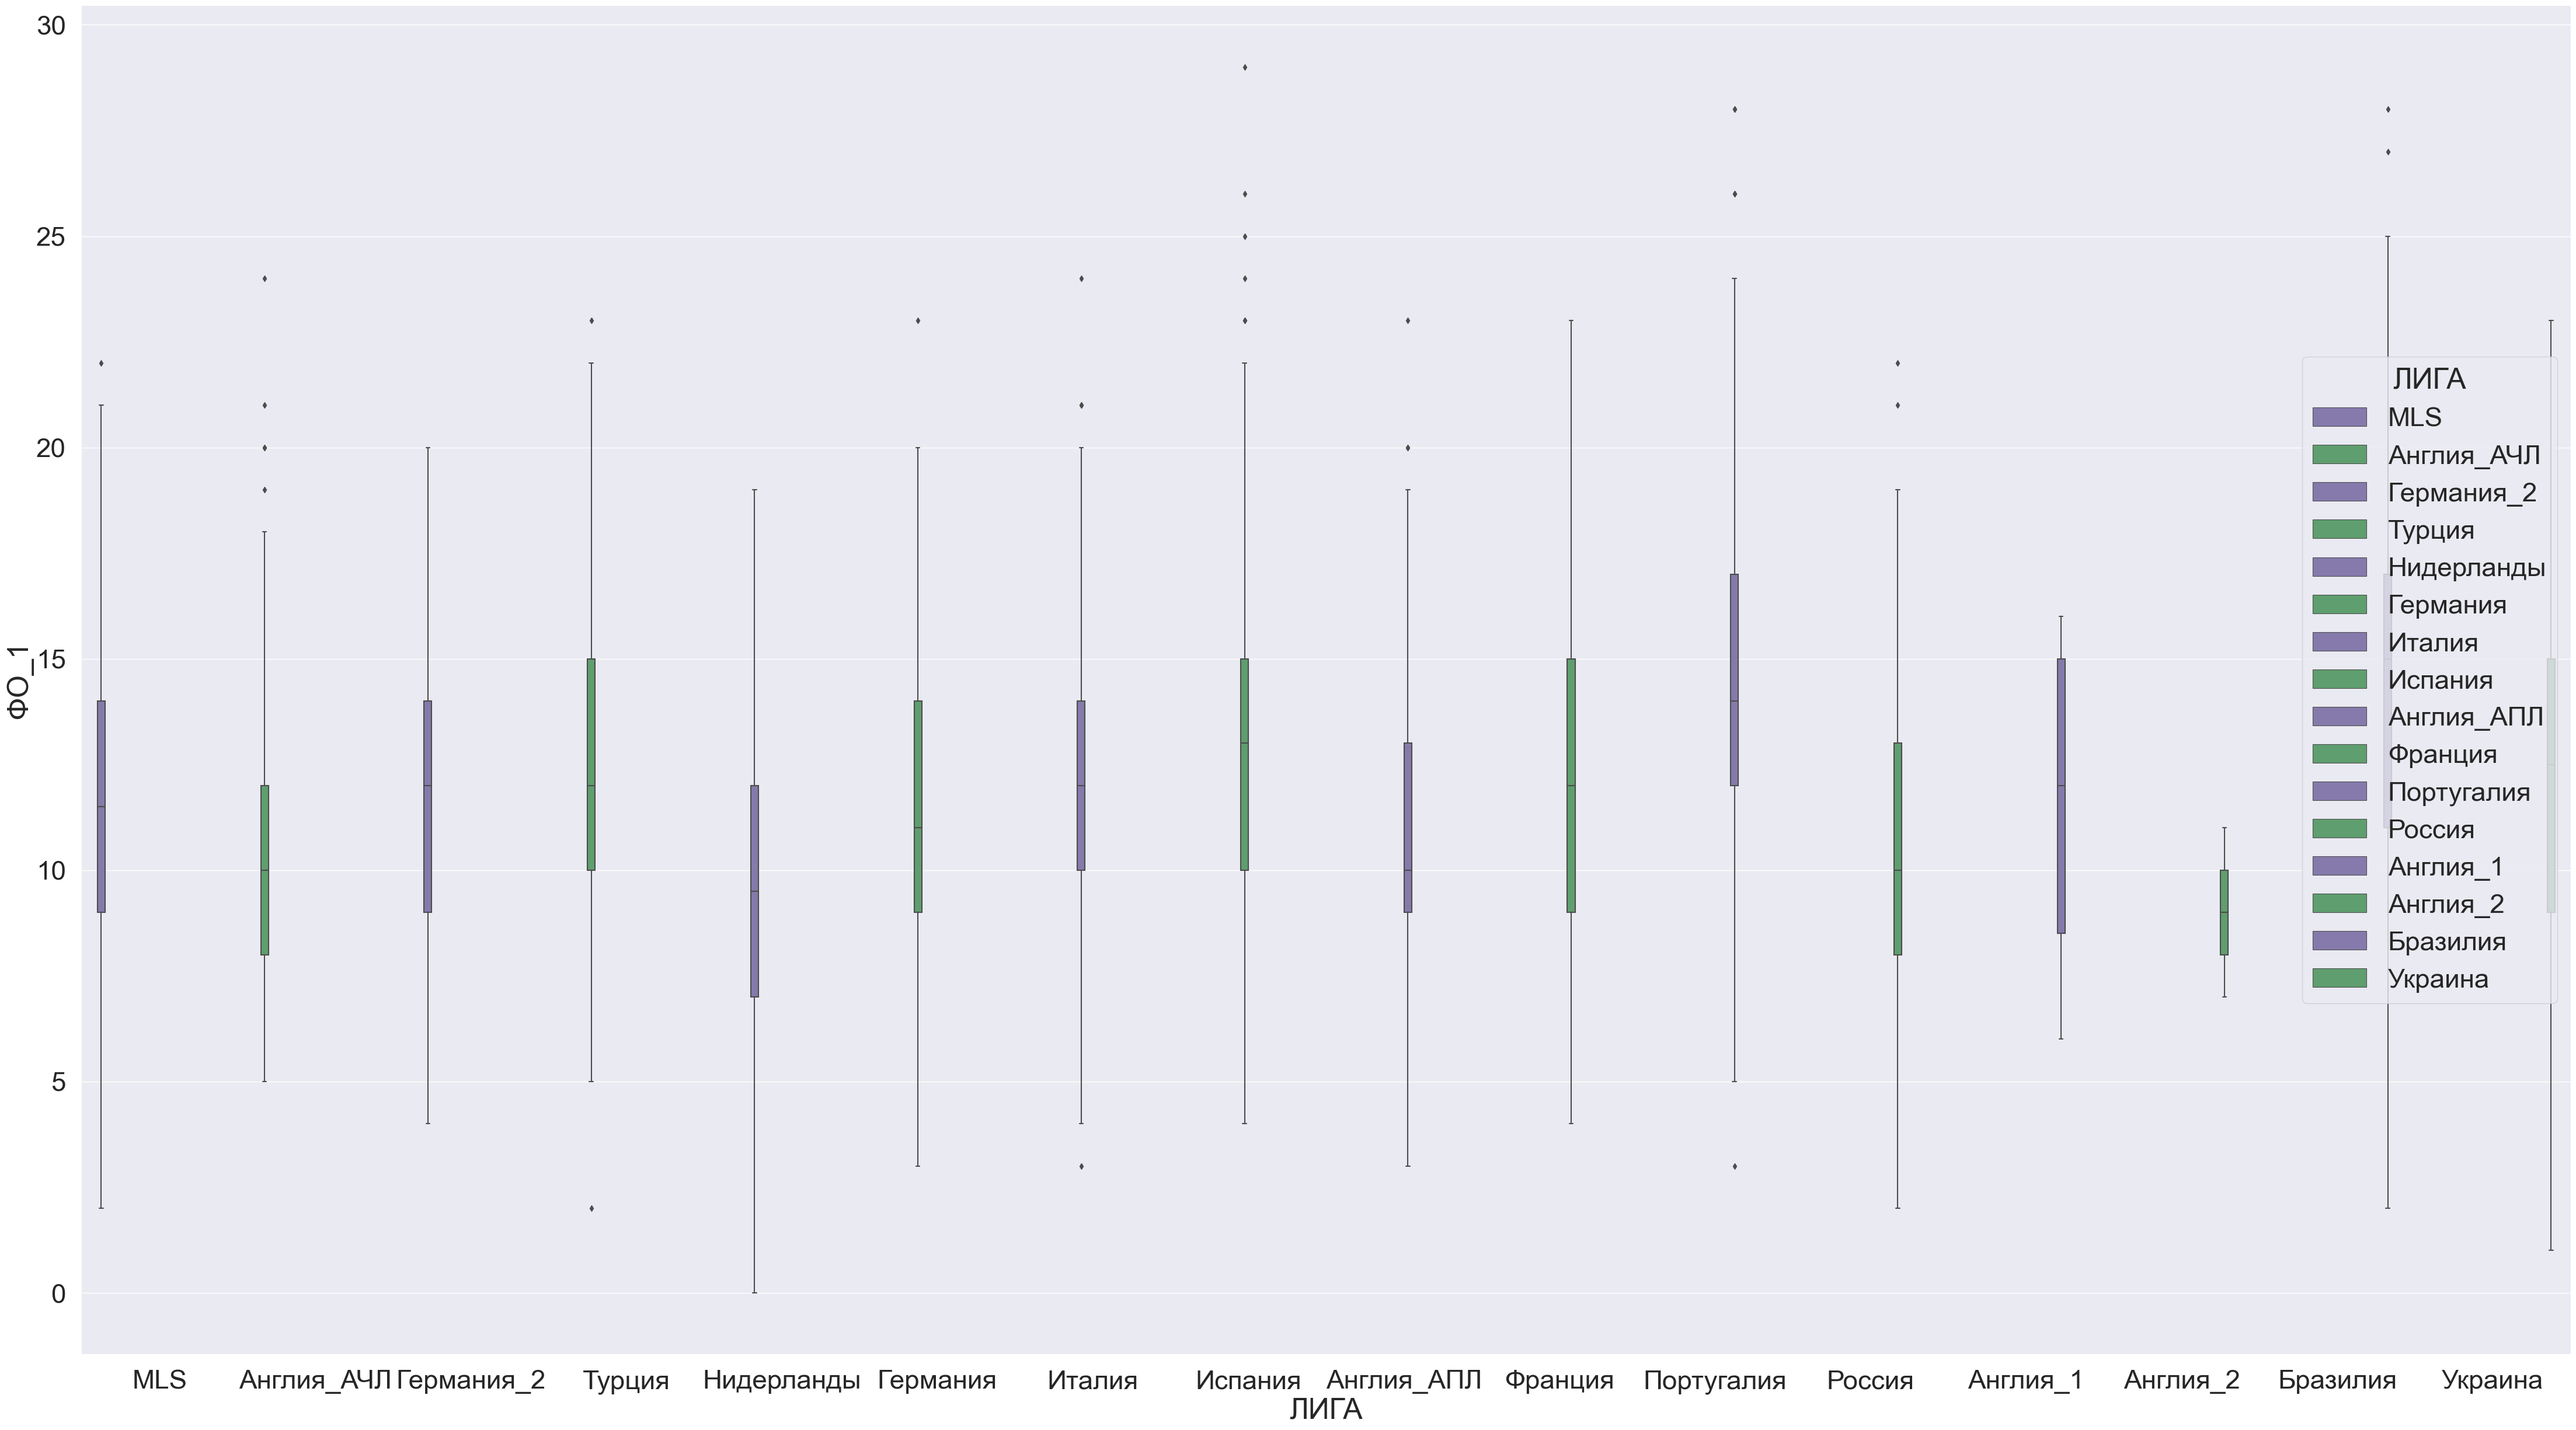

In [41]:
# boxplot фолы хозяева 
grafik_boxplot(data_top_1,'ФО_1')

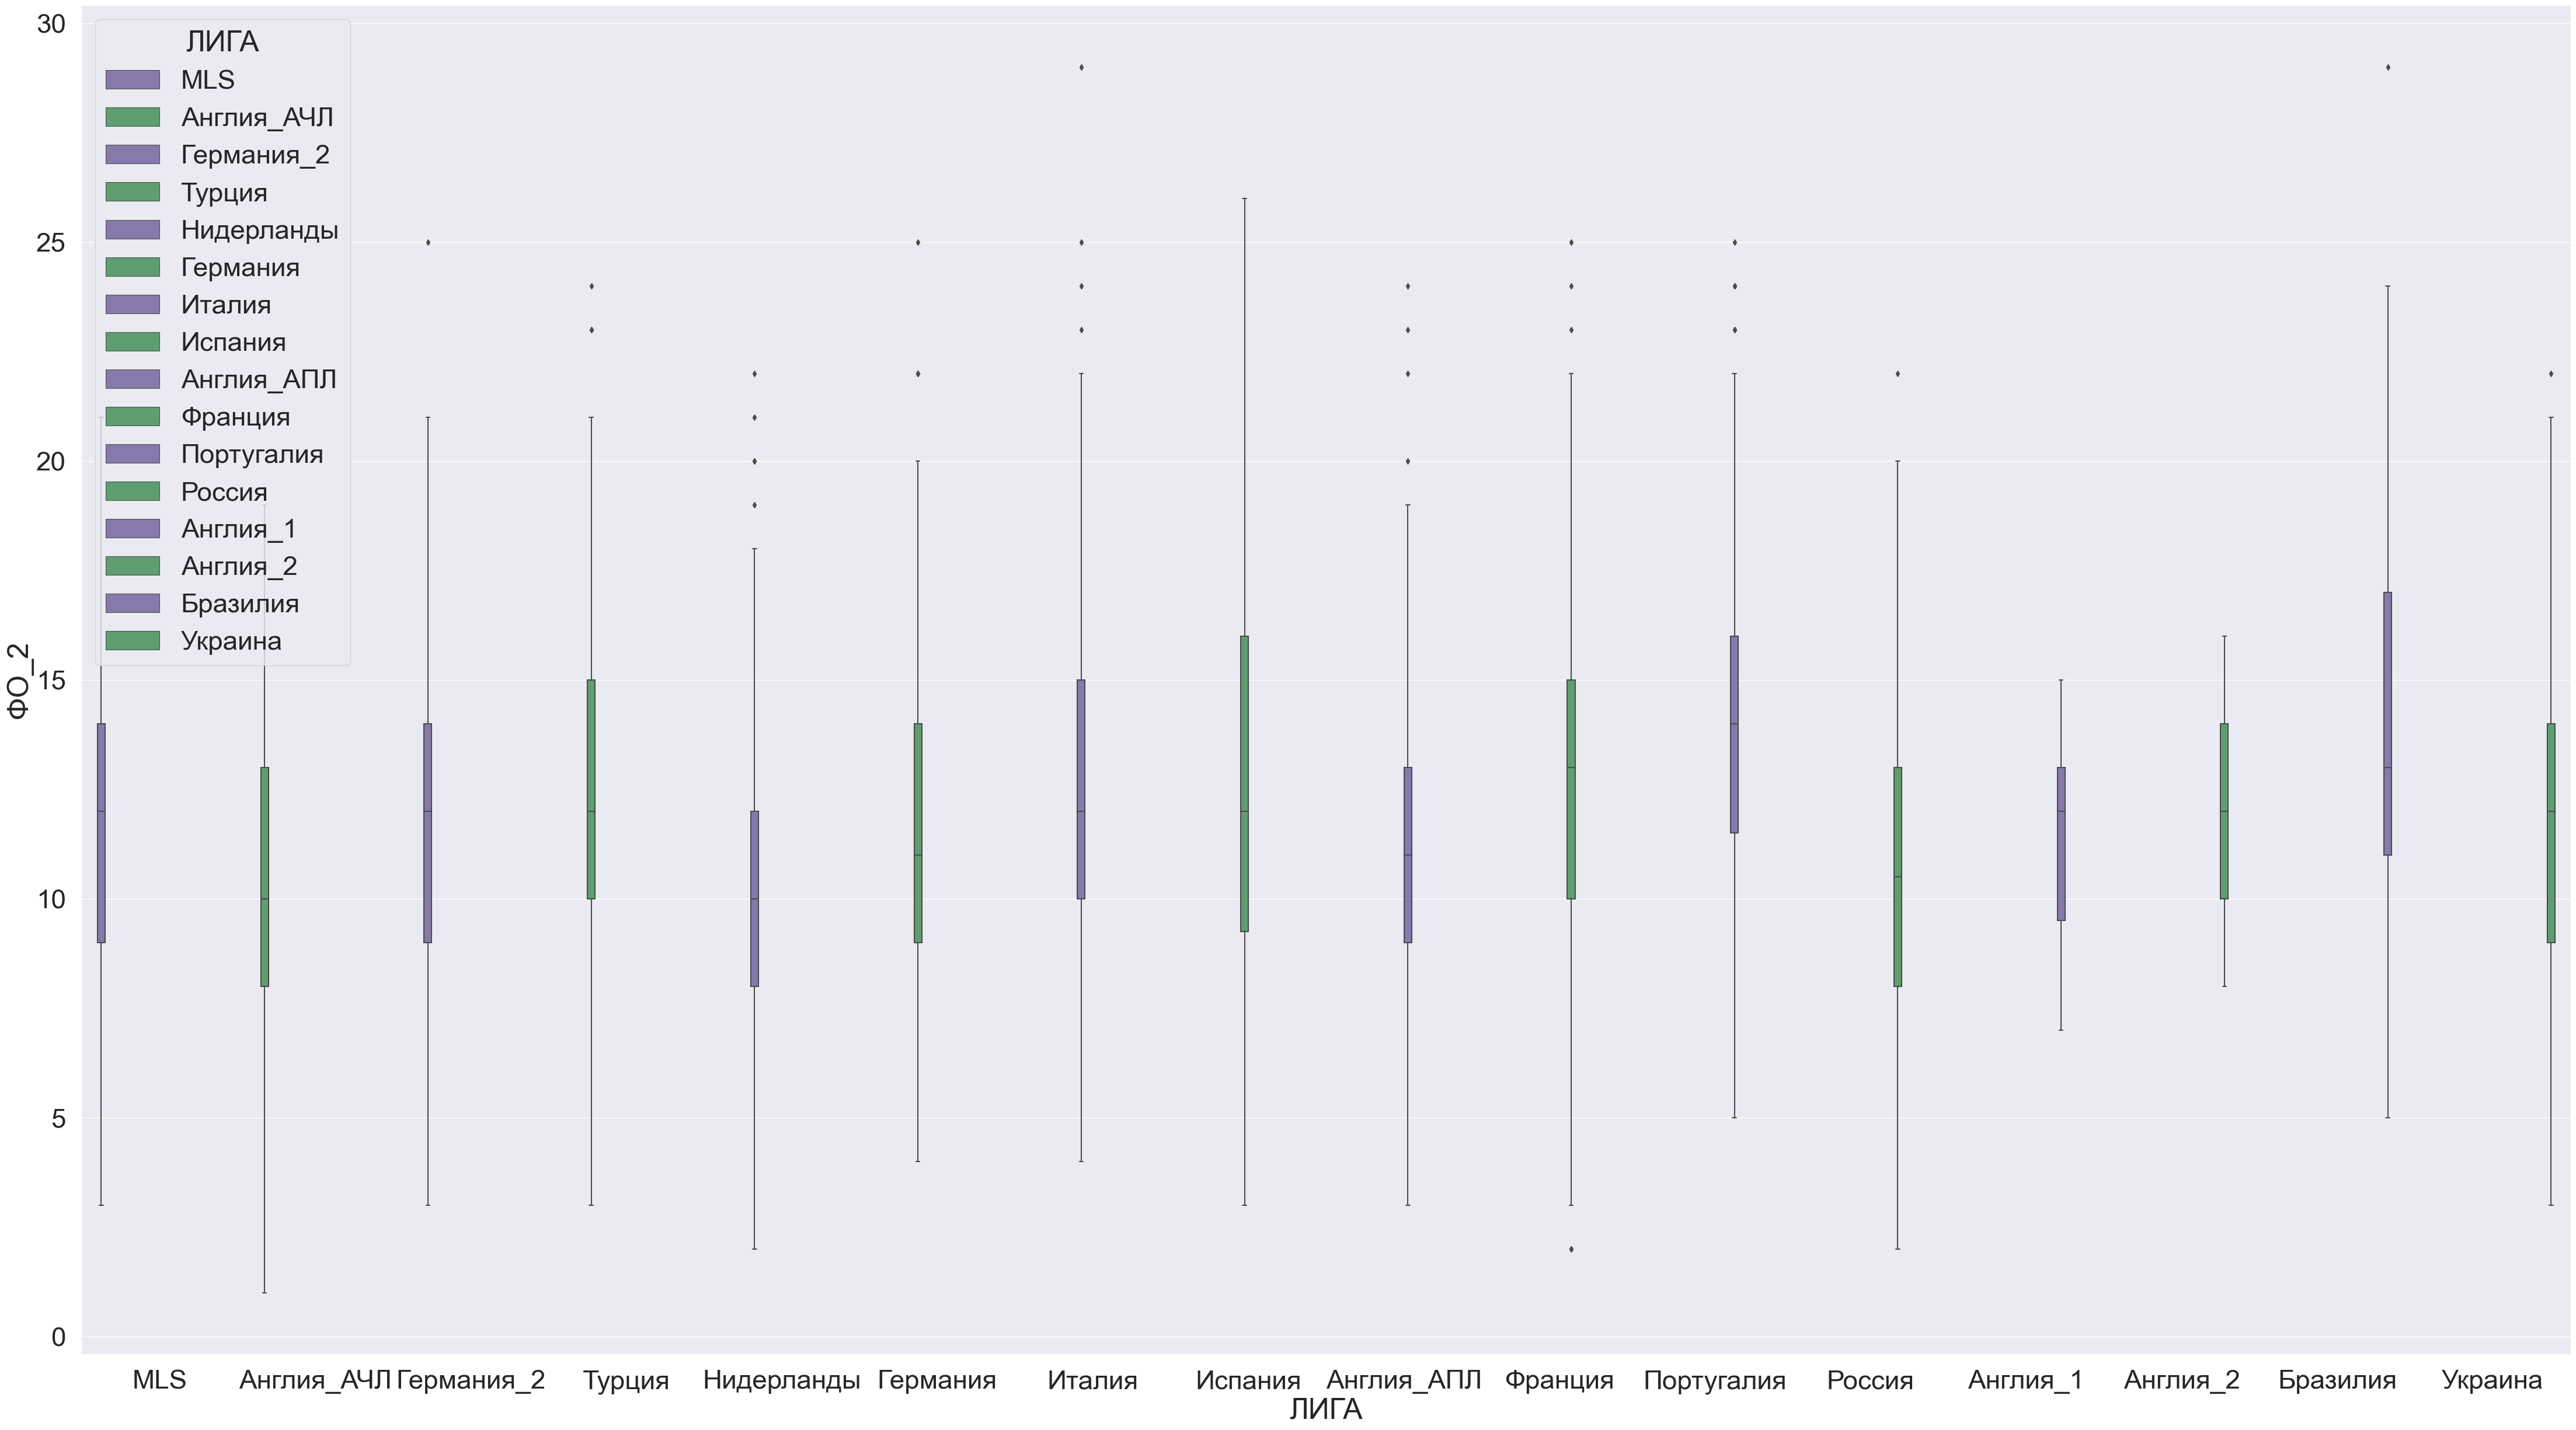

In [42]:
# boxplot фолы гости
grafik_boxplot(data_top_1,'ФО_2')

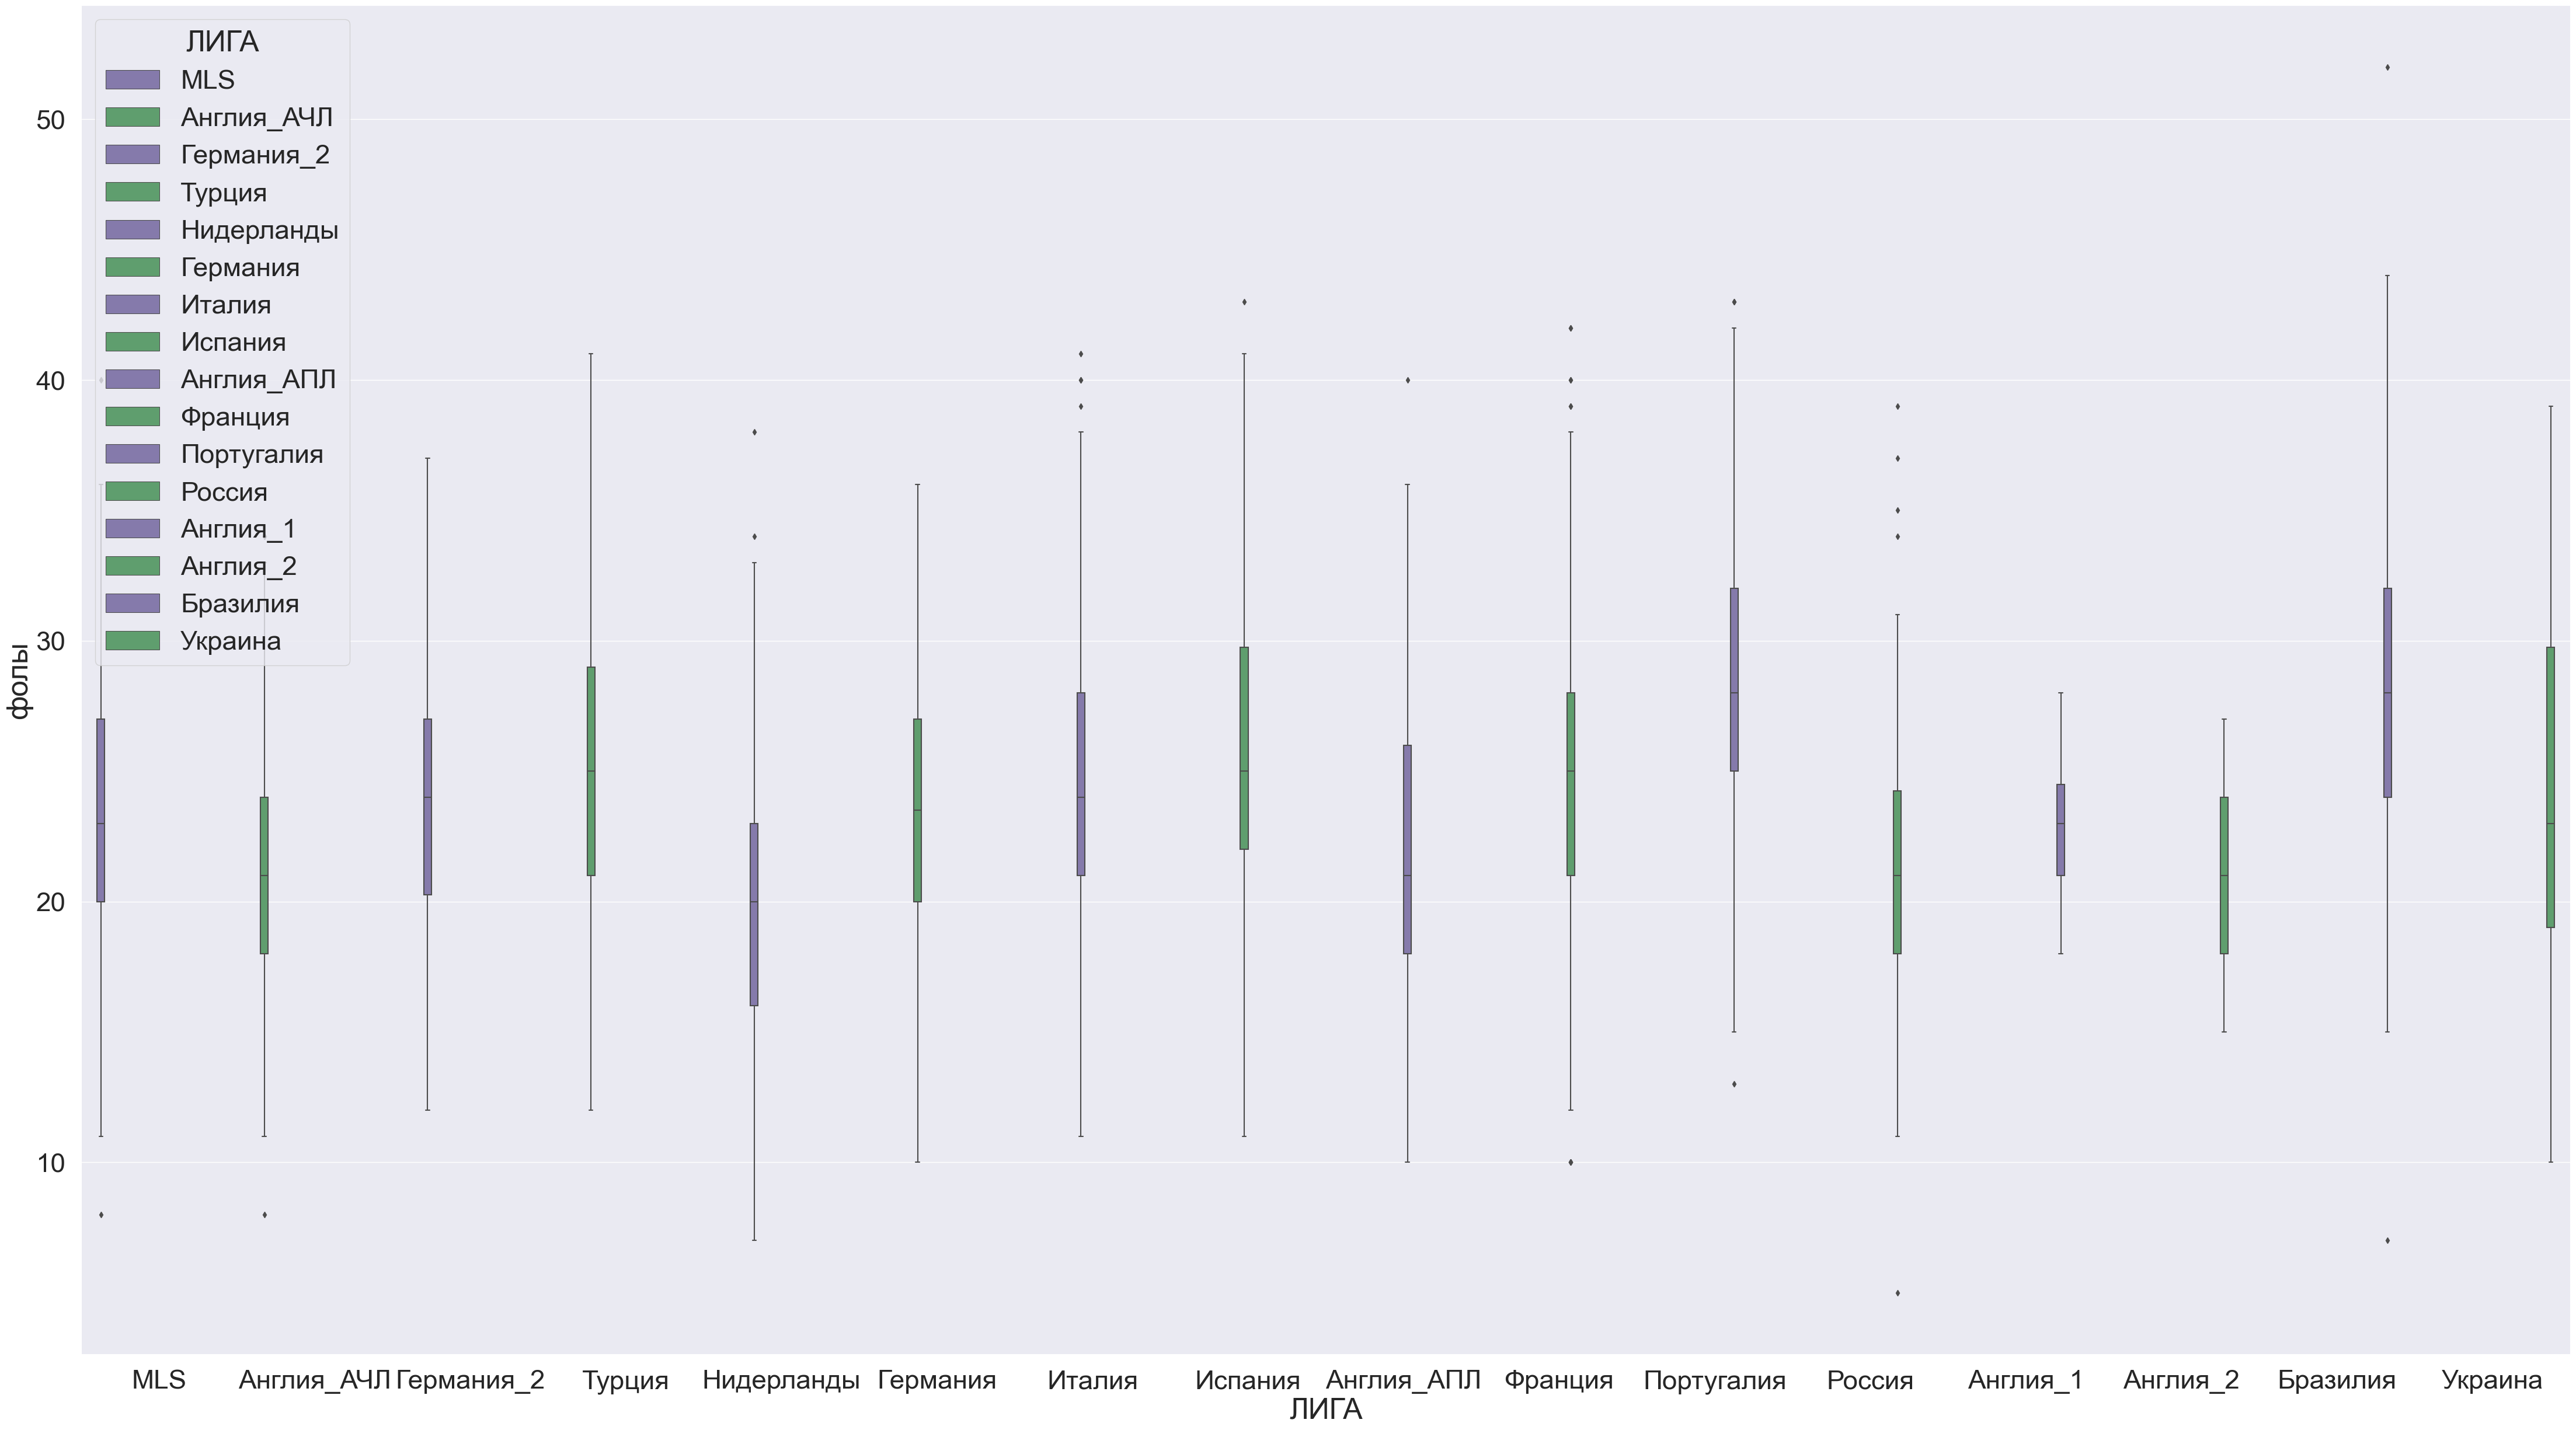

In [43]:
# boxplot фолы 
grafik_boxplot(data_top_1,'фолы')

Наблюдения фолы:
* Англия_2 фолы хозяева имееют маленький размах
* фолы за матч Англия_1 имееют маленький размах(то есть хозяева гости уравновешивают друг друга)

**топ 1 удары в створ**  <a id='boxplot_8'></a>

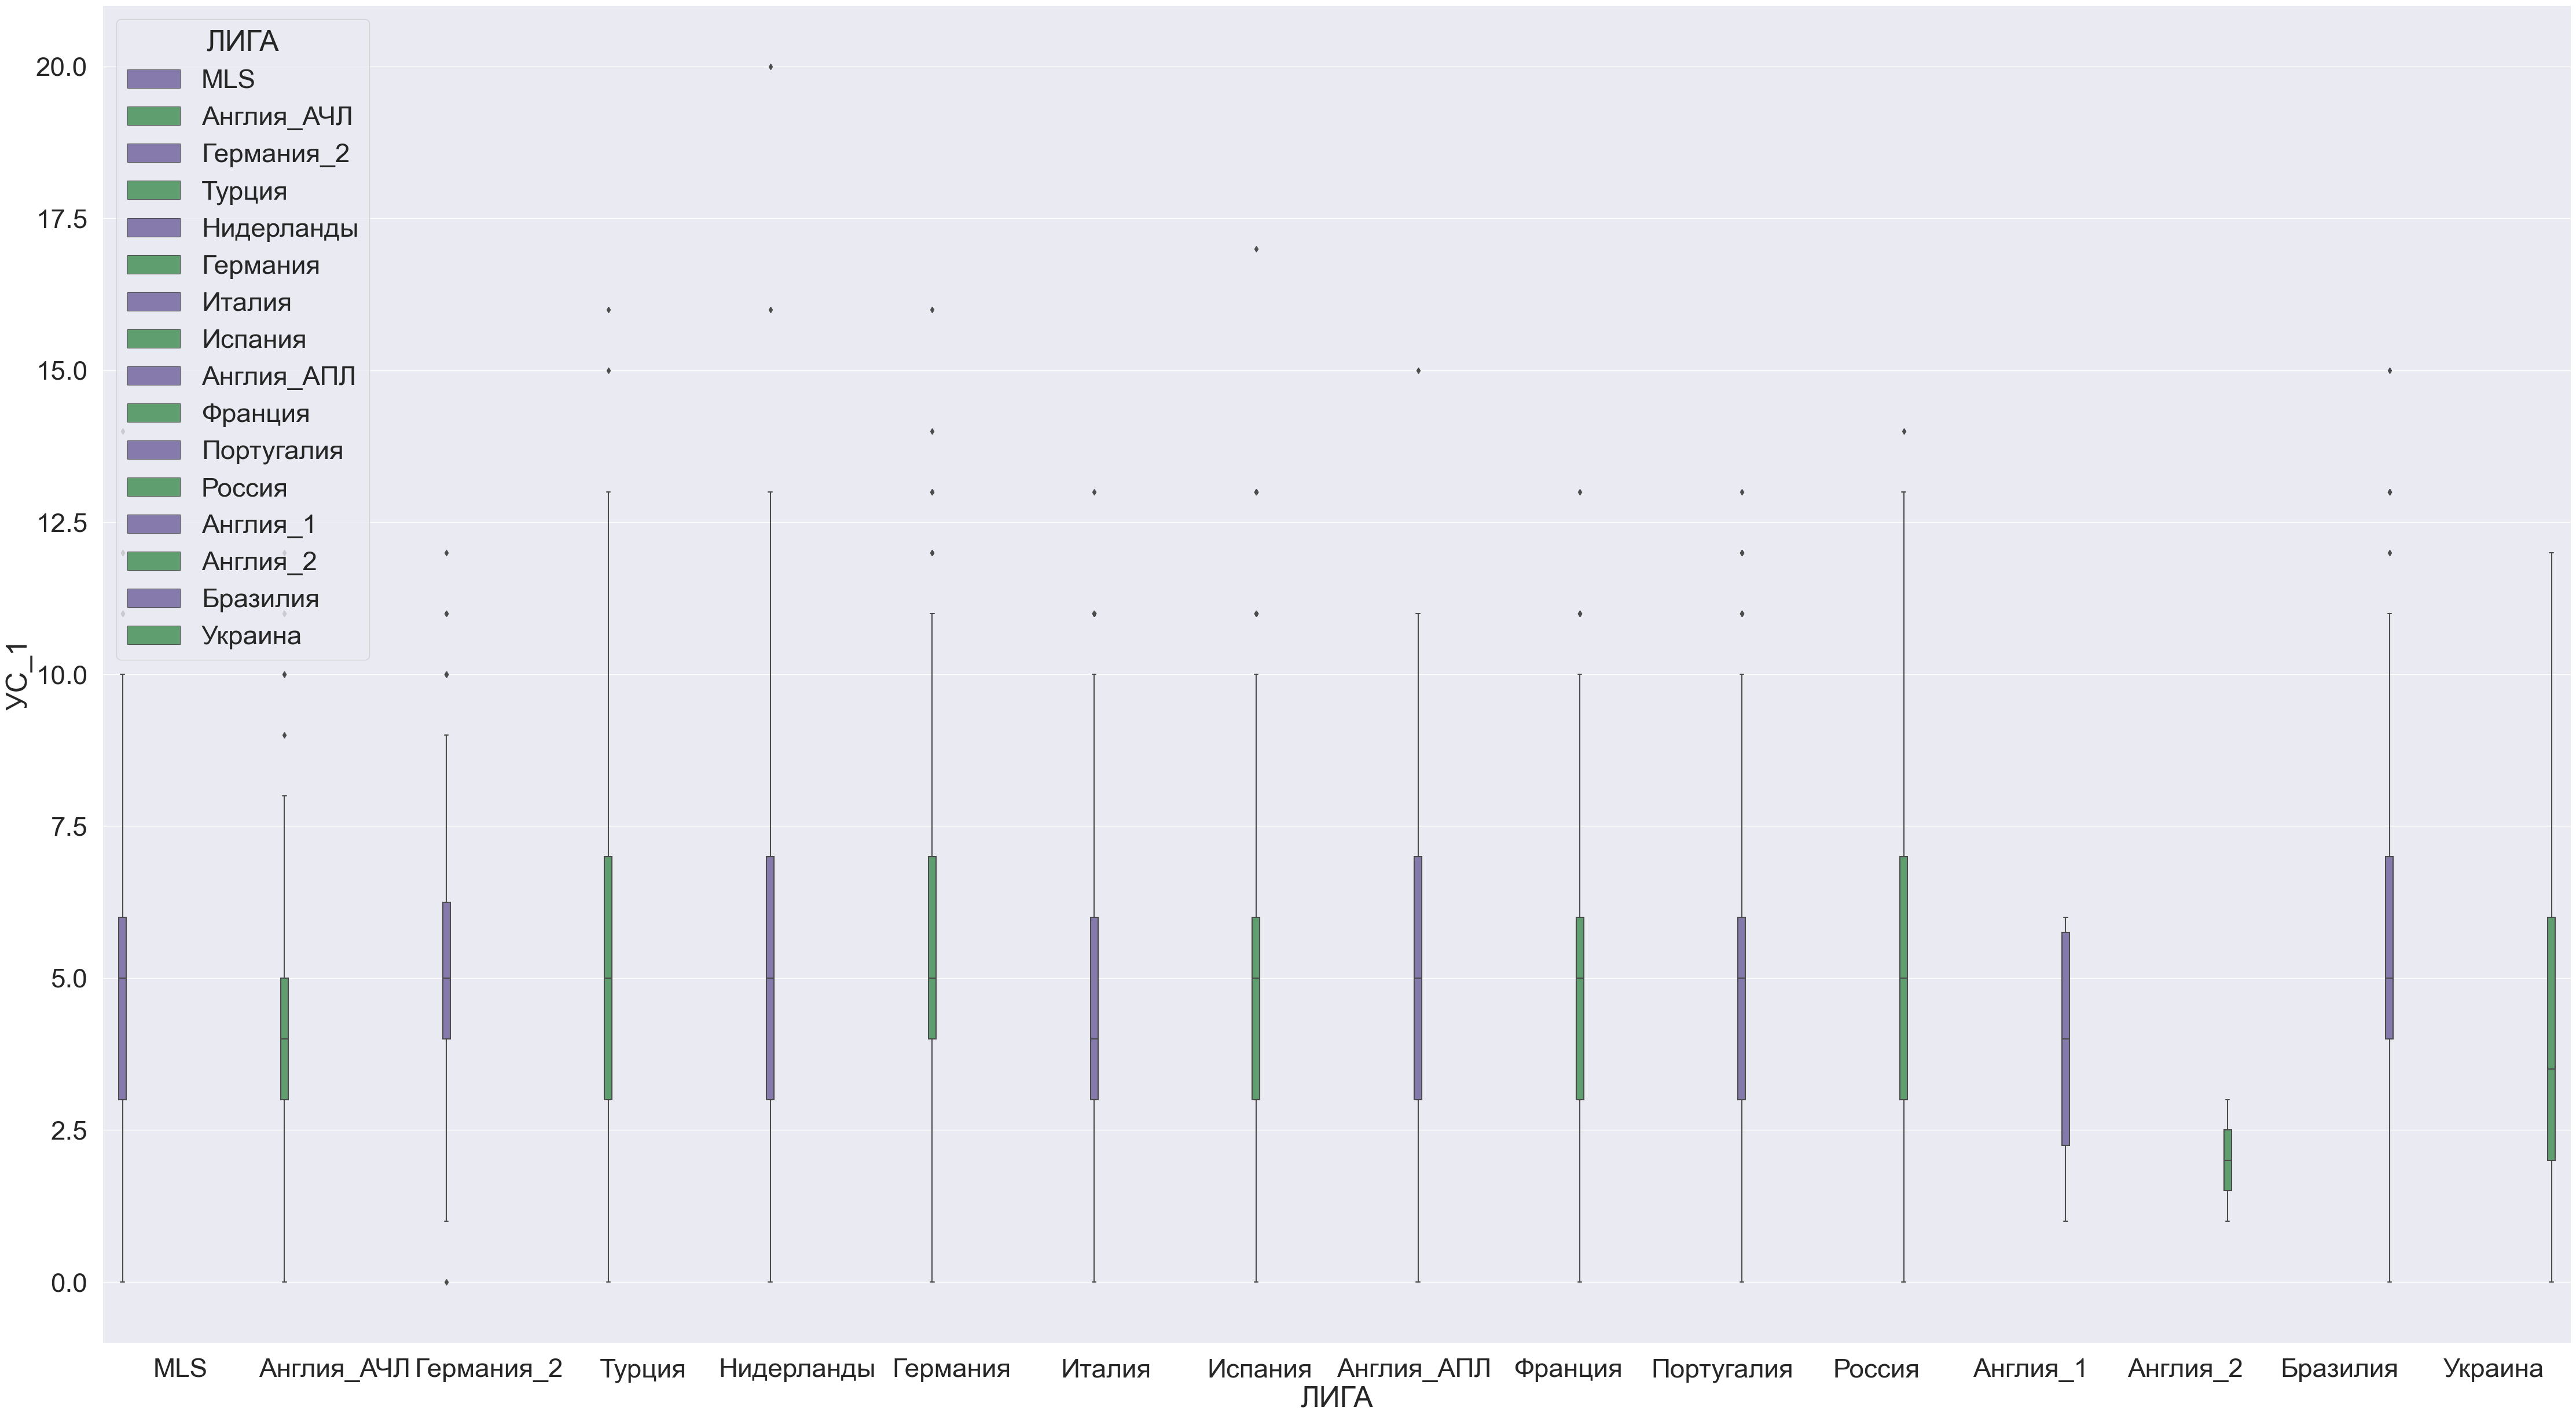

In [44]:
# boxplot удары в створ хозяева
grafik_boxplot(data_top_1,'УС_1')

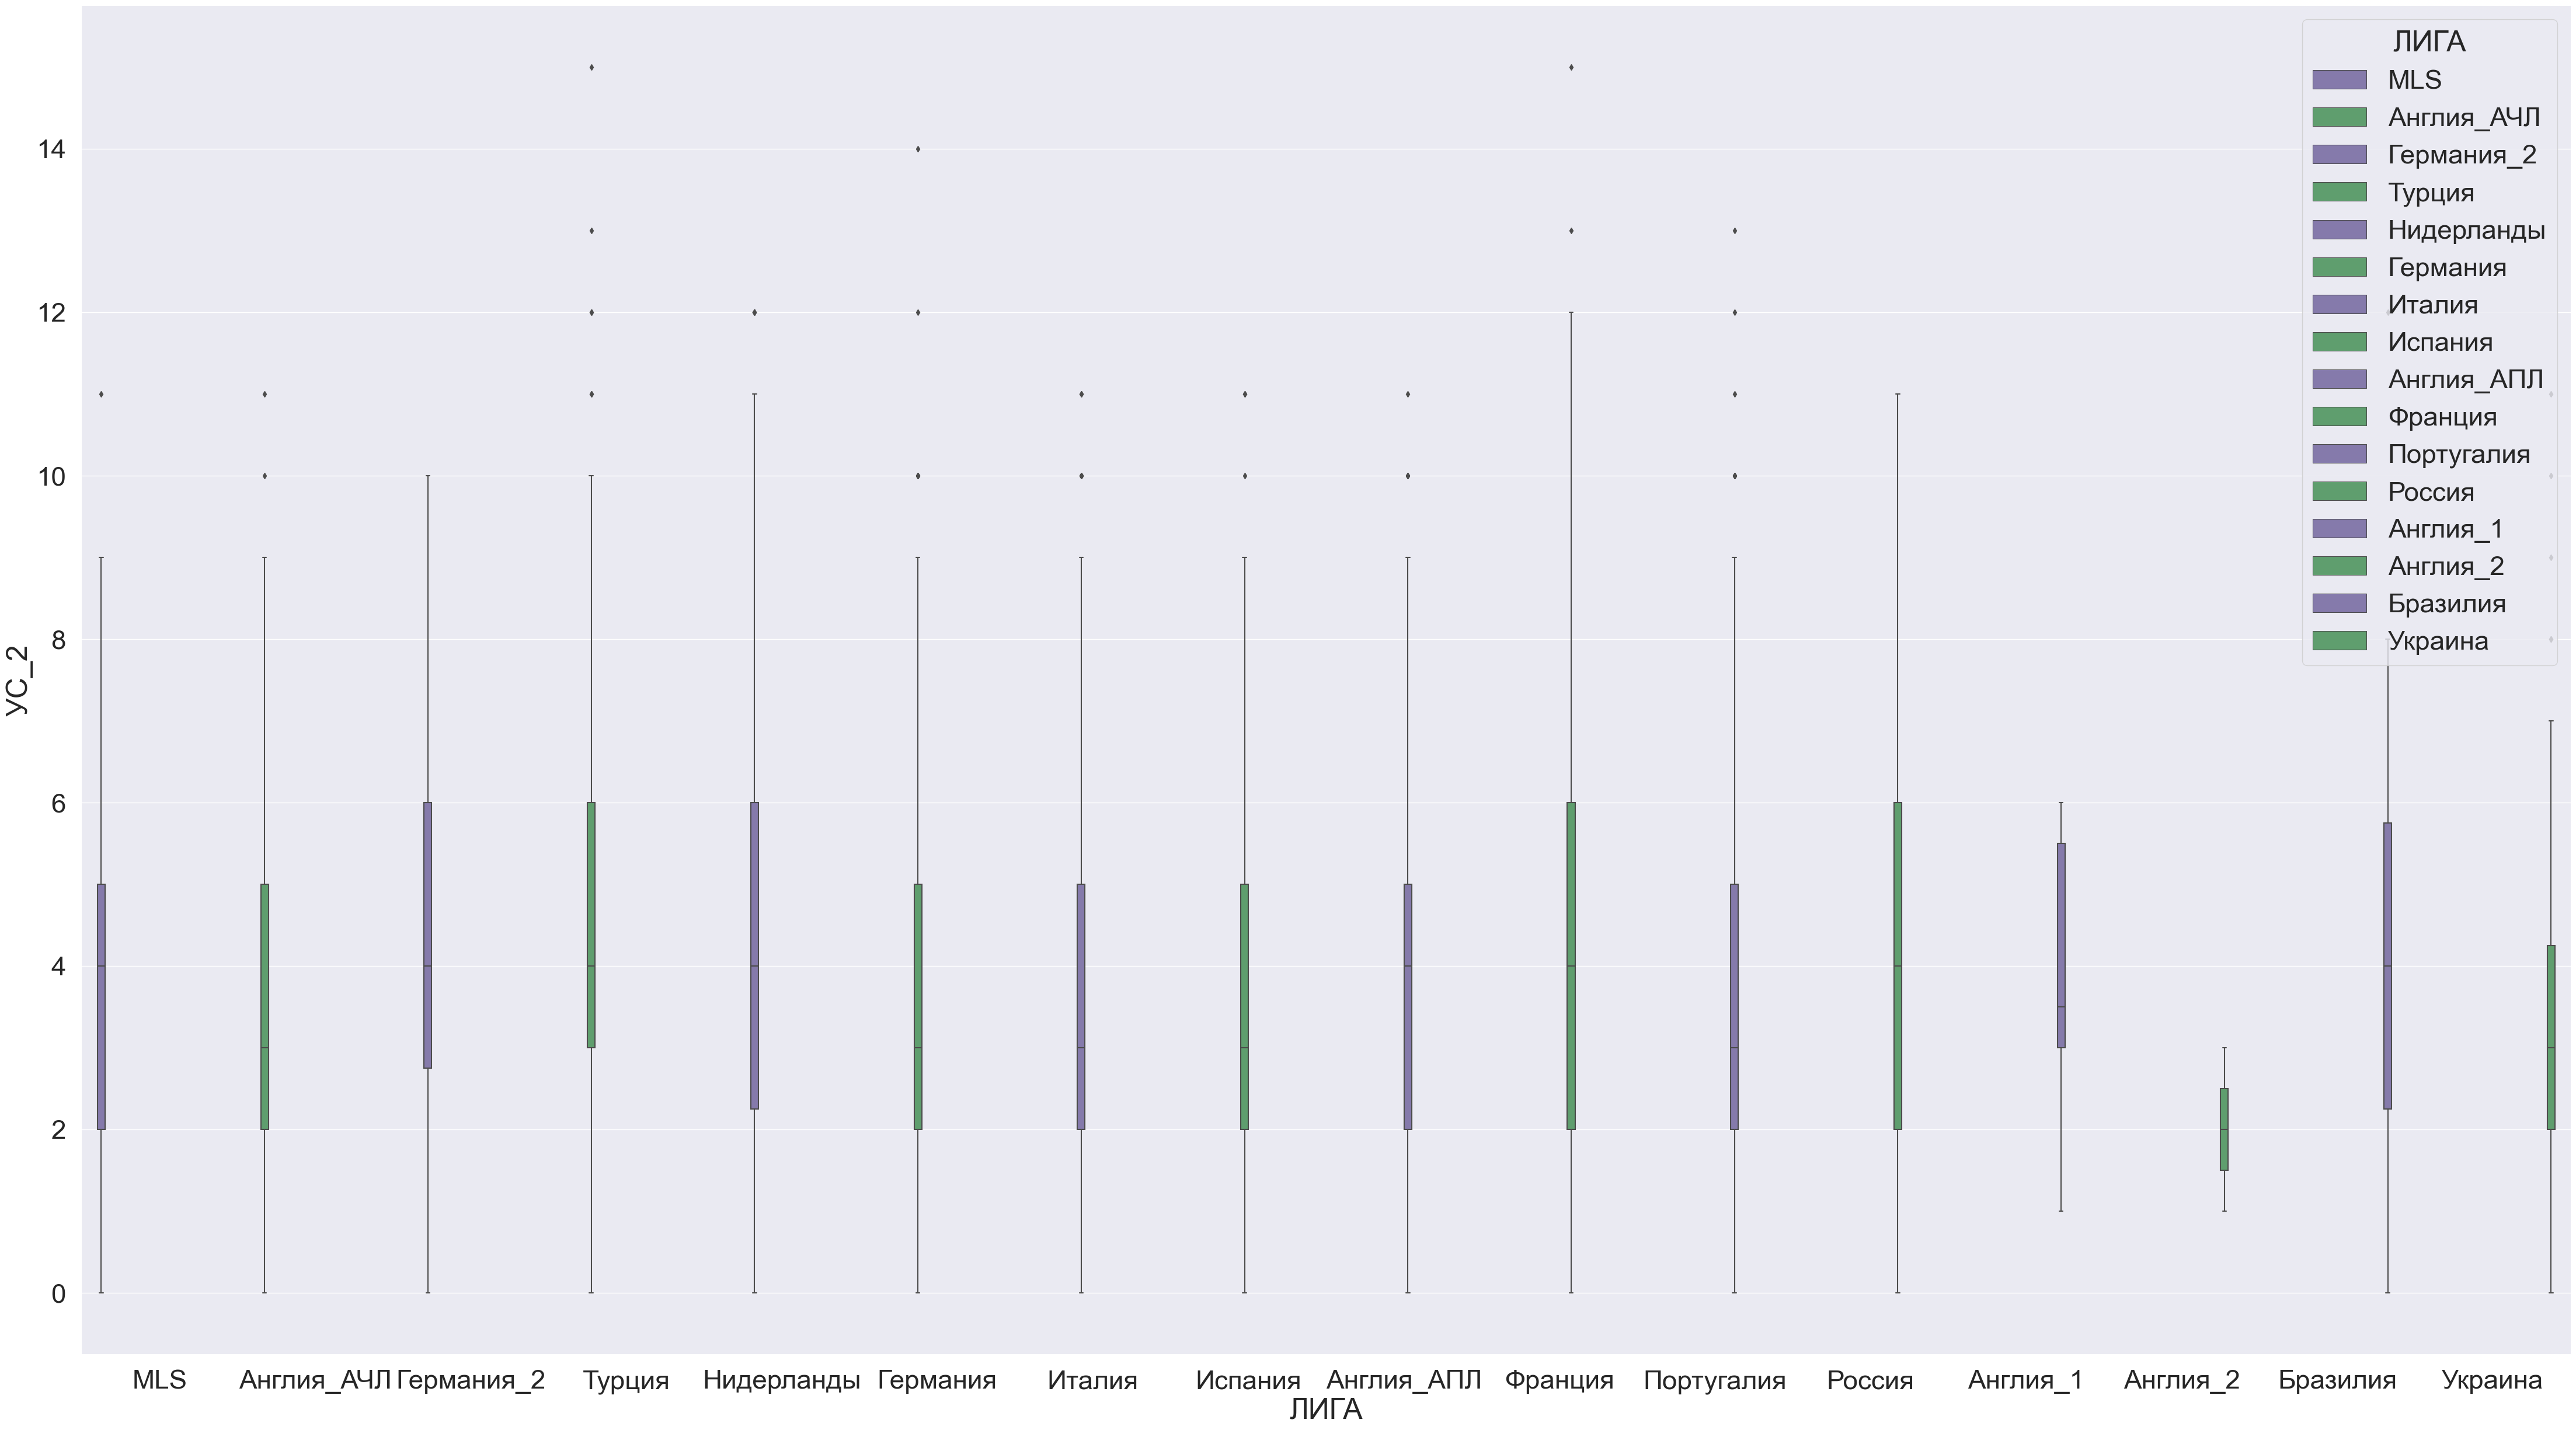

In [45]:
# boxplot удары в створ гости
grafik_boxplot(data_top_1,'УС_2')

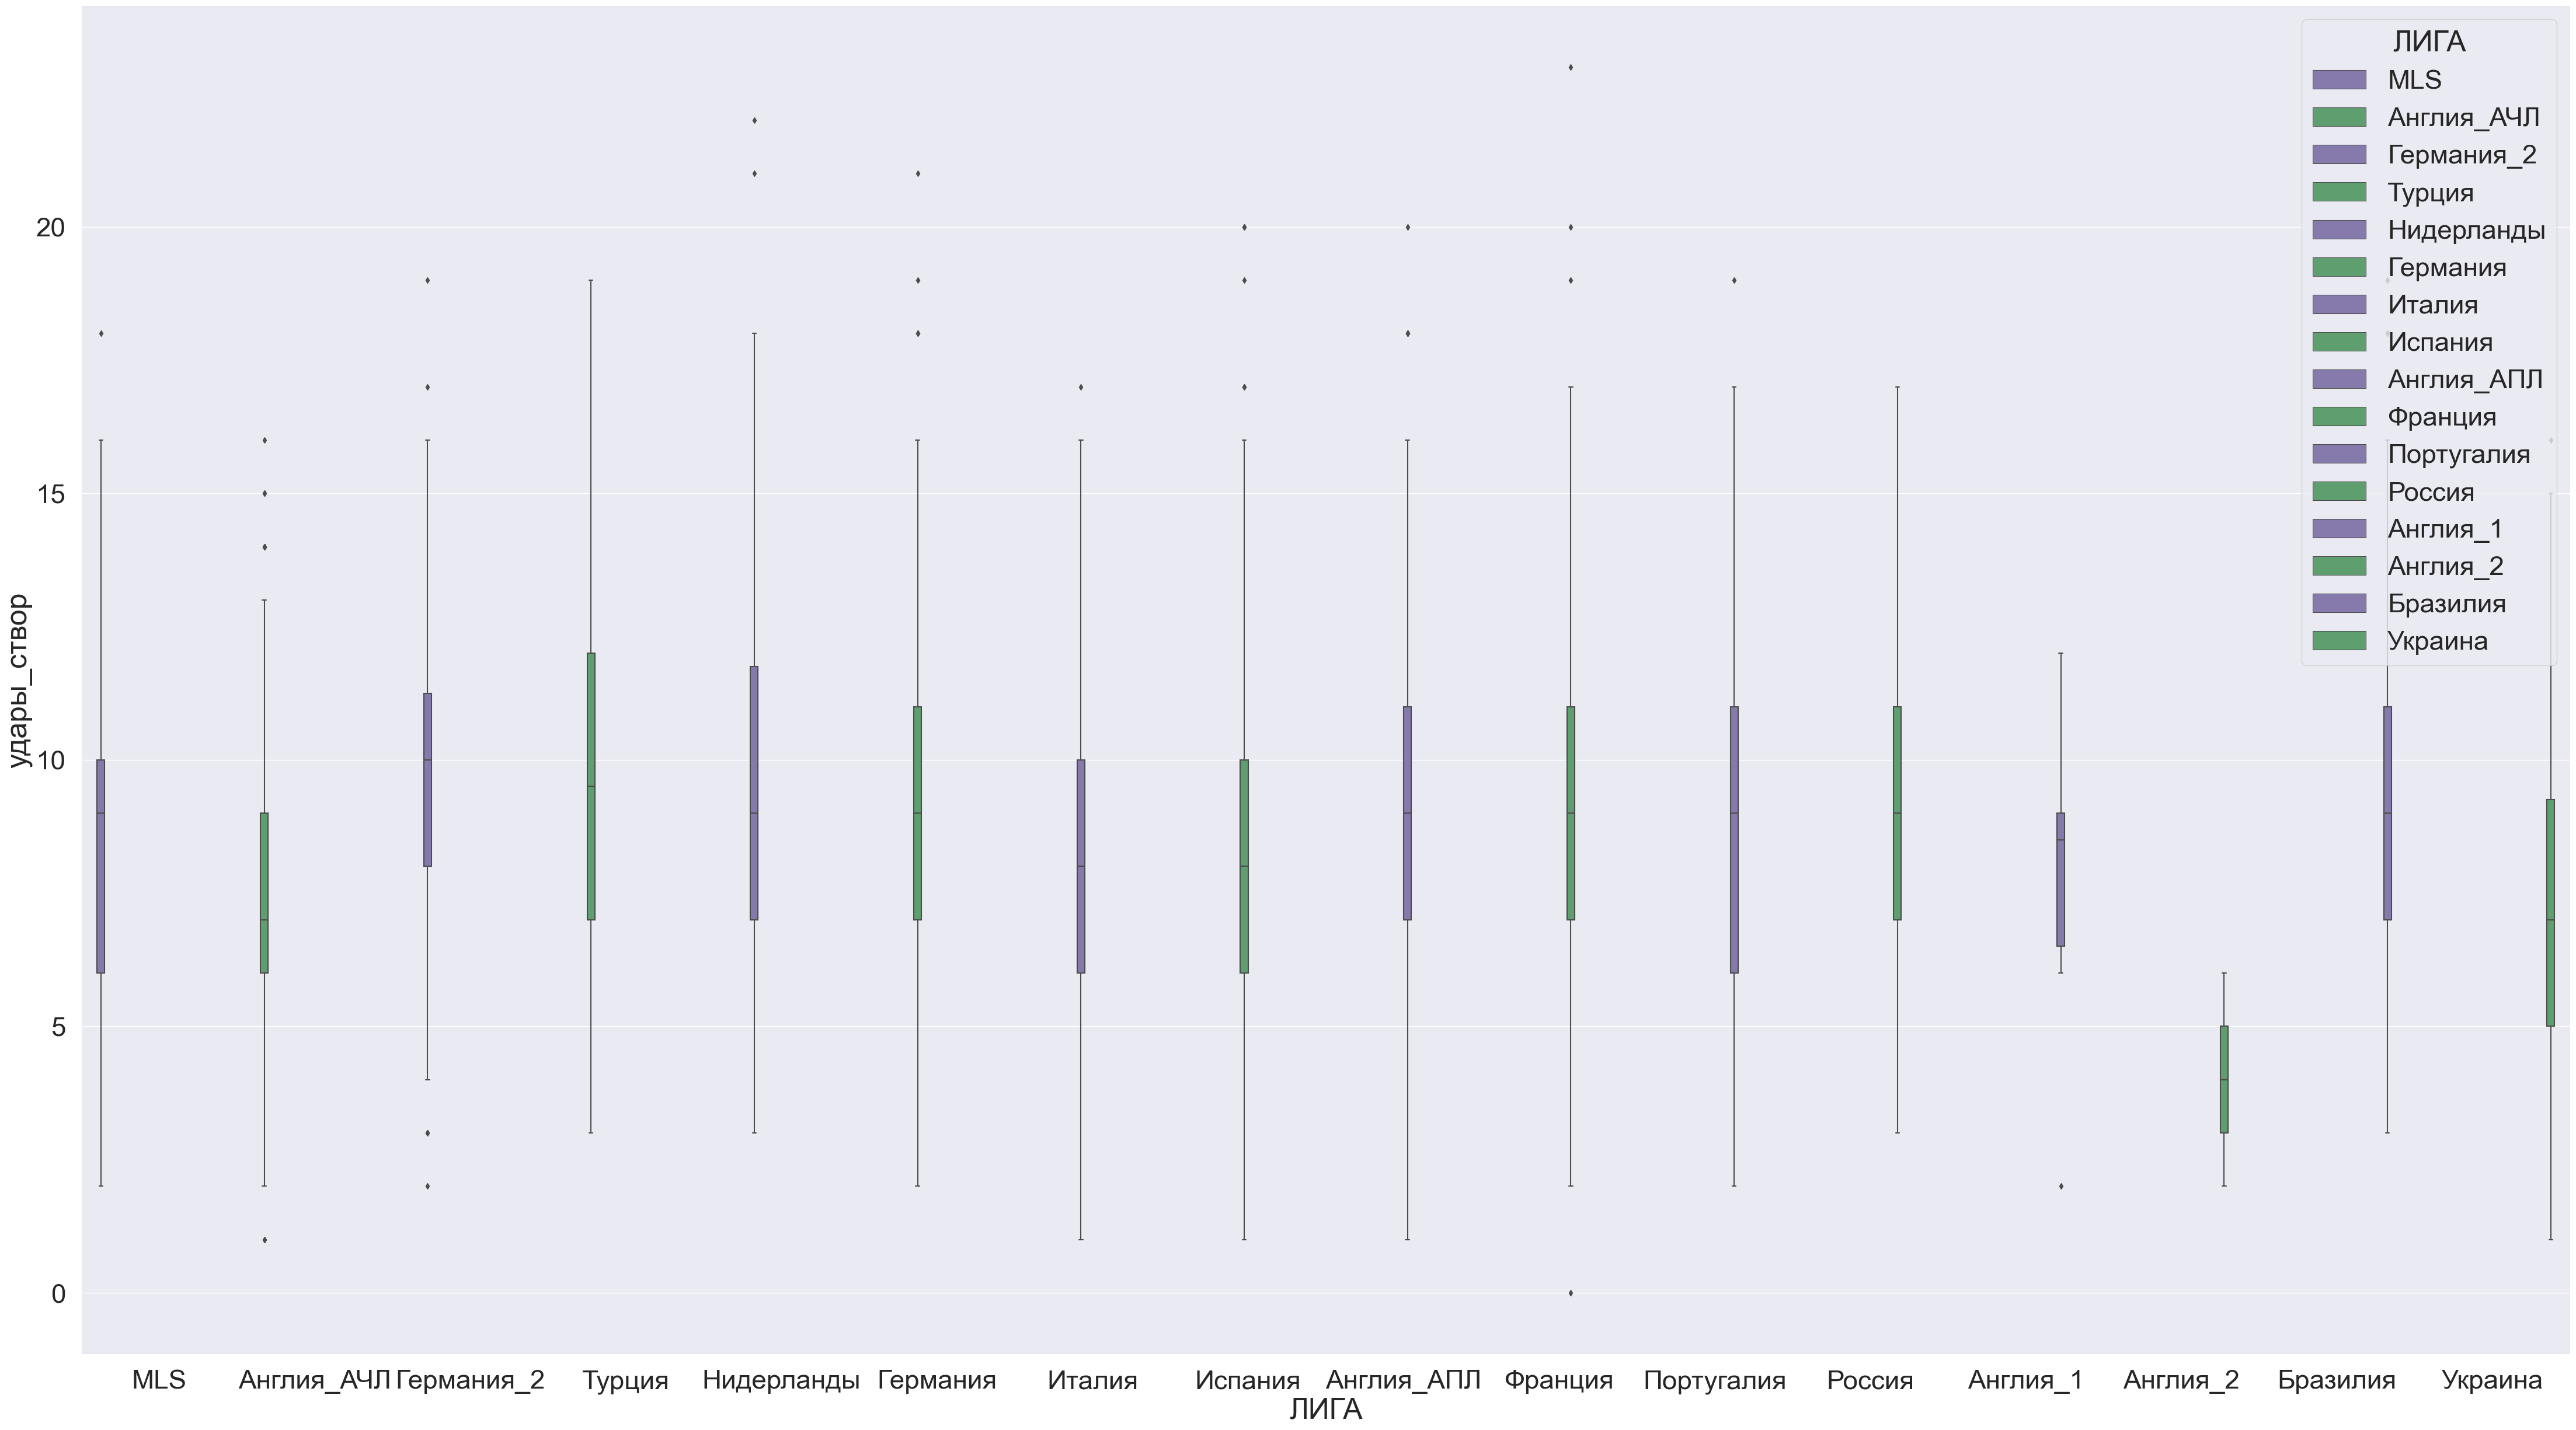

In [46]:
# boxplot удары в створ
grafik_boxplot(data_top_1,'удары_створ')

Наблюдения удары в створ:
* удары в створ хозяева Англия 2 очень очень маленький ящик!!!
* удары в створ хозяева Англия 2 верхняя граница ящика на уровне нижней границы остальных!
* удары в створ есть даже гэп между верхней границей Англия 2 и нижней границей других чемпионатов

**офсайд**  <a id='boxplot_9'></a>

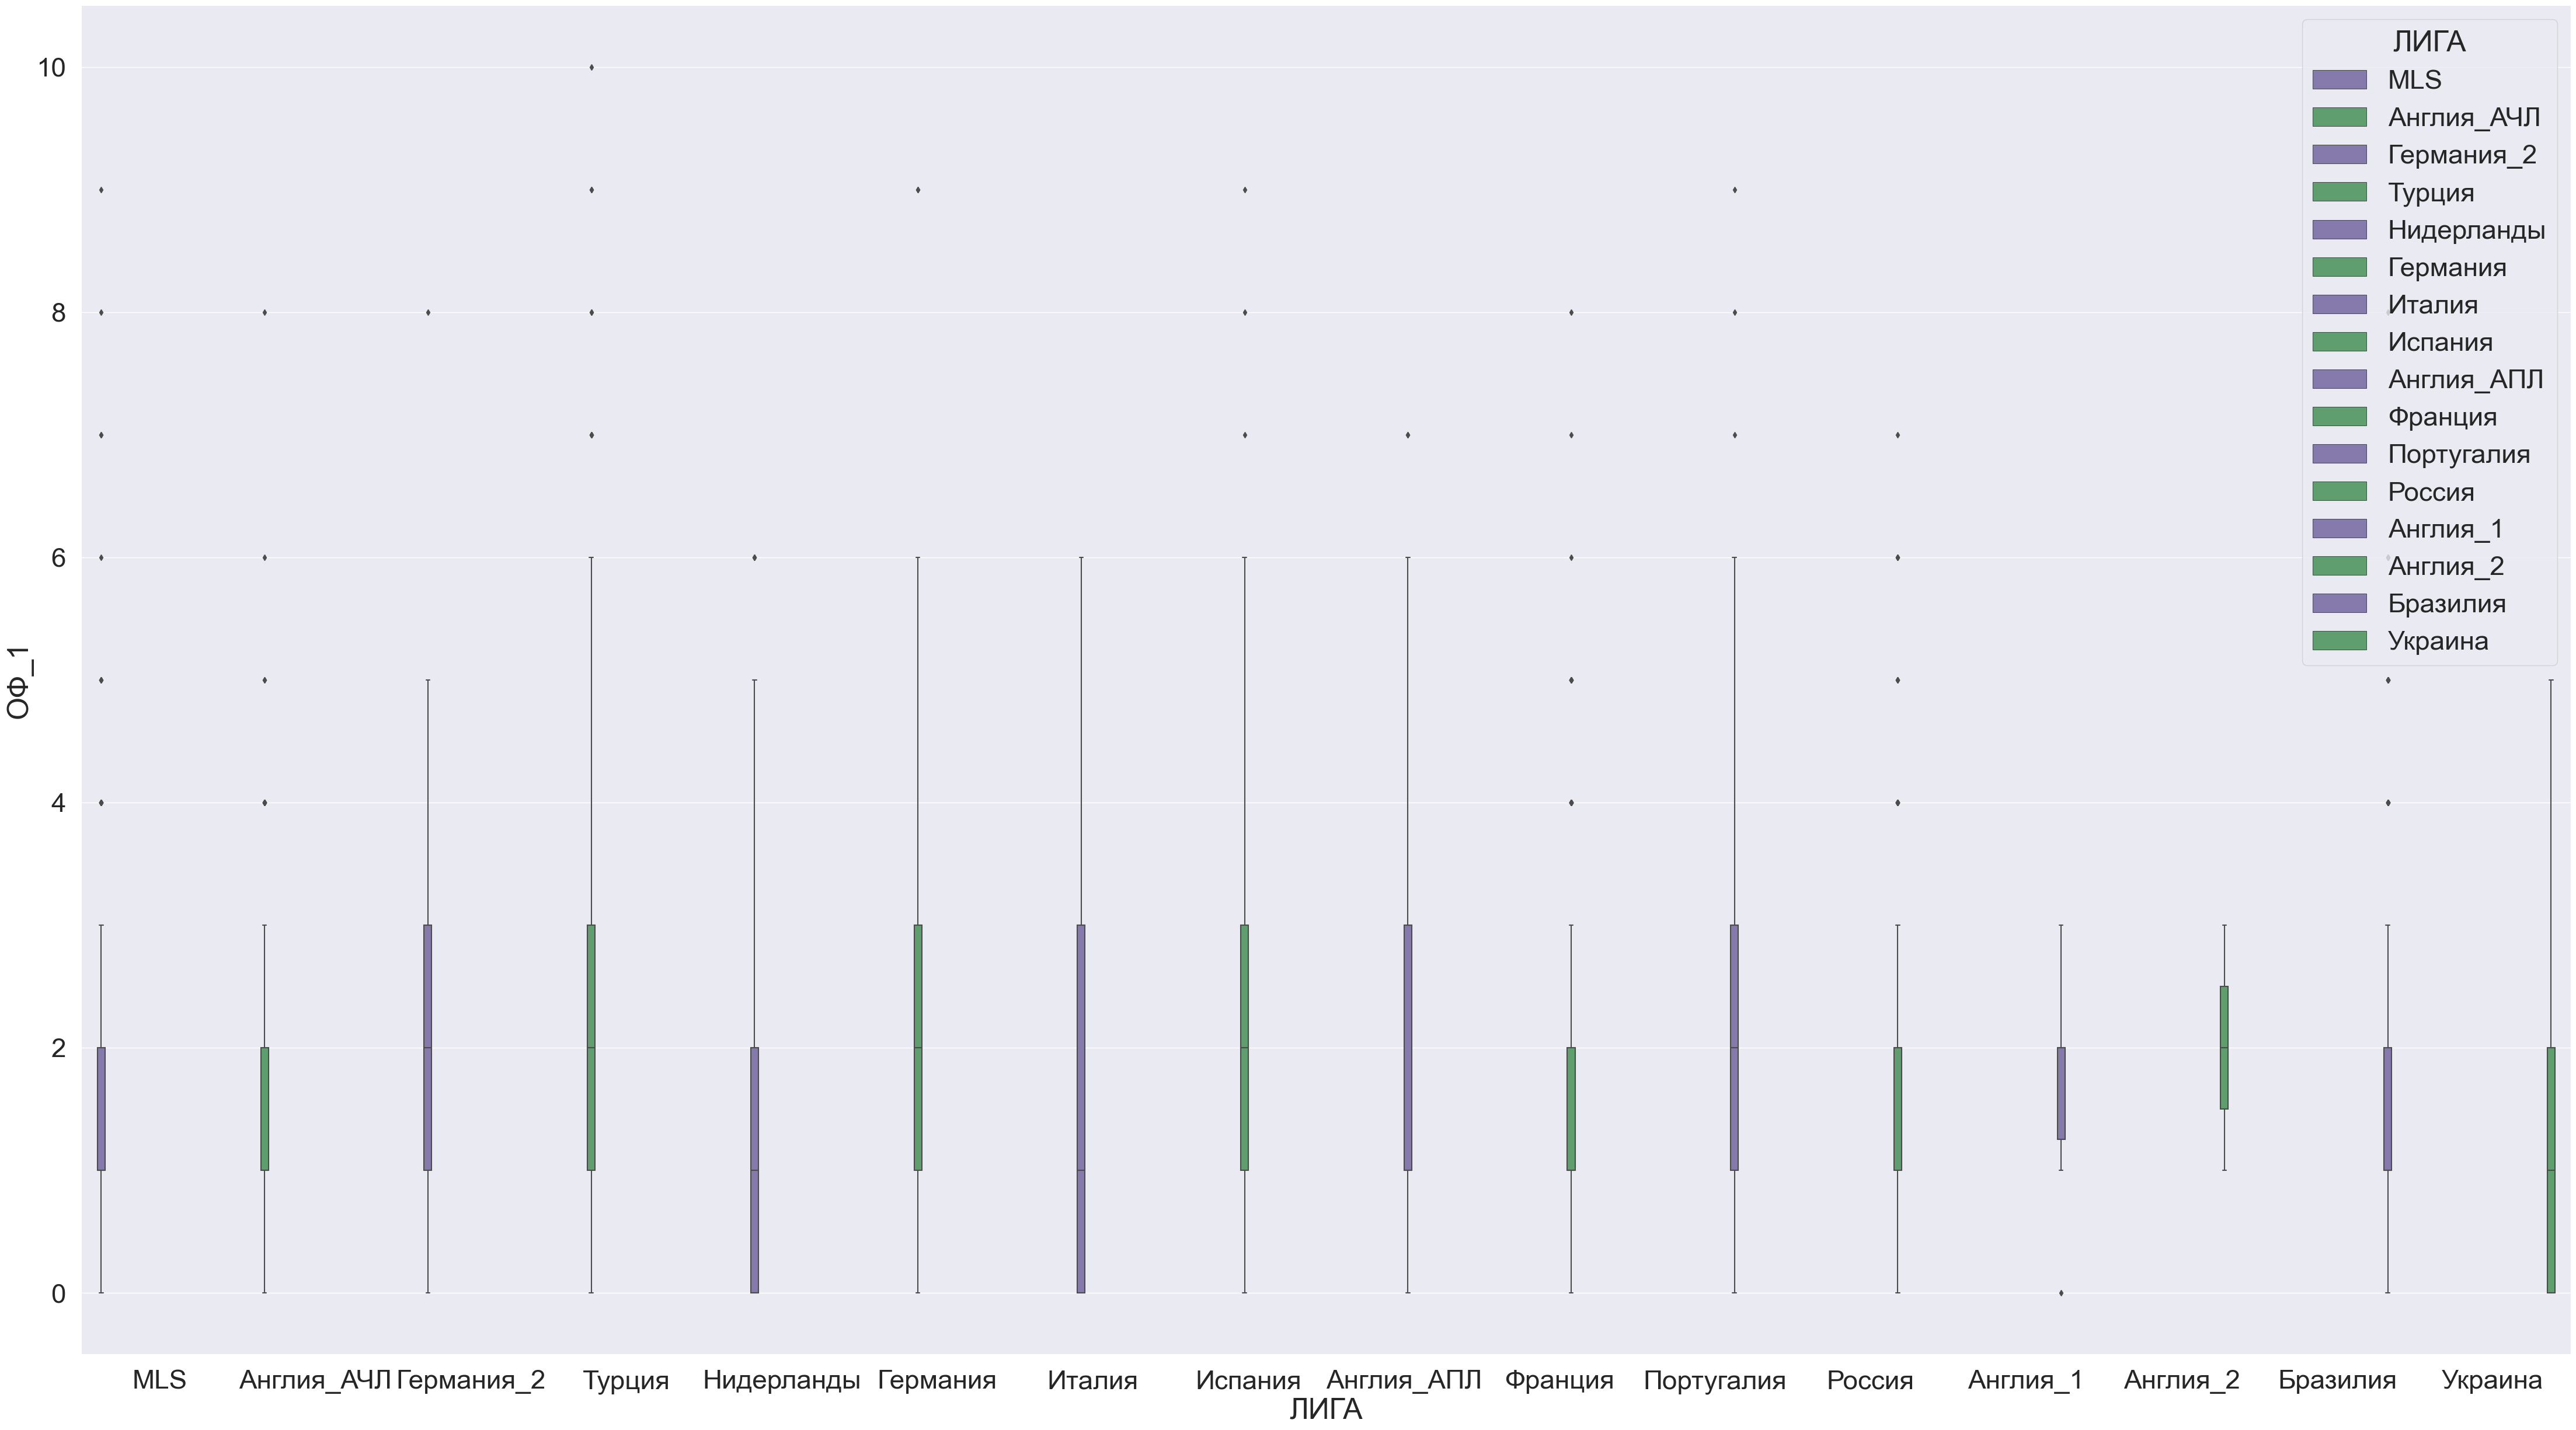

In [47]:
# boxplot офсайд хозяева
grafik_boxplot(data_top_1,'ОФ_1')

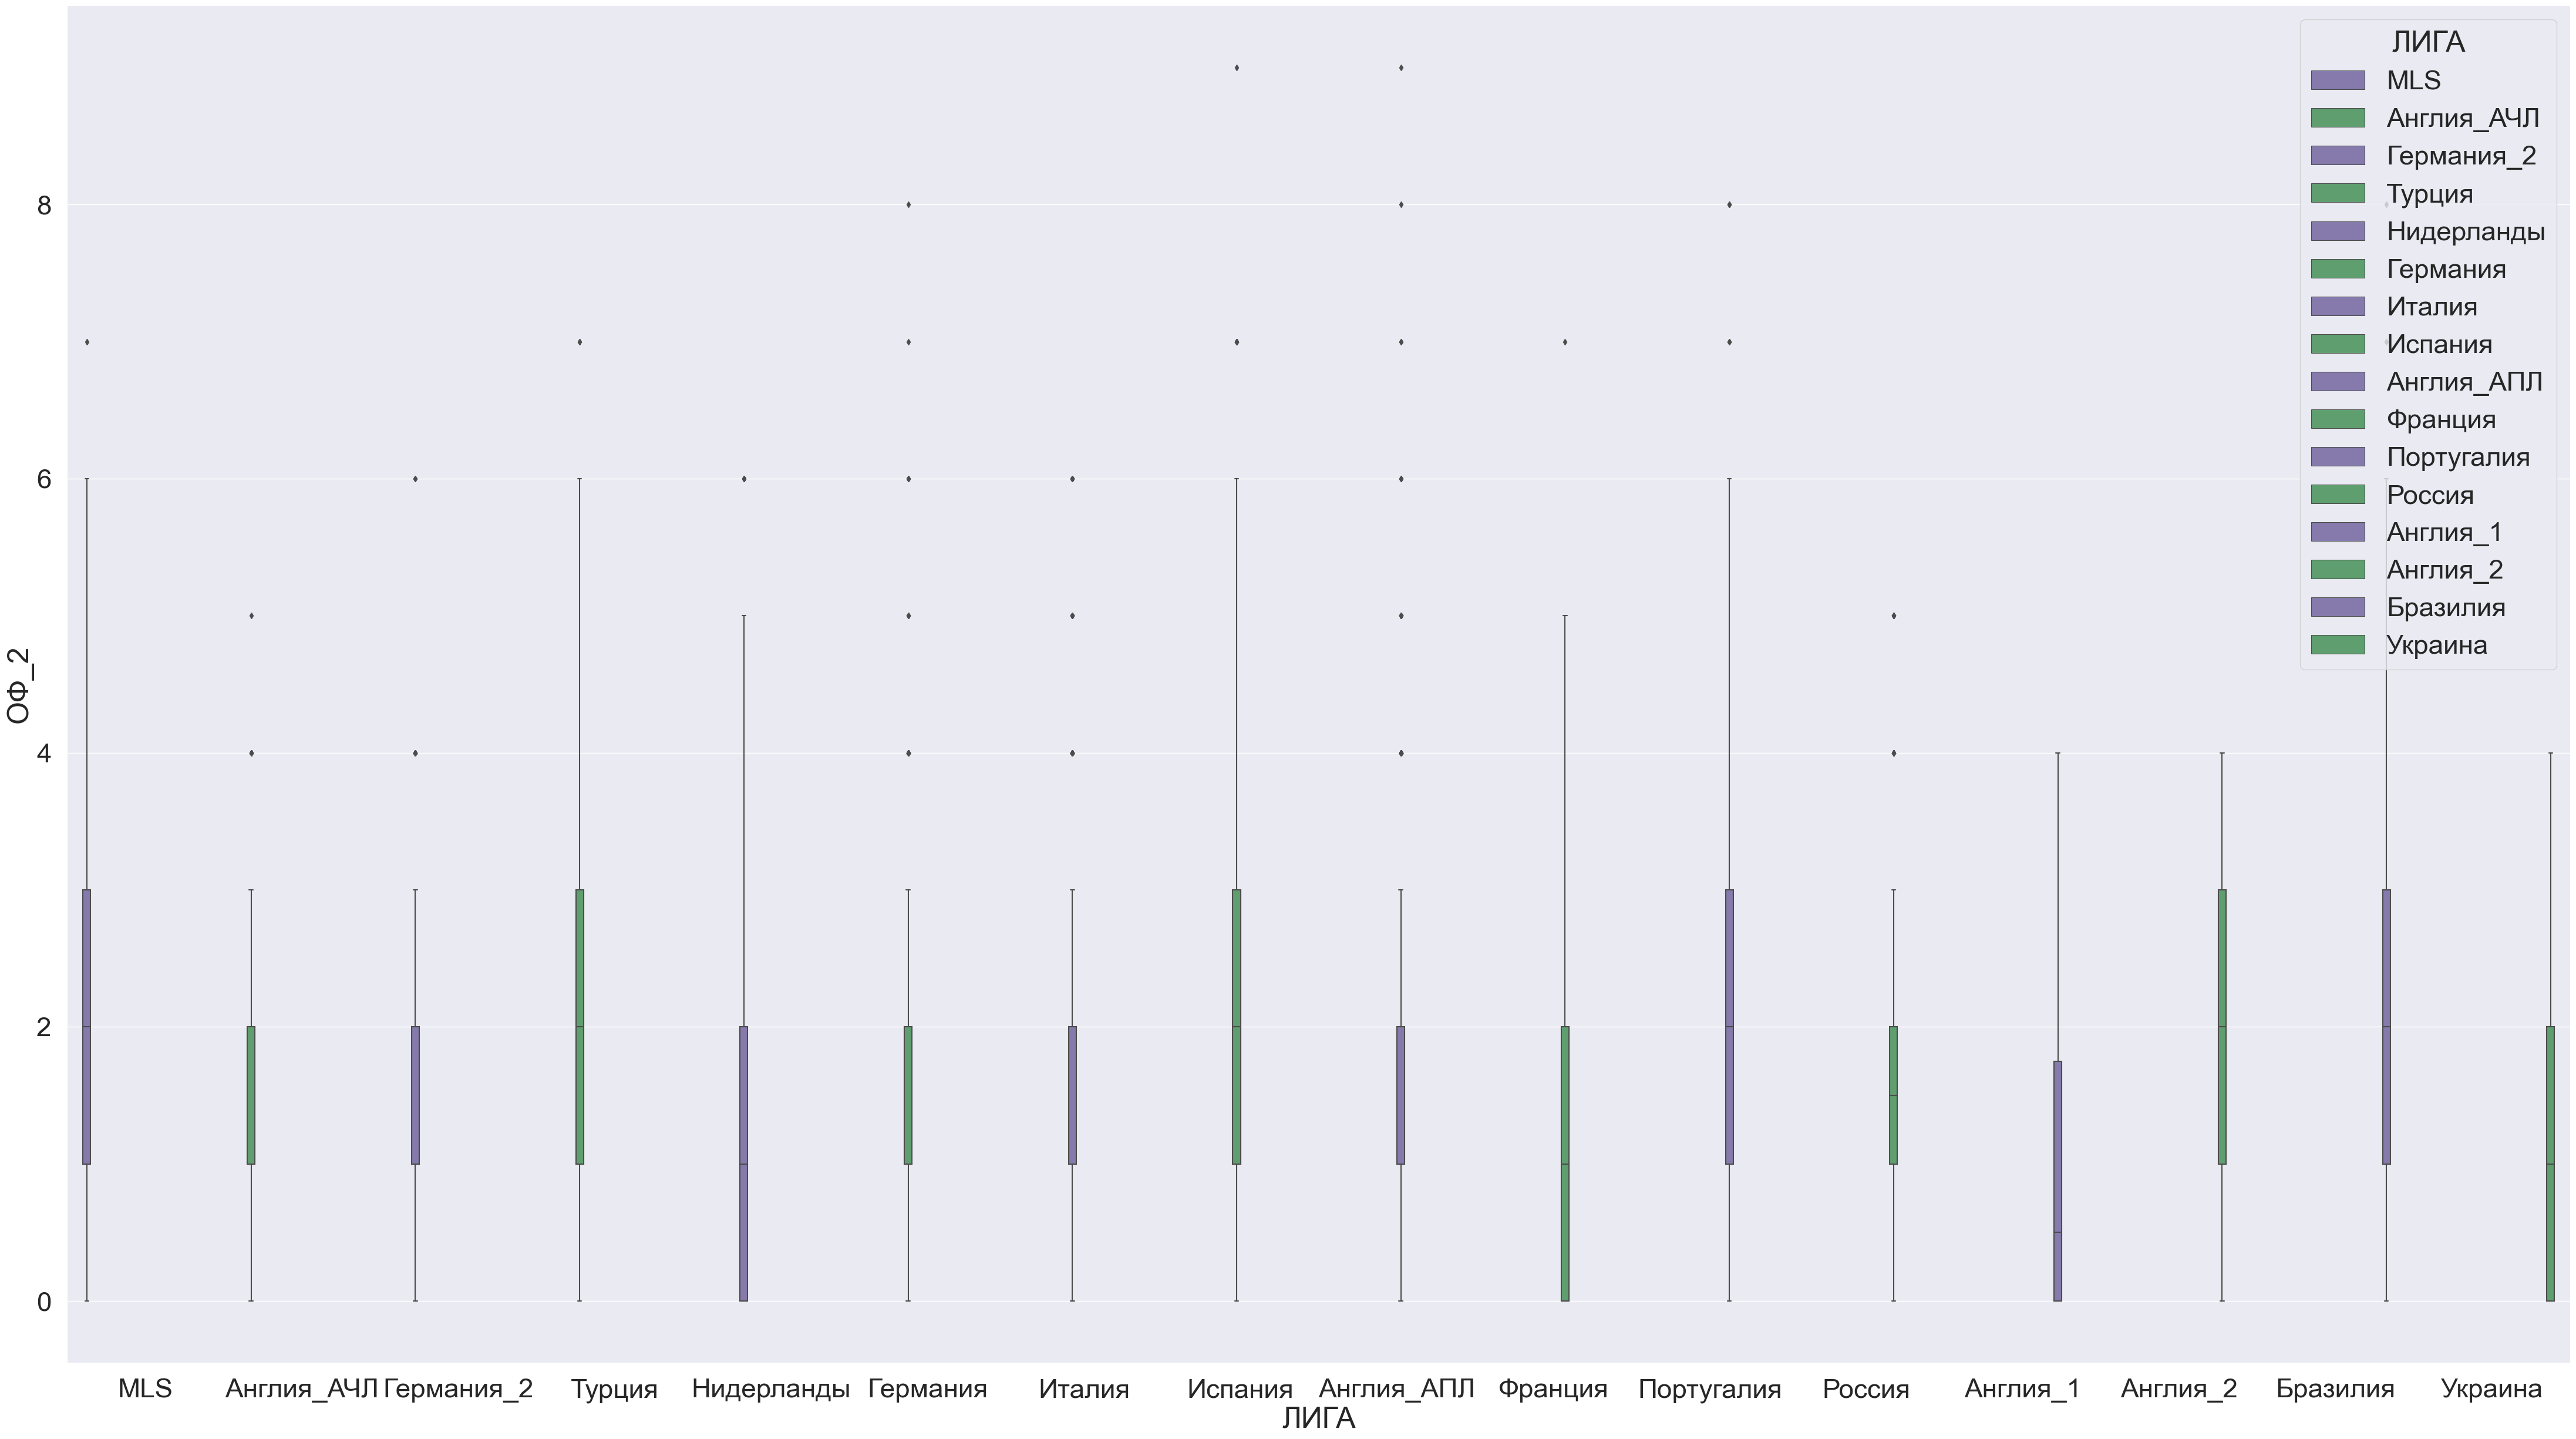

In [48]:
# boxplot офсайд гости
grafik_boxplot(data_top_1,'ОФ_2')

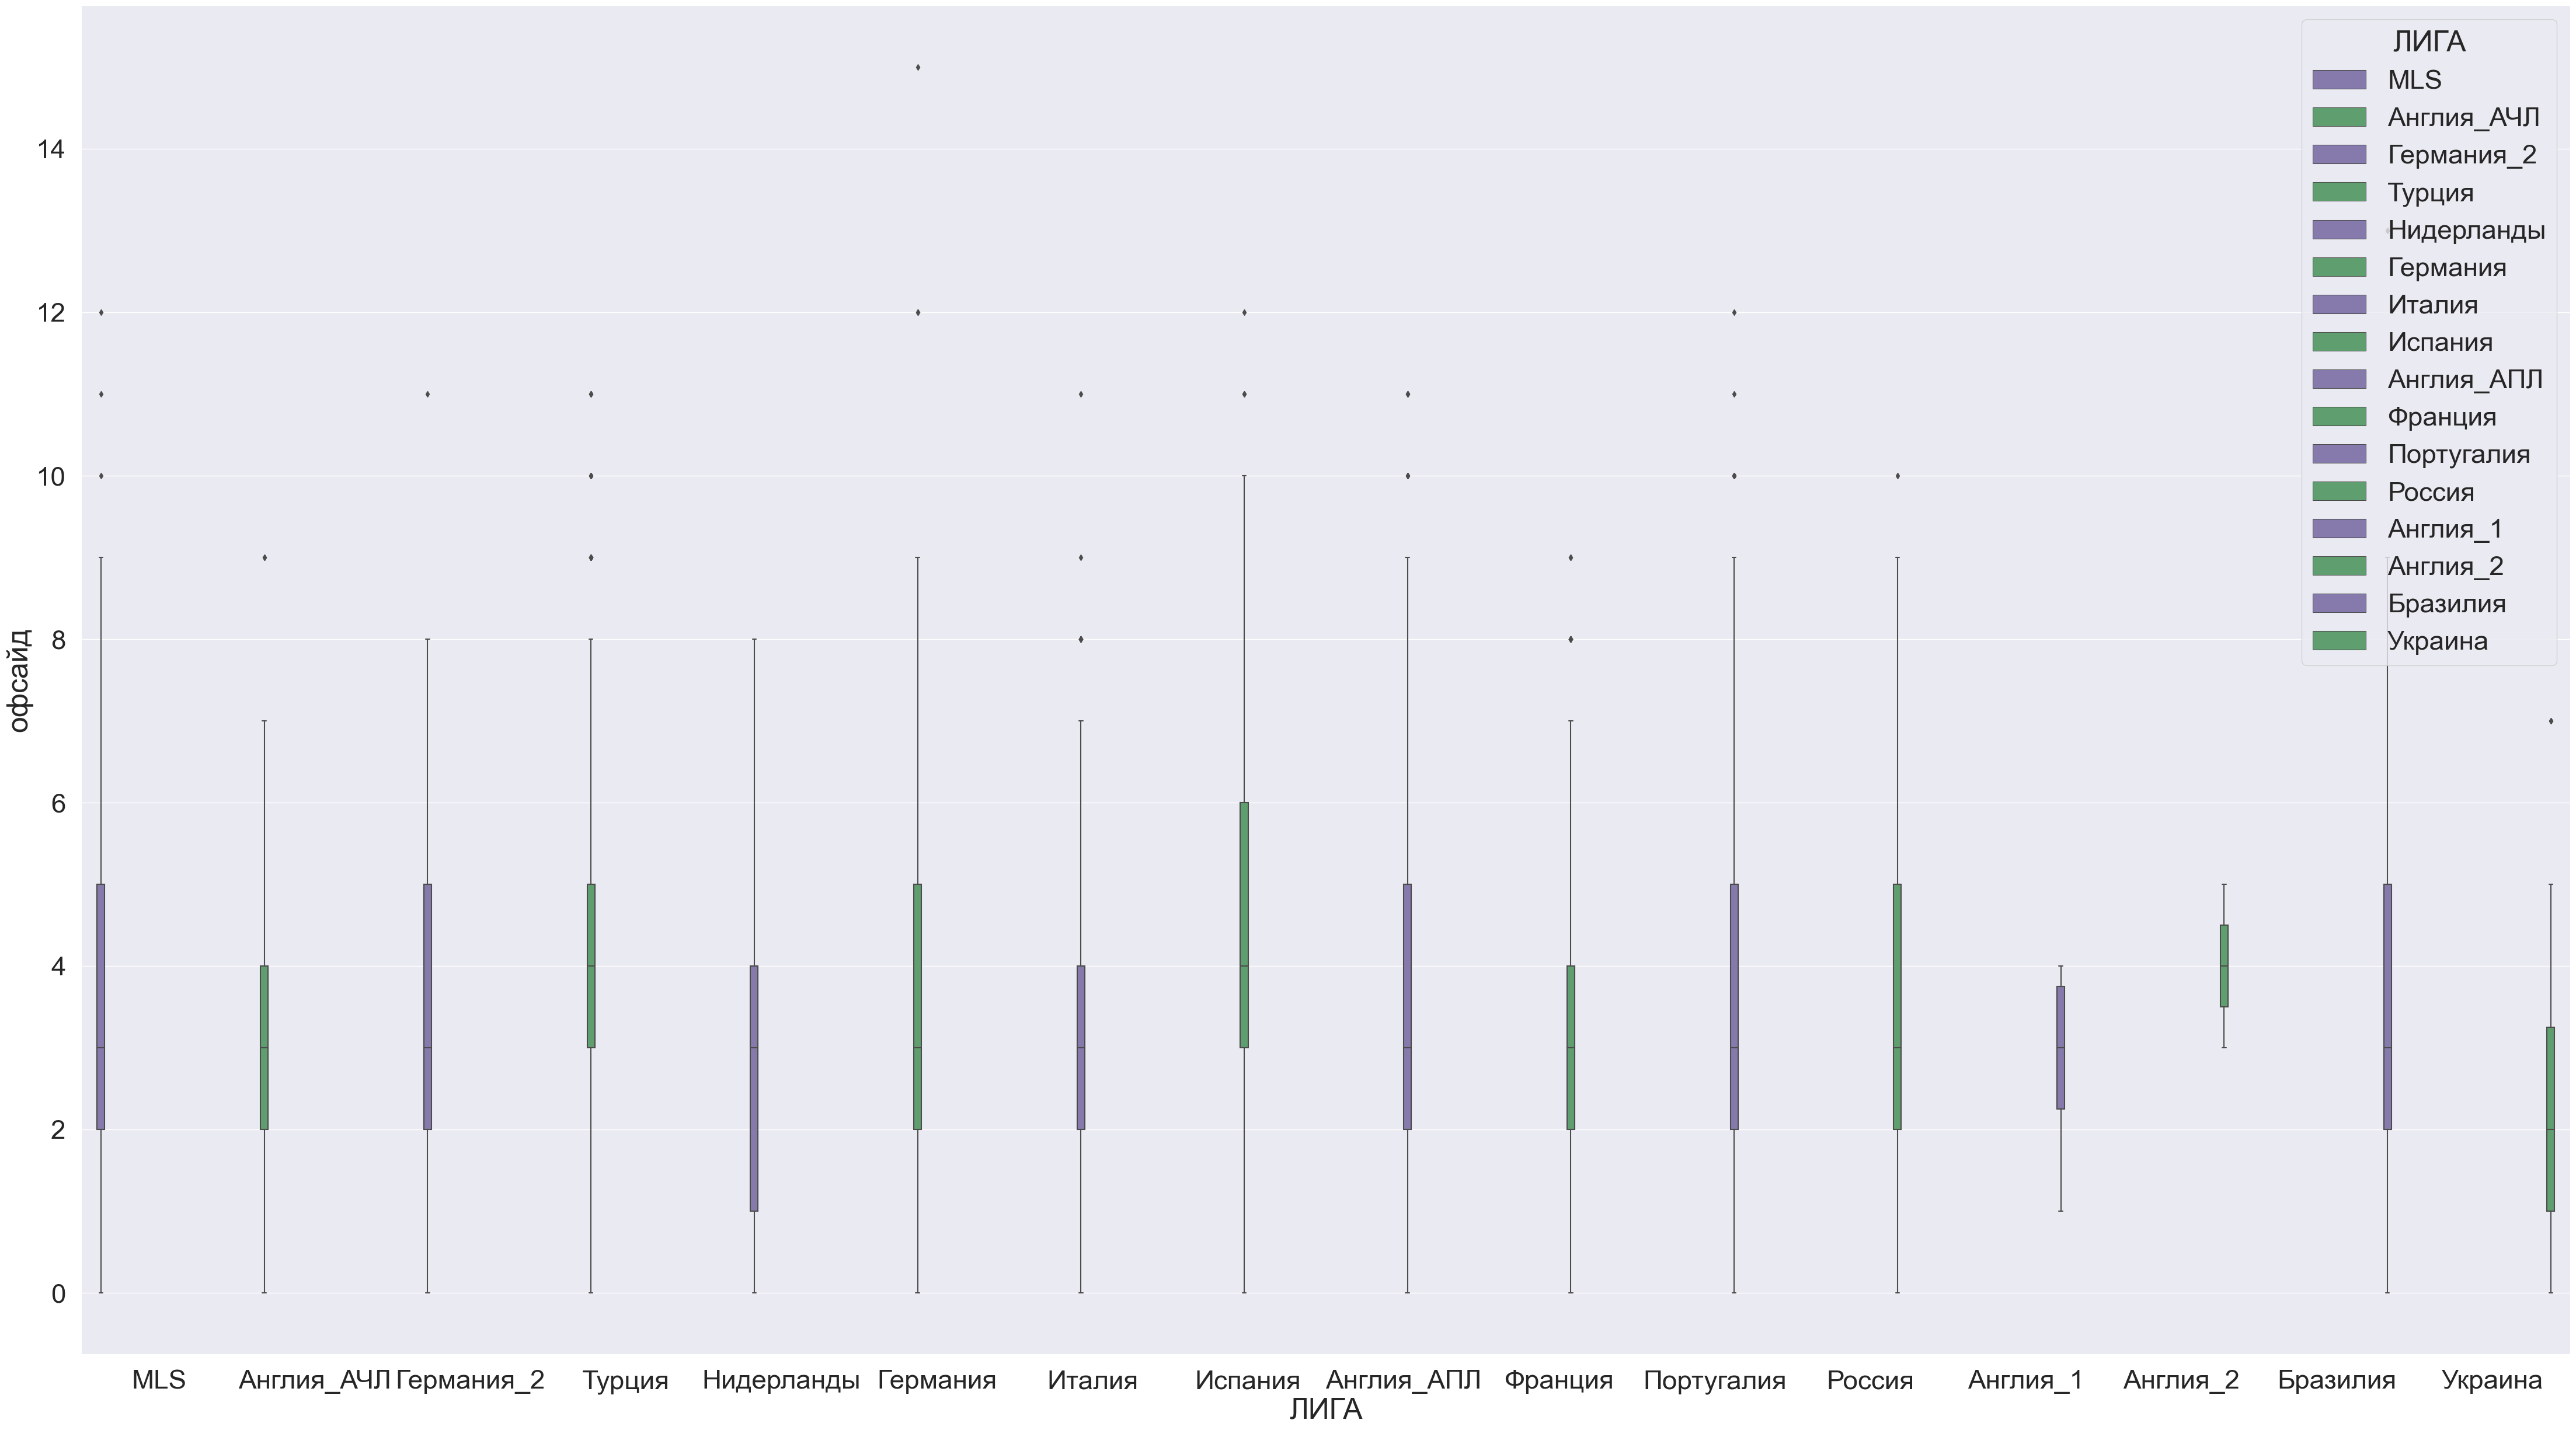

In [49]:
# boxplot офсайд
grafik_boxplot(data_top_1,'офсайд')

Наблюдения офсайд:
* Англия_2 офсайды за матч ящик вместе с усами меньше чем остальные ящики!!!

**ауты**  <a id='boxplot_10'></a>

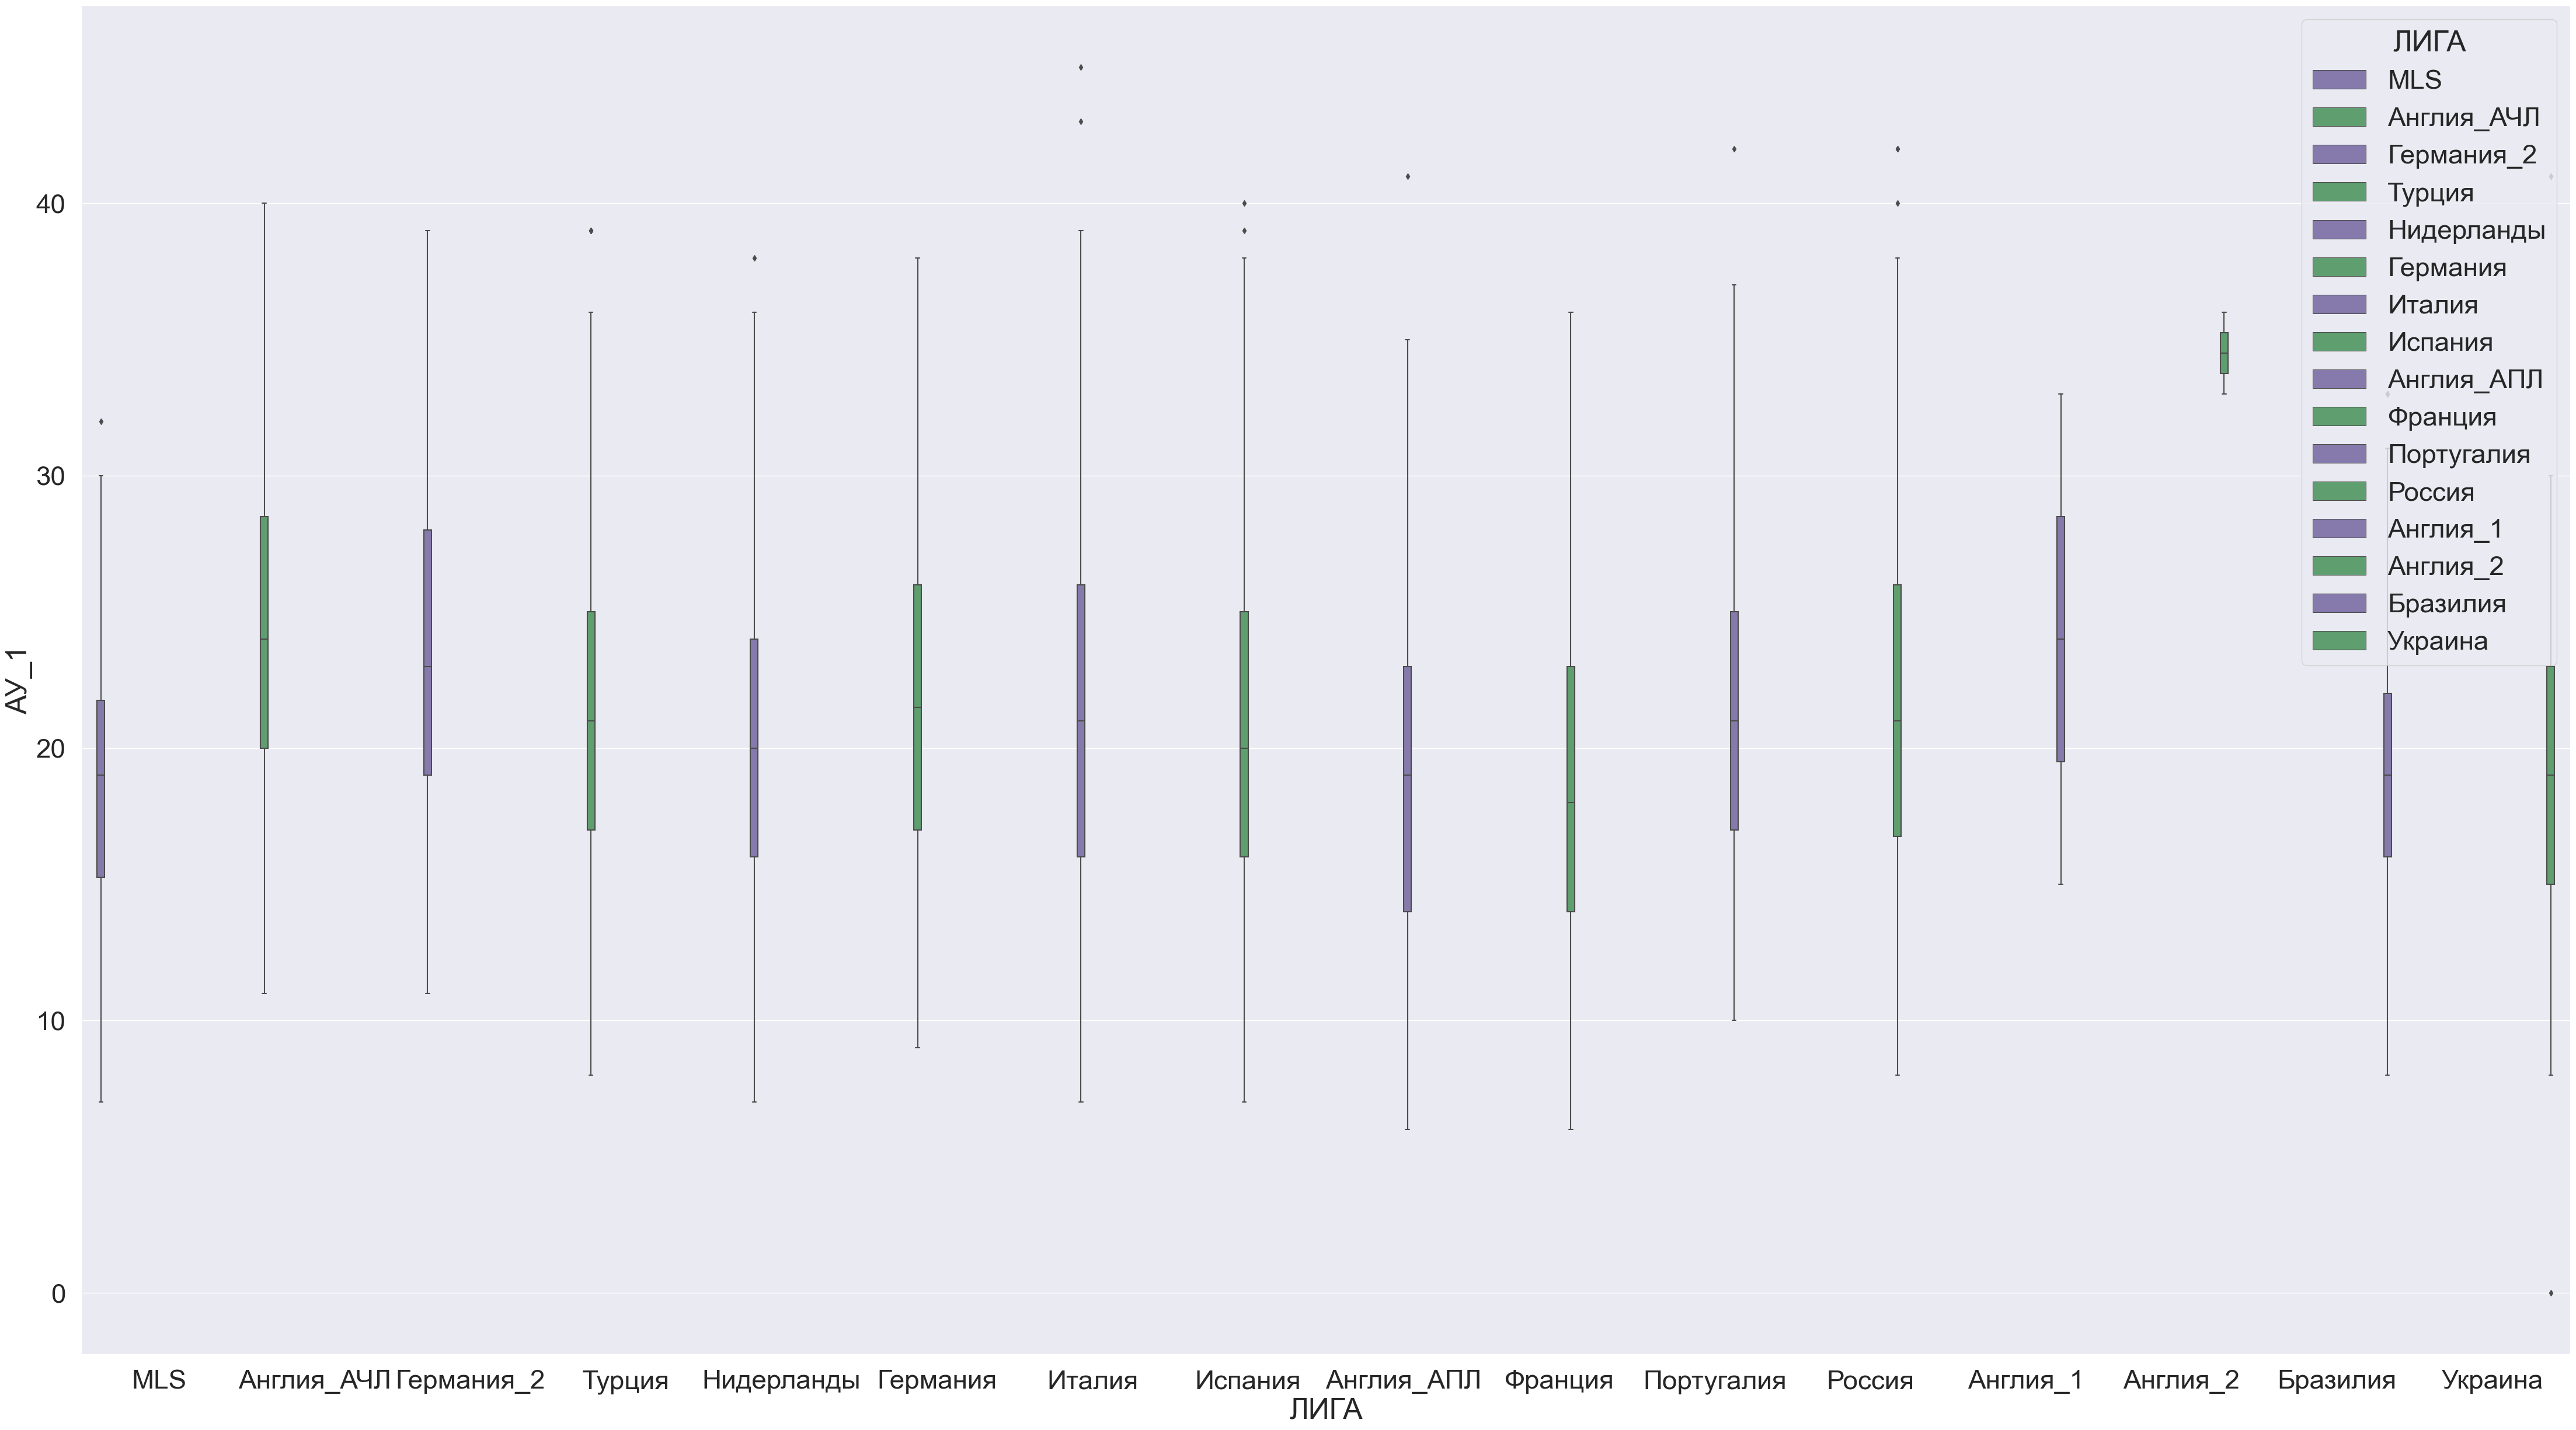

In [50]:
# boxplot ауты хозяева
grafik_boxplot(data_top_1,'АУ_1')

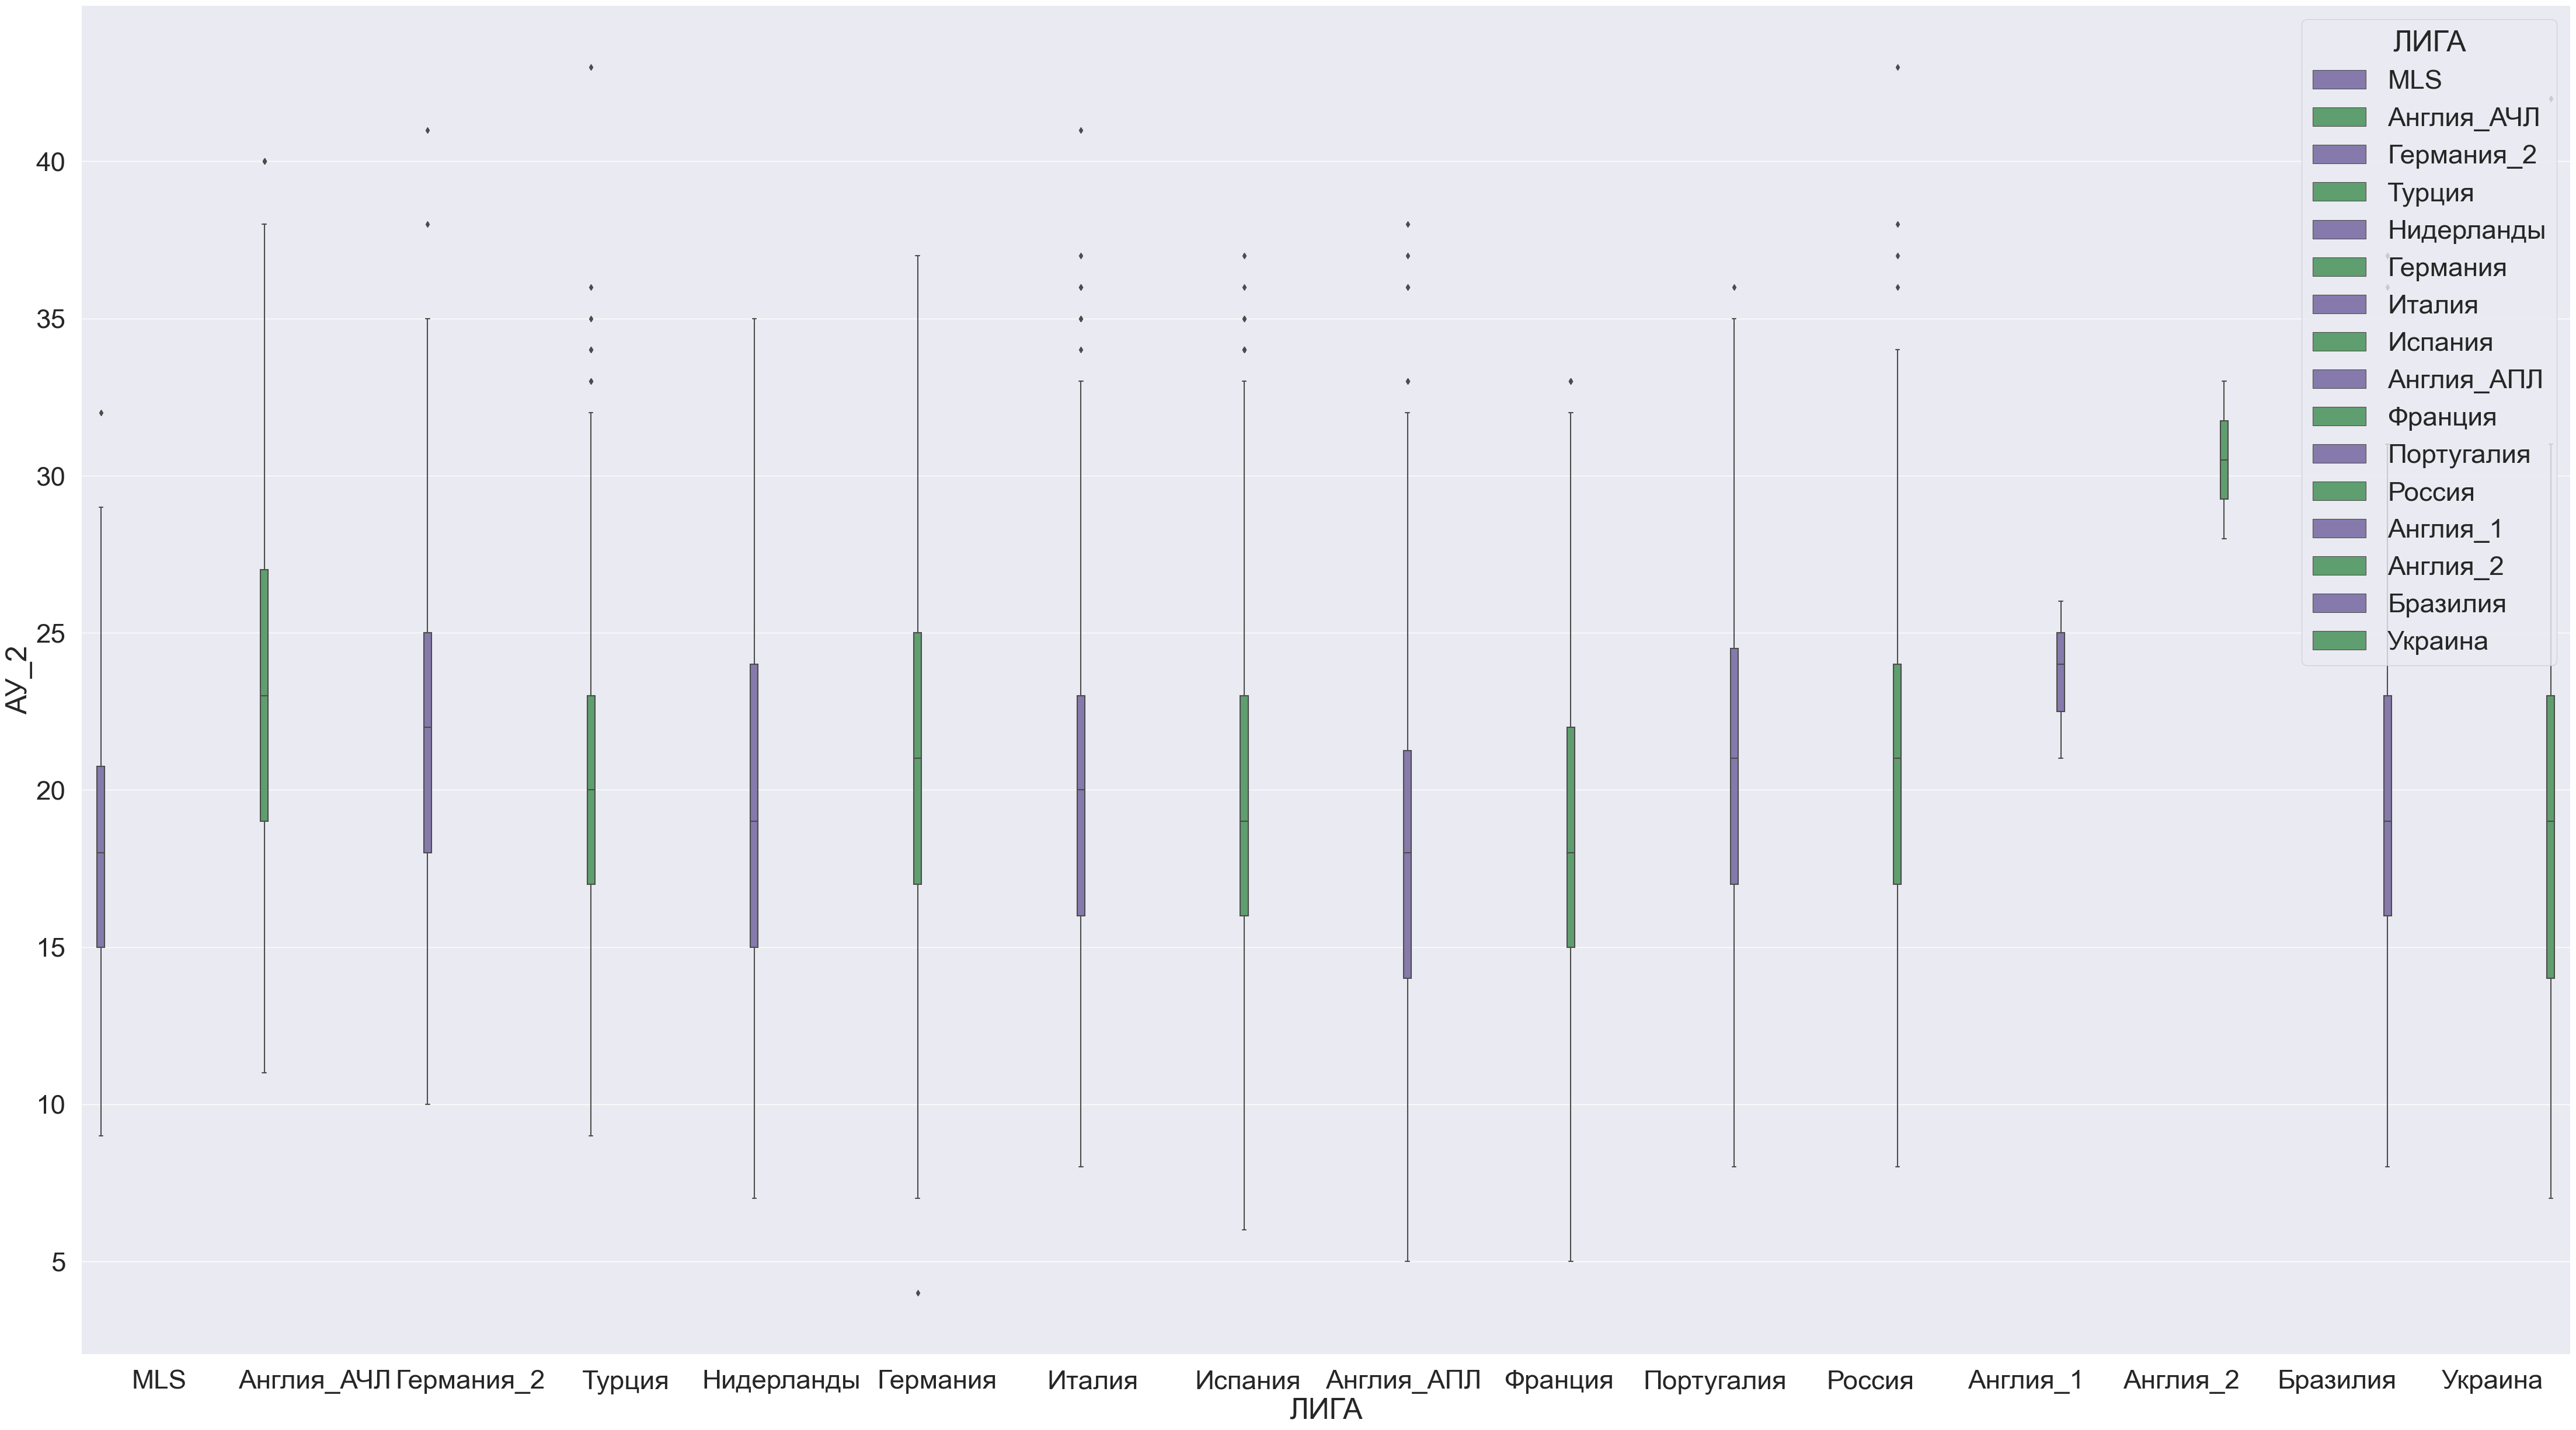

In [51]:
# boxplot ауты гости
grafik_boxplot(data_top_1,'АУ_2')

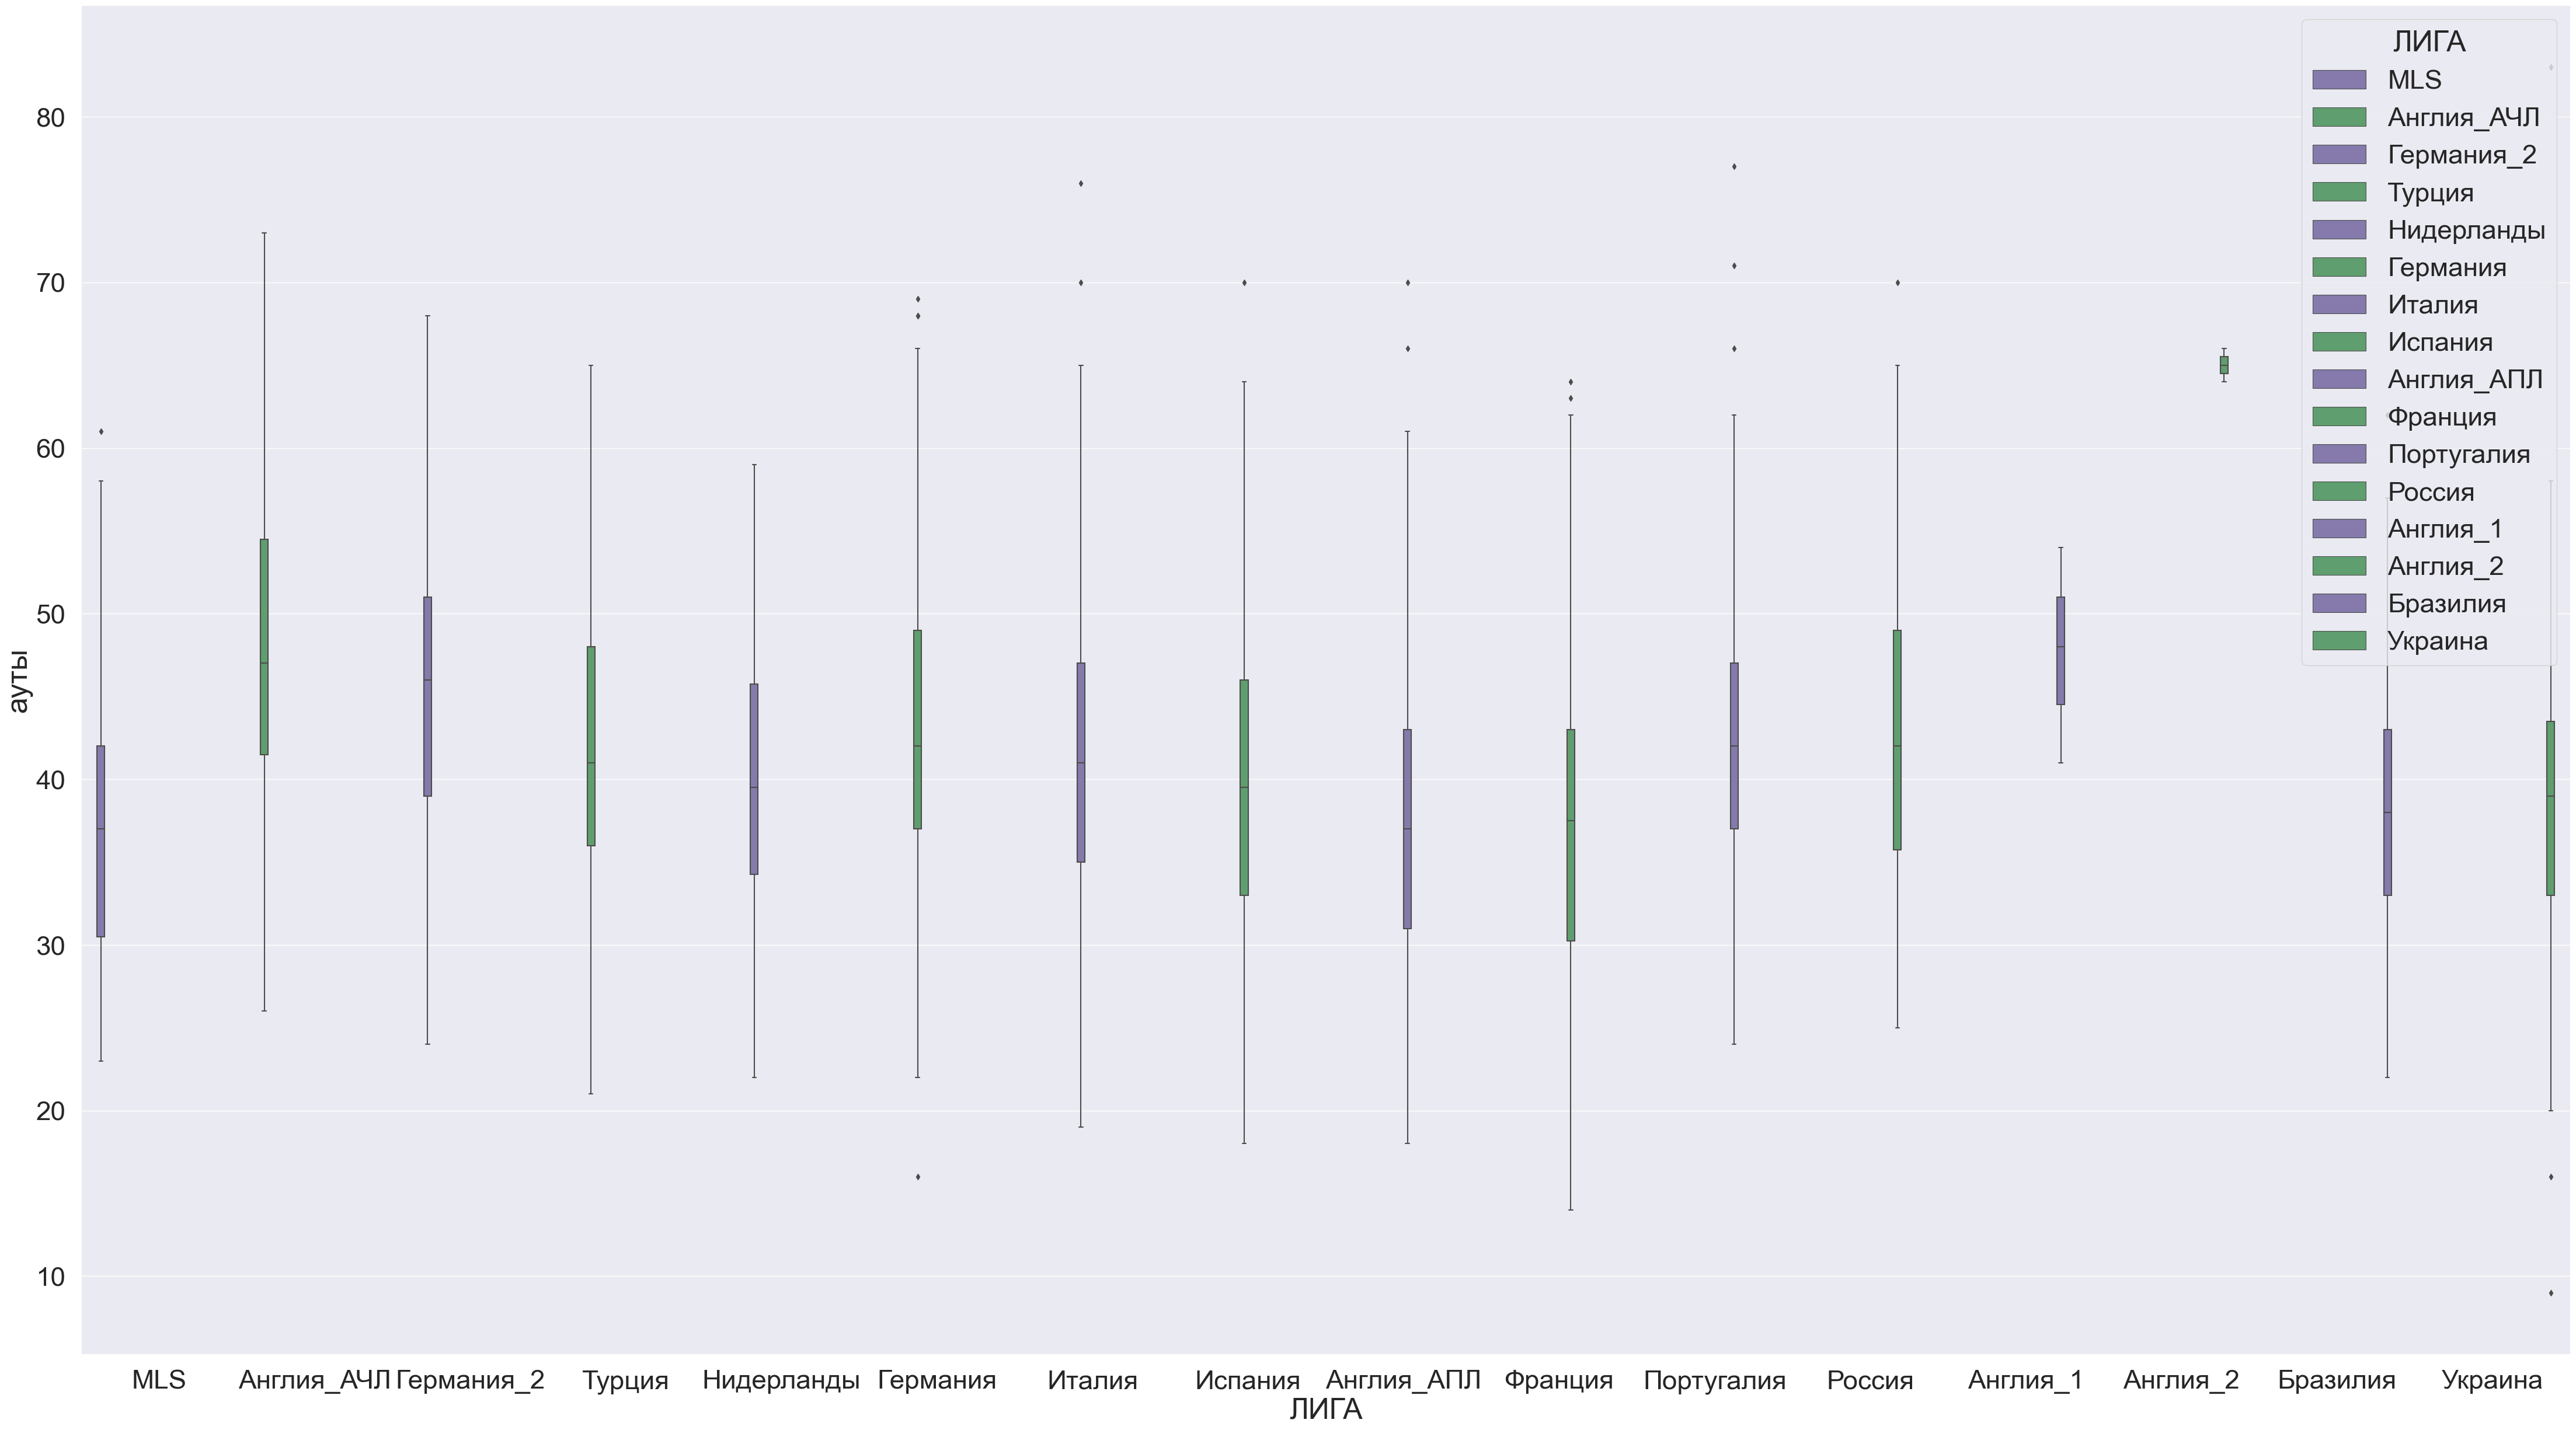

In [52]:
# boxplot ауты 
grafik_boxplot(data_top_1,'ауты')

Наблюдения ауты:
* Англия_2 настолько данные компактные, что нужно проверить насколько они соответствуют действительности!!!
* Англия_1 дома гости и в меньшей степени обе команды данные очень компактны!

**удары от ворот**  <a id='boxplot_11'></a>

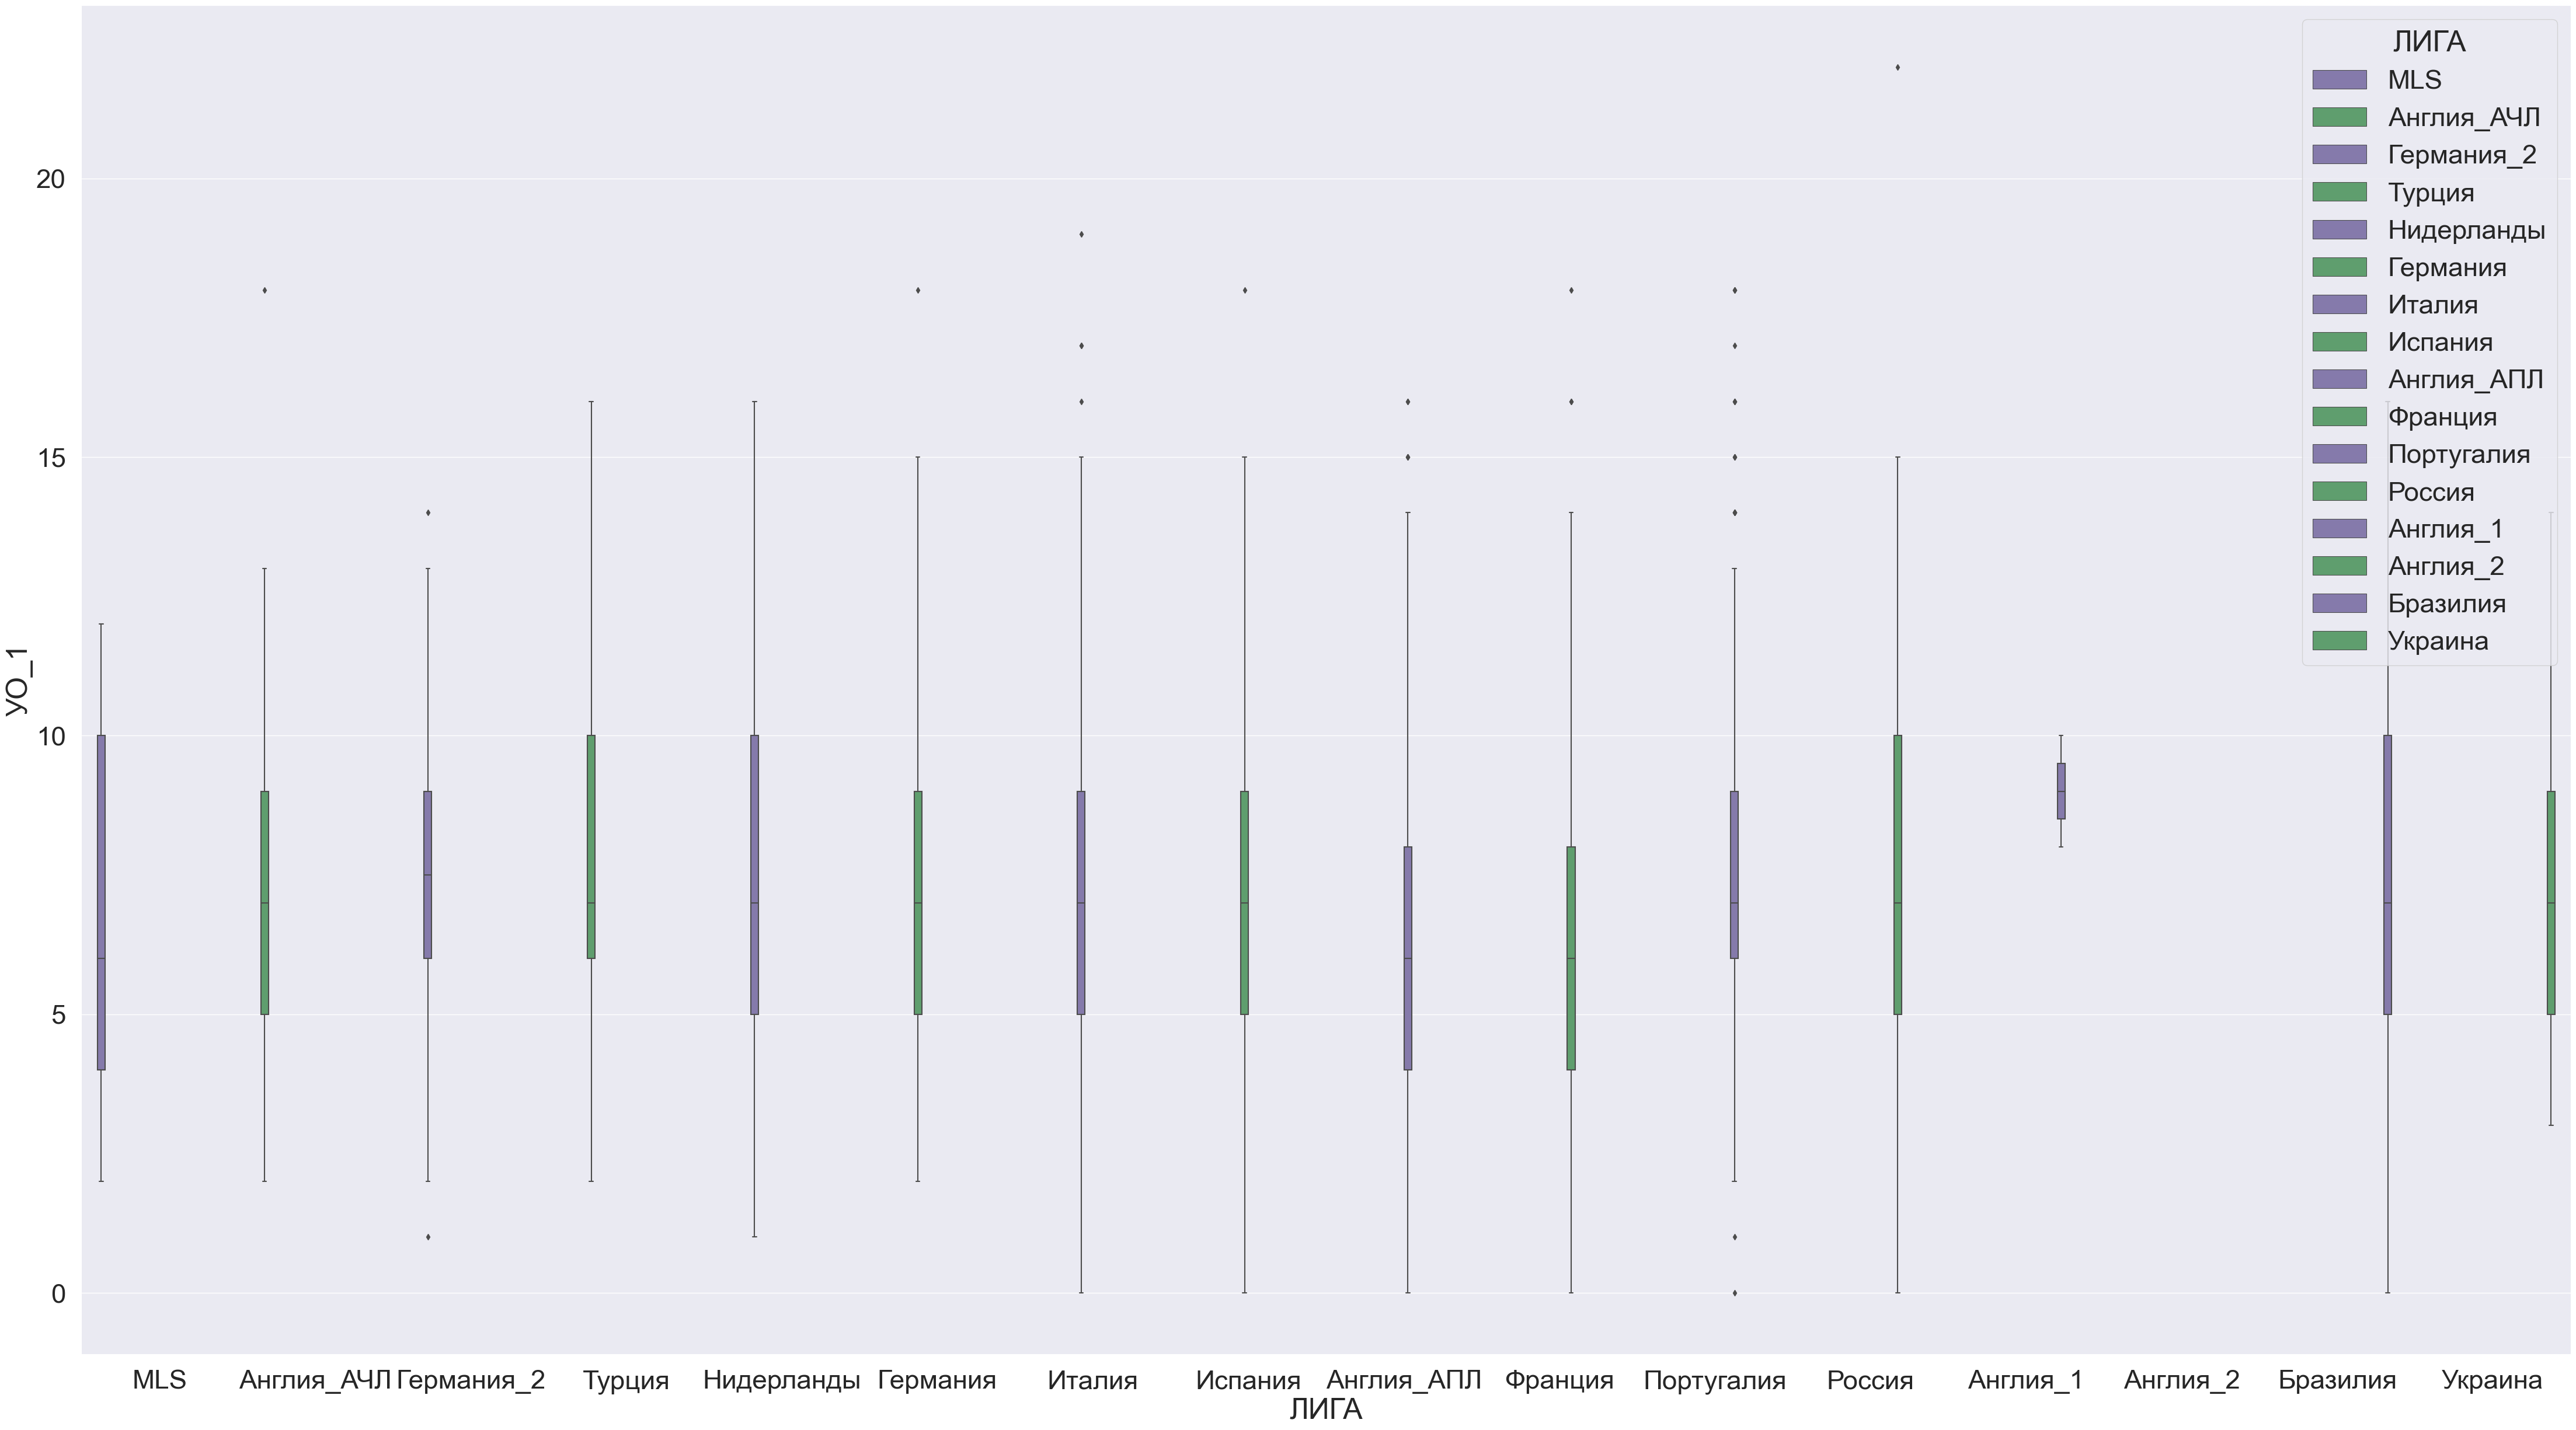

In [53]:
# boxplot удары от ворот хозяева
grafik_boxplot(data_top_1,'УО_1')

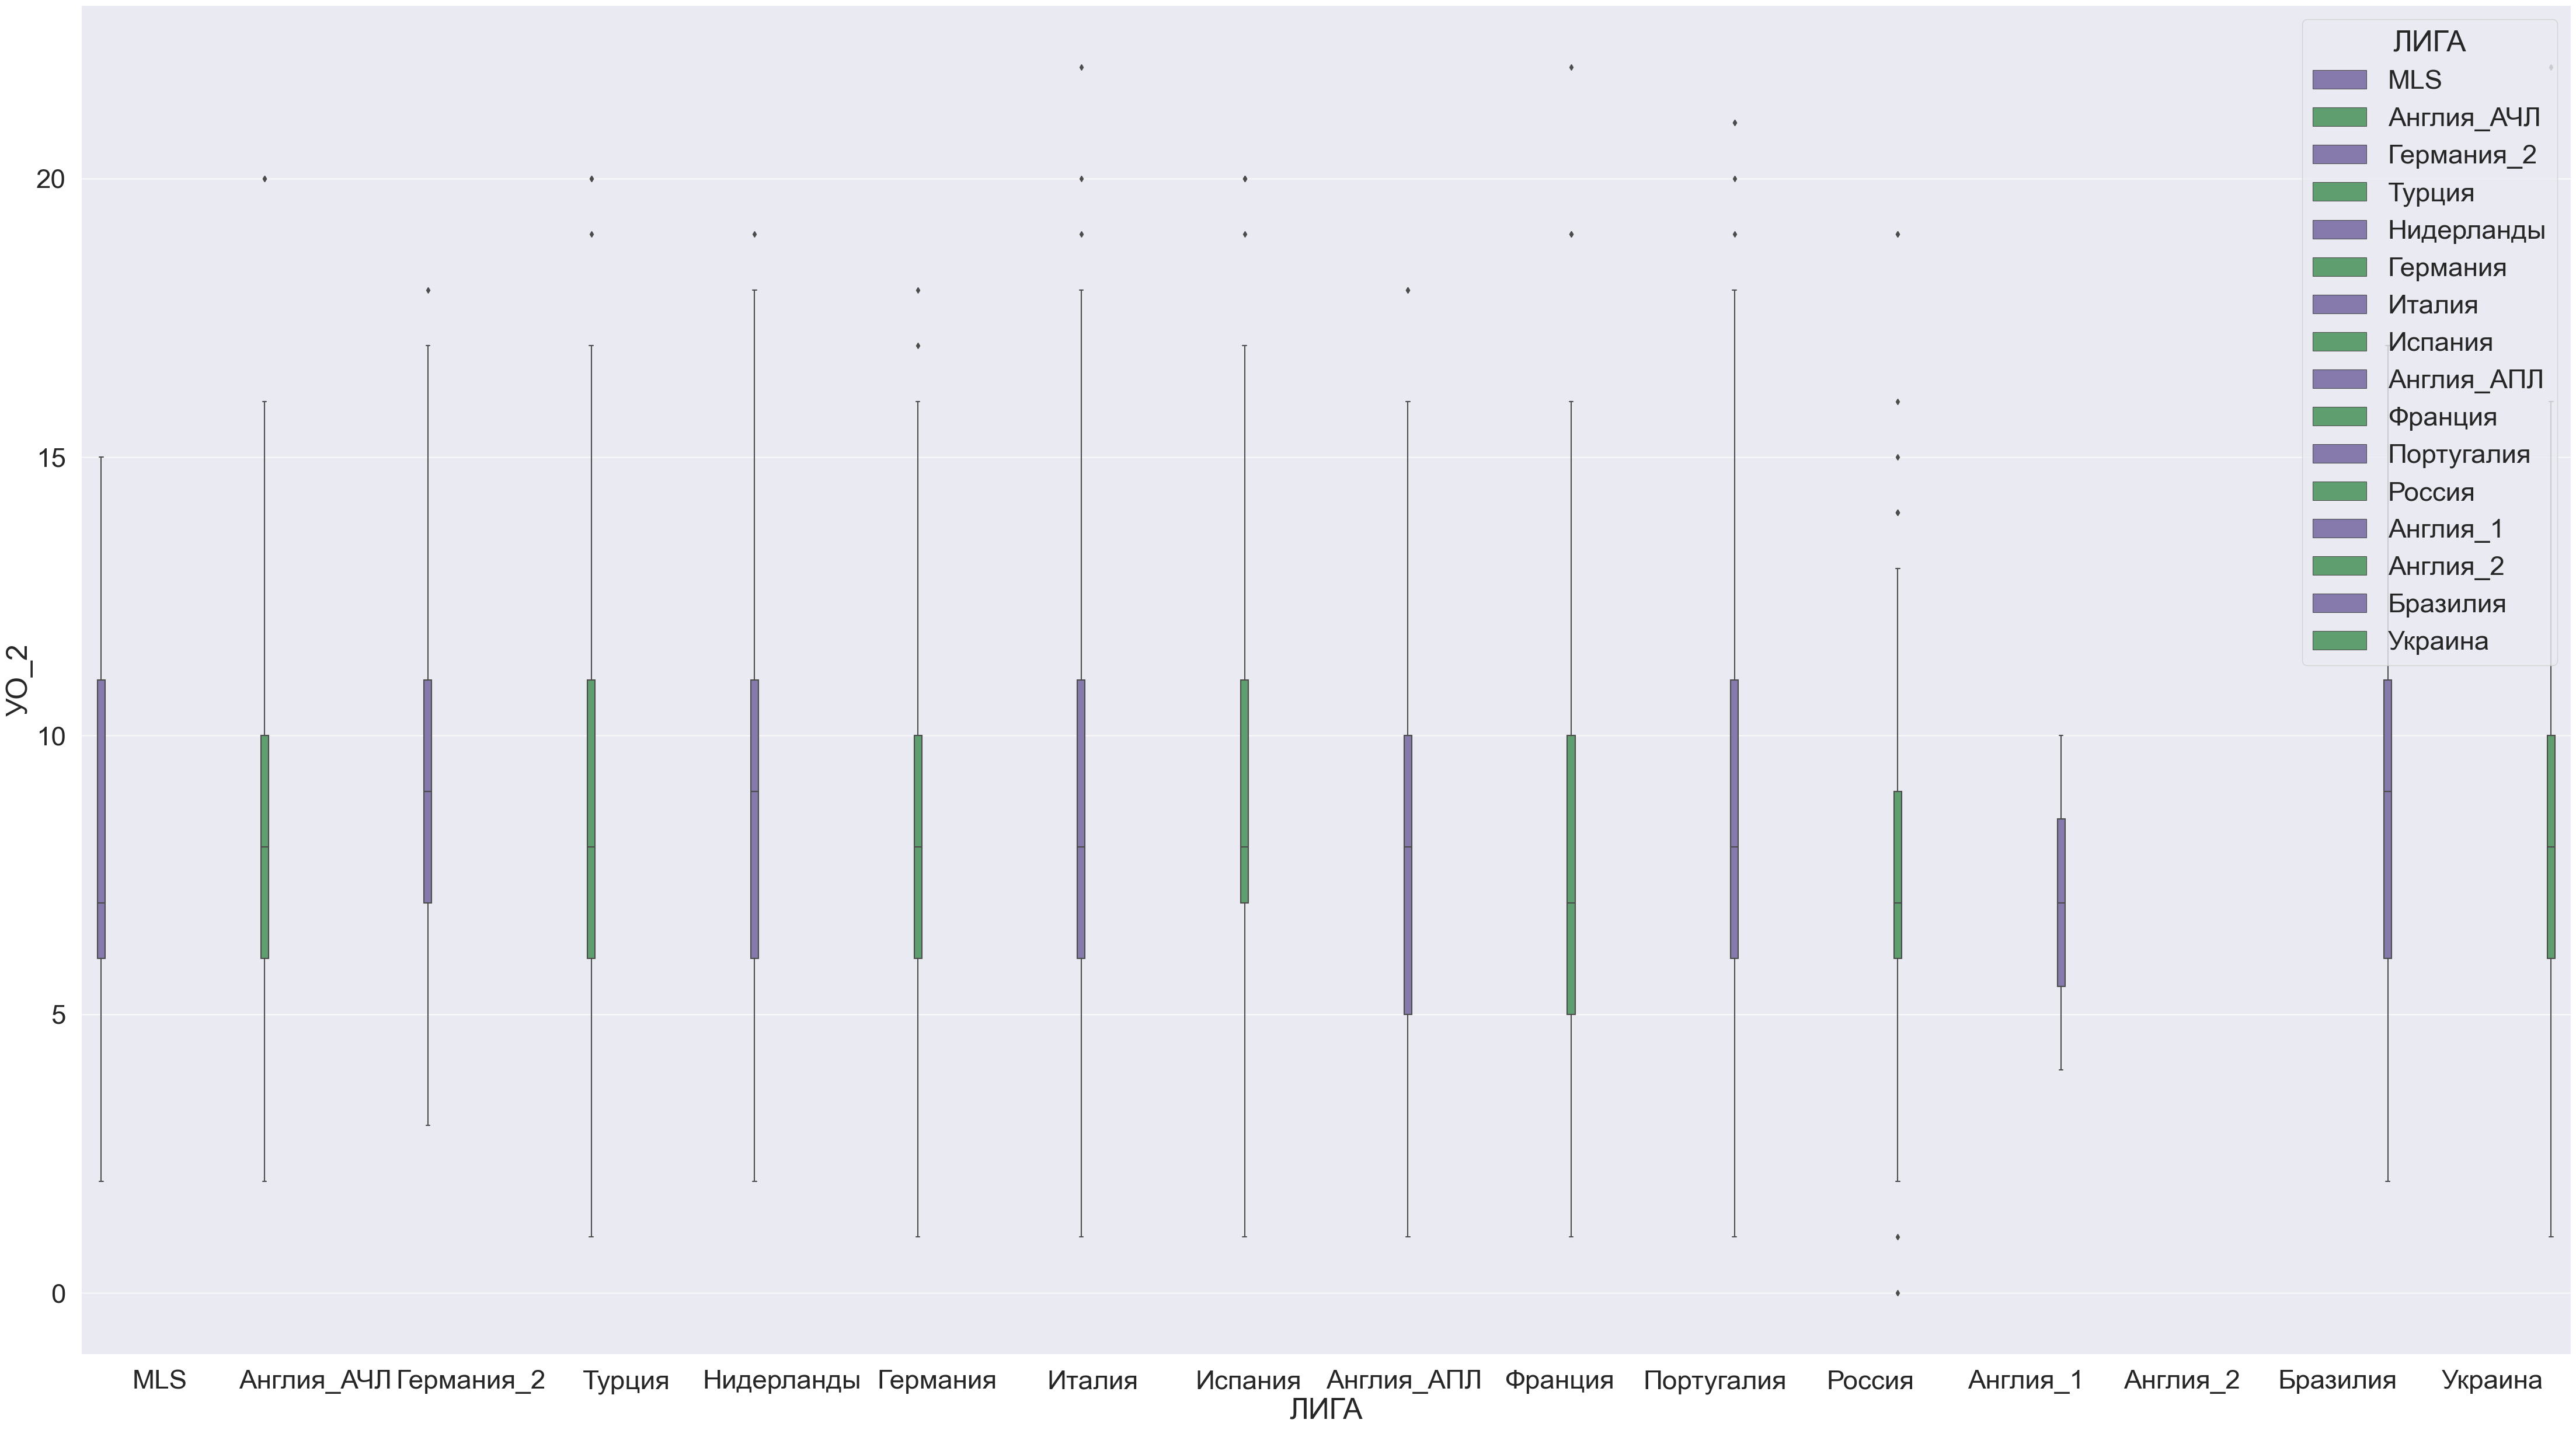

In [54]:
# boxplot удары от ворот гости
grafik_boxplot(data_top_1,'УО_2')

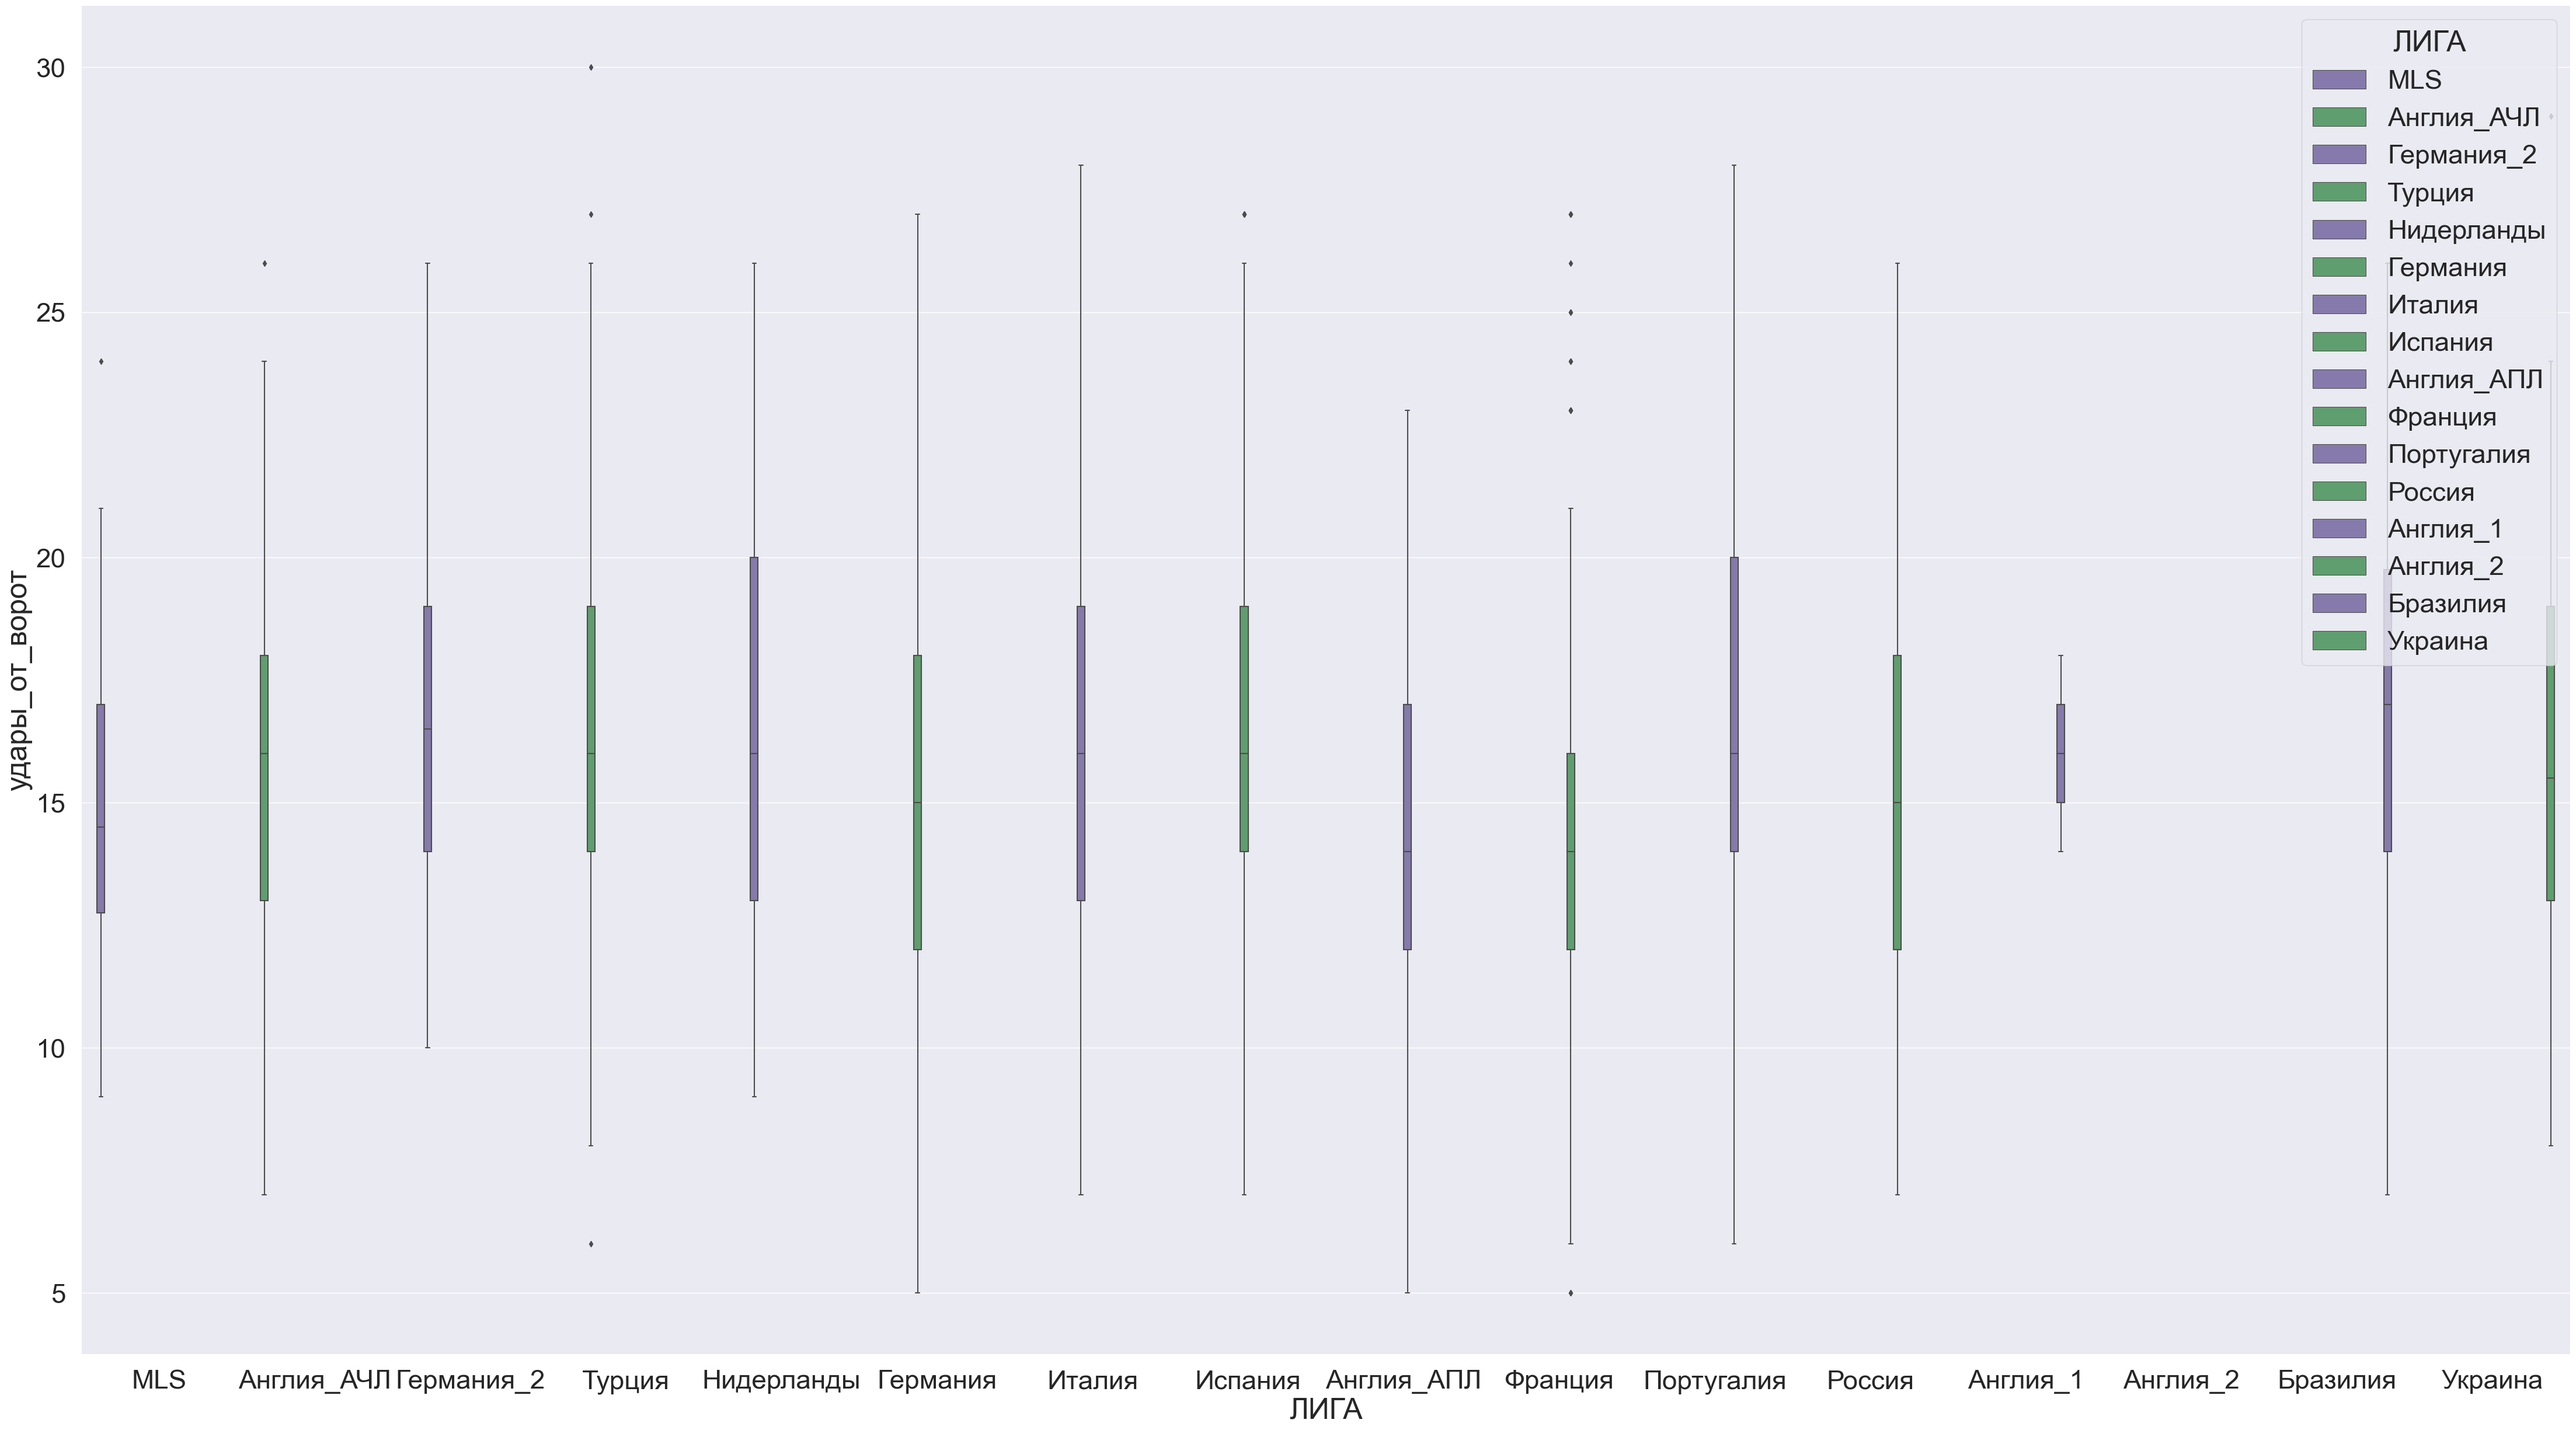

In [55]:
# boxplot удары от ворот
grafik_boxplot(data_top_1,'удары_от_ворот')

Наблюдения удары от ворот:
* Англия_1 хозяева, и в меньшей степени гости и в паре, отличаються компактностью наблюдений.
* Англия_2 нет наблюдений совсем)

Вывод:
    
* Графики по голам малоинформативны, все ящики почти одинаковы, так как диапозон значений маленький. Только немного различны ящики на графике общих голов за матч.


* Интересное наблюдение ящиков угловых гостей, они более разнообразны чем общие угловые за матч! Немотря на то, что их числовой диапозон меньше процентов на 30! Это можно объяснить тем, что когда команда слабая она в гостях имеет маленькие значения, а сильные гостевые команды имеею большие значения.


* желтые карточки MLS за матч имеют маленькую диссперсия, в то время как по отдельности она существенно больше. 


* Англия_2 почти по всем категориям отличаеться компактностью значений! Отдельно отмечу удары в створ есть даже гэп между верхней границей Англия 2 и нижней границей других чемпионатов. Англия_2 офсайды за матч ящик вместе с усами меньше чем остальные ящики!!!


* Англия_1 фолы совместные. Англия_1 ауты дома гости и в меньшей степени обе команды данные очень компактны! По другим категориям Англия_1 тоже отличаеться, но не так сильно как Англия_2.


* Перечислю чемпионаты и соответствующие категории, где значения отличаються компактностью. Нидерланды, Франция, желтые карточки гости. Нидерланды, Франция, MLS желтые совместно. 


Рекомендации:
* Необходимо исследовать почему значения Англия_2 так сильно отличаються(в выборке она представленна достаточно 574 матча).

* Нужно написать функцию которая будет выделять автоматически описанные мной выше наблюдения. Что бы ее можно было применить к другим чемпионатам. Просмотр и составление графиков очень объемная работа.